Please upload the LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses.xlsx

Please upload the Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses.xlsx

Data loaded successfully!
Linen Club stores: 2541
Raymond stores: 1373

Format Distribution:
Linen Club:


,Format,Count,Percentage
0,Indirect MBO,1389,54.66
1,Direct MBO,918,36.13
2,EBO,234,9.21



Raymond:


,Format,Count,Percentage
0,EBO,880,64.14
1,MBO,492,35.86



Top 10 Cities with Highest Raymond Advantage:


,city,lc_stores,raymond_stores,difference
329,Gurugram,0.0,18.0,18.0
184,Chandigarh,1.0,18.0,17.0
230,Dehradun,1.0,15.0,14.0
683,New Delhi,14.0,25.0,11.0
302,Ghaziabad,1.0,11.0,10.0
143,Bhopal,5.0,14.0,9.0
651,Nagpur,3.0,11.0,8.0
718,Panchkula,0.0,8.0,8.0
689,Noida,2.0,9.0,7.0
336,Haldwani,0.0,7.0,7.0



Total cities with Raymond advantage: 401
- High imbalance (≥10 stores): 5
- Medium imbalance (5-9 stores): 15
- Low imbalance (1-4 stores): 381


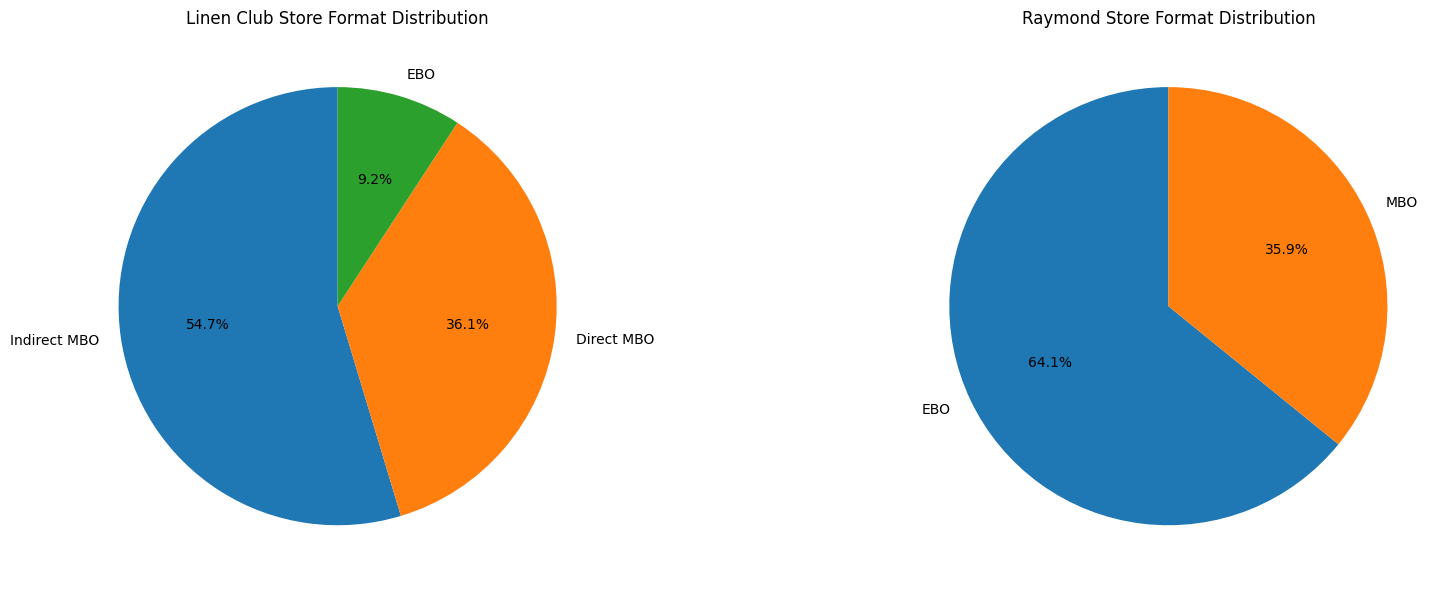

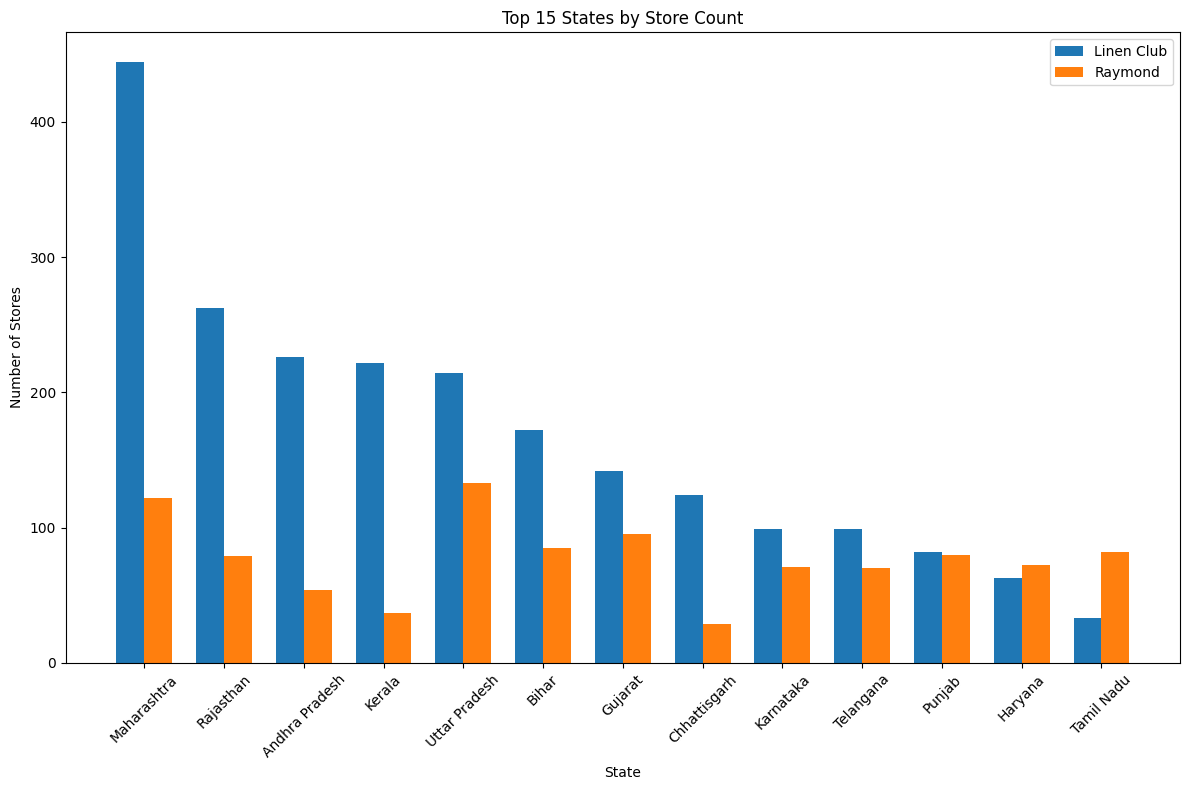

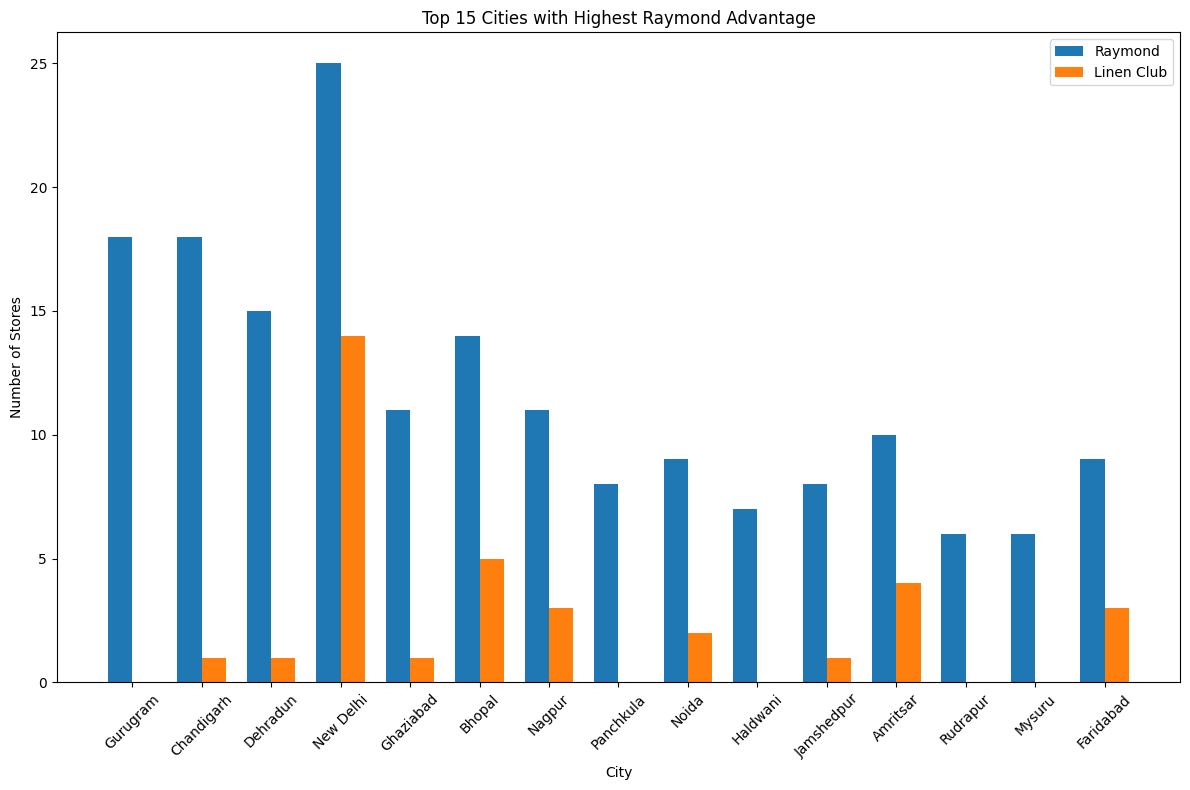

Creating interactive map...
Interactive map created! You need to replace 'YOUR_API_KEY' with your actual Google API key.
HTML file saved as: linen_club_raymond_map.html

IMPORTANT: To use this map, you need to:
1. Get a Google Maps API key from the Google Cloud Platform Console
2. Enable the following APIs for your key:
   - Maps JavaScript API
   - Places API
   - Visualization API
3. Replace 'YOUR_API_KEY' in the HTML file with your actual API key

The HTML file can be opened in any web browser after you've added your API key.

Analysis complete! Open the HTML file to explore the interactive map.
Make sure to replace the API key as mentioned above.


In [1]:
# Raymond vs Linen Club Enhanced Store Mapping Tool
# This code is designed to run in Google Colab

import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster, FeatureGroupSubGroup
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files
import os
import json
from IPython.display import display, HTML, IFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load the Excel data files
def load_store_data():
    print("Please upload the LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file_path = list(uploaded_lc.keys())[0]

    print("\nPlease upload the Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file_path = list(uploaded_raymond.keys())[0]

    # Read both sheets
    lc_df = pd.read_excel(lc_file_path, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file_path, sheet_name="Sheet1")

    # Standardize column names
    lc_df = lc_df.rename(columns={
        'lat': 'latitude',
        'lng': 'longitude',
        'state': 'state',
        'city': 'city',
        'Format': 'format',
        'formatted_address': 'address'
    })

    raymond_df = raymond_df.rename(columns={
        'Latitude': 'latitude',
        'Longitude': 'longitude',
        'State': 'state',
        'City': 'city',
        'Format': 'format',
        'Raymond Address': 'address',
        'District': 'district',
        'Pincode': 'pincode'
    })

    # Add company identifier
    lc_df['company'] = 'Linen Club'
    raymond_df['company'] = 'Raymond'

    # Create store counts by format for each city
    lc_format_counts = lc_df.groupby(['city', 'format']).size().reset_index(name='store_count')
    raymond_format_counts = raymond_df.groupby(['city', 'format']).size().reset_index(name='store_count')

    print("\nData loaded successfully!")
    print(f"Linen Club stores: {len(lc_df)}")
    print(f"Raymond stores: {len(raymond_df)}")

    return lc_df, raymond_df, lc_format_counts, raymond_format_counts

# Create a basic analysis of the store data
def analyze_store_data(lc_df, raymond_df):
    # Format distribution
    lc_format_dist = lc_df['format'].value_counts().reset_index()
    lc_format_dist.columns = ['Format', 'Count']
    lc_format_dist['Percentage'] = (lc_format_dist['Count'] / lc_format_dist['Count'].sum() * 100).round(2)

    raymond_format_dist = raymond_df['format'].value_counts().reset_index()
    raymond_format_dist.columns = ['Format', 'Count']
    raymond_format_dist['Percentage'] = (raymond_format_dist['Count'] / raymond_format_dist['Count'].sum() * 100).round(2)

    # State-wise distribution
    lc_state_dist = lc_df['state'].value_counts().reset_index()
    lc_state_dist.columns = ['State', 'Count']
    lc_state_dist['Percentage'] = (lc_state_dist['Count'] / lc_state_dist['Count'].sum() * 100).round(2)

    raymond_state_dist = raymond_df['state'].value_counts().reset_index()
    raymond_state_dist.columns = ['State', 'Count']
    raymond_state_dist['Percentage'] = (raymond_state_dist['Count'] / raymond_state_dist['Count'].sum() * 100).round(2)

    # City-wise comparison
    lc_city_counts = lc_df.groupby('city').size().reset_index(name='lc_stores')
    raymond_city_counts = raymond_df.groupby('city').size().reset_index(name='raymond_stores')

    city_comparison = pd.merge(lc_city_counts, raymond_city_counts, on='city', how='outer').fillna(0)
    city_comparison['difference'] = city_comparison['raymond_stores'] - city_comparison['lc_stores']
    city_comparison = city_comparison.sort_values('difference', ascending=False)

    # Get cities with the biggest imbalance
    imbalanced_cities = {
        'high': city_comparison[city_comparison['difference'] >= 10]['city'].tolist(),
        'medium': city_comparison[(city_comparison['difference'] < 10) & (city_comparison['difference'] >= 5)]['city'].tolist(),
        'low': city_comparison[(city_comparison['difference'] < 5) & (city_comparison['difference'] > 0)]['city'].tolist()
    }

    print("\nFormat Distribution:")
    print("Linen Club:")
    display(lc_format_dist)
    print("\nRaymond:")
    display(raymond_format_dist)

    print("\nTop 10 Cities with Highest Raymond Advantage:")
    display(city_comparison.head(10))

    print("\nTotal cities with Raymond advantage:", len(city_comparison[city_comparison['difference'] > 0]))
    print("- High imbalance (≥10 stores):", len(imbalanced_cities['high']))
    print("- Medium imbalance (5-9 stores):", len(imbalanced_cities['medium']))
    print("- Low imbalance (1-4 stores):", len(imbalanced_cities['low']))

    return {
        'lc_format_dist': lc_format_dist,
        'raymond_format_dist': raymond_format_dist,
        'lc_state_dist': lc_state_dist,
        'raymond_state_dist': raymond_state_dist,
        'city_comparison': city_comparison,
        'imbalanced_cities': imbalanced_cities
    }

# Create dashboard visuals
def create_dashboard_charts(analysis_results):
    # Format distribution pie charts
    fig1 = plt.figure(figsize=(18, 6))

    # LC Format Distribution
    plt.subplot(1, 2, 1)
    lc_format_dist = analysis_results['lc_format_dist']
    plt.pie(lc_format_dist['Count'], labels=lc_format_dist['Format'], autopct='%1.1f%%', startangle=90)
    plt.title('Linen Club Store Format Distribution')

    # Raymond Format Distribution
    plt.subplot(1, 2, 2)
    raymond_format_dist = analysis_results['raymond_format_dist']
    plt.pie(raymond_format_dist['Count'], labels=raymond_format_dist['Format'], autopct='%1.1f%%', startangle=90)
    plt.title('Raymond Store Format Distribution')

    plt.tight_layout()
    plt.show()

    # Top 10 states comparison bar chart
    top_states = pd.DataFrame({
        'state': list(set(analysis_results['lc_state_dist']['State'].head(10)).union(
                     set(analysis_results['raymond_state_dist']['State'].head(10)))),
    })

    top_states = pd.merge(
        top_states,
        analysis_results['lc_state_dist'][['State', 'Count']],
        left_on='state',
        right_on='State',
        how='left'
    ).drop('State', axis=1).rename(columns={'Count': 'Linen Club'})

    top_states = pd.merge(
        top_states,
        analysis_results['raymond_state_dist'][['State', 'Count']],
        left_on='state',
        right_on='State',
        how='left'
    ).drop('State', axis=1).rename(columns={'Count': 'Raymond'})

    top_states = top_states.fillna(0)
    top_states = top_states.sort_values(by='Linen Club', ascending=False).head(15)

    # Plot the state comparison
    plt.figure(figsize=(12, 8))

    x = range(len(top_states))
    width = 0.35

    plt.bar([i - width/2 for i in x], top_states['Linen Club'], width, label='Linen Club')
    plt.bar([i + width/2 for i in x], top_states['Raymond'], width, label='Raymond')

    plt.xlabel('State')
    plt.ylabel('Number of Stores')
    plt.title('Top 15 States by Store Count')
    plt.xticks(x, top_states['state'], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Top imbalanced cities
    top_imbalanced = analysis_results['city_comparison'].head(15)
    plt.figure(figsize=(12, 8))

    x = range(len(top_imbalanced))
    width = 0.35

    plt.bar([i - width/2 for i in x], top_imbalanced['raymond_stores'], width, label='Raymond')
    plt.bar([i + width/2 for i in x], top_imbalanced['lc_stores'], width, label='Linen Club')

    plt.xlabel('City')
    plt.ylabel('Number of Stores')
    plt.title('Top 15 Cities with Highest Raymond Advantage')
    plt.xticks(x, top_imbalanced['city'], rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a custom Google Maps visualization
def create_interactive_map(lc_df, raymond_df, analysis_results):
    print("Creating interactive map...")

    # Define format-specific colors
    # For Linen Club
    lc_format_colors = {
        'EBO': '#007f5f',  # Dark green
        'Direct MBO': '#2a9d8f',  # Teal
        'Indirect MBO': '#8ecae6'  # Light blue
    }

    # For Raymond
    raymond_format_colors = {
        'EBO': '#bc4749',  # Dark red
        'MBO': '#e63946'   # Bright red
    }

    # Format-specific icons
    format_icons = {
        'EBO': 'store',
        'Direct MBO': 'shopping_cart',
        'Indirect MBO': 'shopping_bag',
        'MBO': 'local_mall'
    }

    # Define priority colors
    priority_colors = {
        'high': '#d62828',    # Red
        'medium': '#f77f00',  # Orange
        'low': '#fcbf49'      # Yellow
    }

    # Create a JavaScript object with all required data
    js_data = {
        'lc_stores': [],
        'raymond_stores': [],
        'lc_format_colors': lc_format_colors,
        'raymond_format_colors': raymond_format_colors,
        'format_icons': format_icons,
        'priority_cities': analysis_results['imbalanced_cities'],
        'priority_colors': priority_colors
    }

    # Process LC stores
    for _, store in lc_df.iterrows():
        js_data['lc_stores'].append({
            'lat': float(store['latitude']),
            'lng': float(store['longitude']),
            'format': store['format'],
            'city': store['city'],
            'state': store['state'],
            'address': store['address']
        })

    # Process Raymond stores
    for _, store in raymond_df.iterrows():
        js_data['raymond_stores'].append({
            'lat': float(store['latitude']),
            'lng': float(store['longitude']),
            'format': store['format'],
            'city': store['city'],
            'state': store['state'],
            'address': store['address'],
            'district': store.get('district', ''),
            'pincode': store.get('pincode', '')
        })

    # Create HTML template for the interactive map
    html_template = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Raymond vs Linen Club Store Network</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css">
        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
        <link rel="stylesheet" href="https://fonts.googleapis.com/icon?family=Material+Icons">
        <style>
            body {
                padding: 0;
                margin: 0;
                font-family: Arial, sans-serif;
            }
            html, body, #container {
                height: 100%;
                width: 100%;
            }
            .map-container {
                height: calc(100% - 60px);
                width: 100%;
                position: relative;
            }
            #map {
                height: 100%;
                width: 100%;
            }
            .header {
                height: 60px;
                background-color: #f8f9fa;
                border-bottom: 1px solid #dee2e6;
                padding: 10px 20px;
                display: flex;
                justify-content: space-between;
                align-items: center;
            }
            .title h2 {
                margin: 0;
                font-size: 1.5rem;
                color: #212529;
            }
            .filter-panel {
                position: absolute;
                top: 10px;
                right: 10px;
                background: white;
                padding: 15px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                max-width: 300px;
            }
            .filter-section {
                margin-bottom: 15px;
            }
            .filter-section h5 {
                margin-top: 0;
                margin-bottom: 8px;
                font-size: 16px;
                border-bottom: 1px solid #dee2e6;
                padding-bottom: 5px;
            }
            .form-check {
                margin-bottom: 5px;
            }
            .info-window {
                max-width: 300px;
            }
            .legend {
                position: absolute;
                bottom: 30px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
            }
            .legend-item {
                display: flex;
                align-items: center;
                margin-bottom: 5px;
            }
            .legend-color {
                width: 15px;
                height: 15px;
                display: inline-block;
                margin-right: 5px;
                border: 1px solid #ccc;
            }
            .priority-badge {
                display: inline-block;
                padding: 2px 5px;
                border-radius: 3px;
                color: white;
                font-weight: bold;
                font-size: 12px;
                margin-left: 5px;
            }
            .store-count-badge {
                background-color: #17a2b8;
                color: white;
                border-radius: 10px;
                padding: 2px 6px;
                font-size: 12px;
                margin-left: 5px;
            }
            .hotspot-panel {
                position: absolute;
                bottom: 10px;
                left: 10px;
                background: white;
                padding: 15px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                max-width: 400px;
                max-height: 300px;
                overflow-y: auto;
                display: none;
            }
            .density-controls {
                position: absolute;
                top: 10px;
                left: 60px;
                z-index: 1000;
            }
            .btn-toggle-density {
                background: white;
                border: 1px solid #ccc;
                border-radius: 4px;
                padding: 6px 12px;
                margin-right: 5px;
                font-weight: bold;
                color: #333;
            }
            .btn-toggle-density.active {
                background: #4285F4;
                color: white;
                border-color: #4285F4;
            }
            .hotspot-item {
                margin-bottom: 8px;
                padding-bottom: 8px;
                border-bottom: 1px solid #eee;
            }
            .loader {
                position: absolute;
                top: 50%;
                left: 50%;
                transform: translate(-50%, -50%);
                z-index: 2000;
                background: rgba(255, 255, 255, 0.8);
                padding: 20px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                display: none;
            }
            .action-buttons {
                position: absolute;
                bottom: 10px;
                left: 50%;
                transform: translateX(-50%);
                z-index: 1000;
                display: flex;
                gap: 10px;
            }
            .stats-panel {
                position: absolute;
                left: 10px;
                top: 10px;
                background: white;
                padding: 15px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                max-width: 300px;
                max-height: 400px;
                overflow-y: auto;
            }
            .stats-panel h5 {
                margin-top: 0;
                border-bottom: 1px solid #dee2e6;
                padding-bottom: 5px;
            }
            .stats-panel.hidden {
                display: none;
            }
            .material-icons {
                vertical-align: middle;
                font-size: 18px;
            }
        </style>
    </head>
    <body>
        <div id="container">
            <div class="header">
                <div class="title">
                    <h2>Raymond vs Linen Club Store Network Analysis</h2>
                </div>
                <div class="actions">
                    <button id="toggleStats" class="btn btn-outline-primary btn-sm">
                        <i class="material-icons">bar_chart</i> Toggle Statistics
                    </button>
                </div>
            </div>

            <div class="map-container">
                <div id="map"></div>

                <!-- Filter Panel -->
                <div class="filter-panel">
                    <h5>Filter Options</h5>

                    <div class="filter-section">
                        <h5>Company</h5>
                        <div class="form-check">
                            <input class="form-check-input company-filter" type="checkbox" value="linen-club" id="linenClubCheck" checked>
                            <label class="form-check-label" for="linenClubCheck">
                                Linen Club
                            </label>
                        </div>
                        <div class="form-check">
                            <input class="form-check-input company-filter" type="checkbox" value="raymond" id="raymondCheck" checked>
                            <label class="form-check-label" for="raymondCheck">
                                Raymond
                            </label>
                        </div>
                    </div>

                    <div class="filter-section">
                        <h5>Linen Club Formats</h5>
                        <div class="form-check">
                            <input class="form-check-input lc-format" type="checkbox" value="EBO" id="lcEboCheck" checked>
                            <label class="form-check-label" for="lcEboCheck">
                                EBO <span class="store-count-badge" id="lcEboCount">0</span>
                            </label>
                        </div>
                        <div class="form-check">
                            <input class="form-check-input lc-format" type="checkbox" value="Direct MBO" id="lcDirectMboCheck" checked>
                            <label class="form-check-label" for="lcDirectMboCheck">
                                Direct MBO <span class="store-count-badge" id="lcDirectMboCount">0</span>
                            </label>
                        </div>
                        <div class="form-check">
                            <input class="form-check-input lc-format" type="checkbox" value="Indirect MBO" id="lcIndirectMboCheck" checked>
                            <label class="form-check-label" for="lcIndirectMboCheck">
                                Indirect MBO <span class="store-count-badge" id="lcIndirectMboCount">0</span>
                            </label>
                        </div>
                    </div>

                    <div class="filter-section">
                        <h5>Raymond Formats</h5>
                        <div class="form-check">
                            <input class="form-check-input raymond-format" type="checkbox" value="EBO" id="raymondEboCheck" checked>
                            <label class="form-check-label" for="raymondEboCheck">
                                EBO <span class="store-count-badge" id="raymondEboCount">0</span>
                            </label>
                        </div>
                        <div class="form-check">
                            <input class="form-check-input raymond-format" type="checkbox" value="MBO" id="raymondMboCheck" checked>
                            <label class="form-check-label" for="raymondMboCheck">
                                MBO <span class="store-count-badge" id="raymondMboCount">0</span>
                            </label>
                        </div>
                    </div>

                    <div class="filter-section">
                        <h5>Expansion Priority</h5>
                        <div class="form-check">
                            <input class="form-check-input priority-filter" type="checkbox" value="high" id="highPriorityCheck" checked>
                            <label class="form-check-label" for="highPriorityCheck">
                                High Priority
                            </label>
                        </div>
                        <div class="form-check">
                            <input class="form-check-input priority-filter" type="checkbox" value="medium" id="mediumPriorityCheck" checked>
                            <label class="form-check-label" for="mediumPriorityCheck">
                                Medium Priority
                            </label>
                        </div>
                        <div class="form-check">
                            <input class="form-check-input priority-filter" type="checkbox" value="low" id="lowPriorityCheck" checked>
                            <label class="form-check-label" for="lowPriorityCheck">
                                Low Priority
                            </label>
                        </div>
                    </div>

                    <div class="filter-section">
                        <h5>Map Options</h5>
                        <div class="form-check">
                            <input class="form-check-input" type="checkbox" id="clusterCheck" checked>
                            <label class="form-check-label" for="clusterCheck">
                                Cluster Markers
                            </label>
                        </div>
                        <div class="form-check">
                            <input class="form-check-input" type="checkbox" id="hotspotCheck">
                            <label class="form-check-label" for="hotspotCheck">
                                Show Retail Hotspots
                            </label>
                        </div>
                    </div>

                    <div class="filter-section">
                        <button id="resetFilters" class="btn btn-outline-secondary btn-sm">Reset Filters</button>
                    </div>
                </div>

                <!-- Legend -->
                <div class="legend">
                    <h5>Legend</h5>
                    <div id="legendContent">
                        <!-- Populated by JavaScript -->
                    </div>
                </div>

                <!-- Statistics Panel -->
                <div class="stats-panel hidden" id="statsPanel">
                    <h5>Store Statistics</h5>
                    <div id="statsContent">
                        <!-- Populated by JavaScript -->
                    </div>
                </div>

                <!-- Hotspot Panel -->
                <div class="hotspot-panel" id="hotspotPanel">
                    <h5>Retail Hotspots</h5>
                    <div id="hotspotContent">
                        <!-- Populated by JavaScript -->
                    </div>
                </div>

                <!-- Density Controls -->
                <div class="density-controls">
                    <button class="btn-toggle-density" id="btnStores" data-mode="stores">Stores</button>
                    <button class="btn-toggle-density" id="btnHeatmap" data-mode="heatmap">Heatmap</button>
                </div>

                <!-- Action Buttons -->
                <div class="action-buttons">
                    <button id="findRetailHotspots" class="btn btn-primary" disabled>Find Retail Hotspots</button>
                    <button id="resetView" class="btn btn-outline-secondary">Reset View</button>
                </div>

                <!-- Loading indicator -->
                <div class="loader" id="loader">
                    <div class="spinner-border text-primary" role="status">
                        <span class="visually-hidden">Loading...</span>
                    </div>
                    <div class="mt-2">Loading retail hotspots...</div>
                </div>
            </div>
        </div>

        <script>
            // Store all map objects
            let map;
            let heatmap;
            let markers = {
                linenClub: { EBO: [], 'Direct MBO': [], 'Indirect MBO': [] },
                raymond: { EBO: [], MBO: [] },
                hotspots: [],
                priorityCircles: { high: [], medium: [], low: [] }
            };
            let markerClusters = {
                linenClub: null,
                raymond: null,
                hotspots: null
            };
            let infoWindow;
            let selectedCity = null;

            // Store configuration
            const config = {
                clusterMarkers: true,
                showHotspots: false,
                displayMode: 'stores',  // 'stores' or 'heatmap'
                filters: {
                    companies: ['linen-club', 'raymond'],
                    lcFormats: ['EBO', 'Direct MBO', 'Indirect MBO'],
                    raymondFormats: ['EBO', 'MBO'],
                    priorities: ['high', 'medium', 'low']
                }
            };

            // Store the data
            const storeData = MAP_DATA_PLACEHOLDER;

            // Initialize the map
            function initMap() {
                // Create the map centered on India
                map = new google.maps.Map(document.getElementById('map'), {
                    center: { lat: 22.5937, lng: 78.9629 },
                    zoom: 5,
                    mapTypeControl: true,
                    streetViewControl: false,
                    fullscreenControl: true
                });

                // Create info window for store details
                infoWindow = new google.maps.InfoWindow();

                // Initialize marker clusters
                initializeMarkerClusters();

                // Add store markers
                addStoreMarkers();

                // Populate legend
                populateLegend();

                // Populate statistics
                updateStatistics();

                // Setup event listeners
                setupEventListeners();

                // Create heatmap (initially hidden)
                createHeatmap();

                // Mark priority cities
                markPriorityCities();

                // Update store counts in filter panel
                updateStoreCounts();
            }

            // Initialize marker clusters
            function initializeMarkerClusters() {
                markerClusters.linenClub = new MarkerClusterer(map, [], {
                    imagePath: 'https://developers.google.com/maps/documentation/javascript/examples/markerclusterer/m',
                    gridSize: 50,
                    zoomOnClick: true,
                    maxZoom: 15
                });

                markerClusters.raymond = new MarkerClusterer(map, [], {
                    imagePath: 'https://developers.google.com/maps/documentation/javascript/examples/markerclusterer/m',
                    gridSize: 50,
                    zoomOnClick: true,
                    maxZoom: 15
                });

                markerClusters.hotspots = new MarkerClusterer(map, [], {
                    imagePath: 'https://developers.google.com/maps/documentation/javascript/examples/markerclusterer/m',
                    gridSize: 50,
                    zoomOnClick: true,
                    maxZoom: 15
                });
            }

            // Add store markers to the map
            function addStoreMarkers() {
                // Add Linen Club markers
                storeData.lc_stores.forEach(store => {
                    const format = store.format;
                    const color = storeData.lc_format_colors[format] || '#333333';
                    const icon = storeData.format_icons[format] || 'store';

                    const marker = new google.maps.Marker({
                        position: { lat: store.lat, lng: store.lng },
                        title: `${store.city} - Linen Club ${format}`,
                        icon: {
                            path: google.maps.SymbolPath.CIRCLE,
                            fillColor: color,
                            fillOpacity: 0.8,
                            strokeColor: '#000000',
                            strokeWeight: 1,
                            scale: 8
                        }
                    });

                    // Add click listener
                    marker.addListener('click', () => {
                        const infoContent = `
                            <div class="info-window">
                                <h5>Linen Club ${format}</h5>
                                <p><strong>Location:</strong> ${store.city}, ${store.state}</p>
                                <p><strong>Address:</strong> ${store.address}</p>
                                <p><strong>Format:</strong> ${format}</p>
                            </div>
                        `;

                        infoWindow.setContent(infoContent);
                        infoWindow.open(map, marker);

                        // Store the selected city
                        selectedCity = {
                            name: store.city,
                            state: store.state,
                            position: { lat: store.lat, lng: store.lng }
                        };

                        // Enable the Find Retail Hotspots button
                        document.getElementById('findRetailHotspots').disabled = false;
                    });

                    // Store the marker
                    markers.linenClub[format].push(marker);
                });

                // Add Raymond markers
                storeData.raymond_stores.forEach(store => {
                    const format = store.format;
                    const color = storeData.raymond_format_colors[format] || '#333333';
                    const icon = storeData.format_icons[format] || 'store';

                    const marker = new google.maps.Marker({
                        position: { lat: store.lat, lng: store.lng },
                        title: `${store.city} - Raymond ${format}`,
                        icon: {
                            path: google.maps.SymbolPath.CIRCLE,
                            fillColor: color,
                            fillOpacity: 0.8,
                            strokeColor: '#000000',
                            strokeWeight: 1,
                            scale: 8
                        }
                    });

                    // Add click listener
                    marker.addListener('click', () => {
                        const infoContent = `
                            <div class="info-window">
                                <h5>Raymond ${format}</h5>
                                <p><strong>Location:</strong> ${store.city}, ${store.state}</p>
                                <p><strong>Address:</strong> ${store.address}</p>
                                <p><strong>Format:</strong> ${format}</p>
                                ${store.district ? `<p><strong>District:</strong> ${store.district}</p>` : ''}
                                ${store.pincode ? `<p><strong>Pincode:</strong> ${store.pincode}</p>` : ''}
                            </div>
                        `;

                        infoWindow.setContent(infoContent);
                        infoWindow.open(map, marker);

                        // Store the selected city
                        selectedCity = {
                            name: store.city,
                            state: store.state,
                            position: { lat: store.lat, lng: store.lng }
                        };

                        // Enable the Find Retail Hotspots button
                        document.getElementById('findRetailHotspots').disabled = false;
                    });

                    // Store the marker
                    markers.raymond[format].push(marker);
                });

                // Add all markers to clusters based on current settings
                updateMarkerDisplay();
            }

            // Populate the legend
            function populateLegend() {
                const legendContent = document.getElementById('legendContent');
                legendContent.innerHTML = '';

                // Linen Club formats
                const lcFormatSection = document.createElement('div');
                lcFormatSection.innerHTML = '<strong>Linen Club:</strong>';
                legendContent.appendChild(lcFormatSection);

                Object.entries(storeData.lc_format_colors).forEach(([format, color]) => {
                    const item = document.createElement('div');
                    item.className = 'legend-item';
                    item.innerHTML = `
                        <span class="legend-color" style="background-color: ${color};"></span>
                        ${format}
                    `;
                    legendContent.appendChild(item);
                });

                // Raymond formats
                const raymondFormatSection = document.createElement('div');
                raymondFormatSection.innerHTML = '<strong>Raymond:</strong>';
                legendContent.appendChild(raymondFormatSection);

                Object.entries(storeData.raymond_format_colors).forEach(([format, color]) => {
                    const item = document.createElement('div');
                    item.className = 'legend-item';
                    item.innerHTML = `
                        <span class="legend-color" style="background-color: ${color};"></span>
                        ${format}
                    `;
                    legendContent.appendChild(item);
                });

                // Priority indicators
                const prioritySection = document.createElement('div');
                prioritySection.innerHTML = '<strong>Expansion Priority:</strong>';
                legendContent.appendChild(prioritySection);

                Object.entries(storeData.priority_colors).forEach(([priority, color]) => {
                    const item = document.createElement('div');
                    item.className = 'legend-item';
                    item.innerHTML = `
                        <span class="priority-badge" style="background-color: ${color};">${priority.charAt(0).toUpperCase() + priority.slice(1)}</span>
                        ${priority.charAt(0).toUpperCase() + priority.slice(1)} Priority
                    `;
                    legendContent.appendChild(item);
                });

                // Hotspots (if enabled)
                const hotspotSection = document.createElement('div');
                hotspotSection.innerHTML = '<strong>Retail Hotspots:</strong>';
                legendContent.appendChild(hotspotSection);

                const hotspotItem = document.createElement('div');
                hotspotItem.className = 'legend-item';
                hotspotItem.innerHTML = `
                    <span class="legend-color" style="background-color: #FFC107;"></span>
                    Retail Hotspot
                `;
                legendContent.appendChild(hotspotItem);
            }

            // Update statistics display
            function updateStatistics() {
                const statsContent = document.getElementById('statsContent');
                statsContent.innerHTML = '';

                // Count visible stores by format
                const visibleLcStores = {
                    EBO: markers.linenClub.EBO.filter(m => m.visible !== false).length,
                    'Direct MBO': markers.linenClub['Direct MBO'].filter(m => m.visible !== false).length,
                    'Indirect MBO': markers.linenClub['Indirect MBO'].filter(m => m.visible !== false).length
                };

                const visibleRaymondStores = {
                    EBO: markers.raymond.EBO.filter(m => m.visible !== false).length,
                    MBO: markers.raymond.MBO.filter(m => m.visible !== false).length
                };

                const lcTotal = Object.values(visibleLcStores).reduce((sum, count) => sum + count, 0);
                const raymondTotal = Object.values(visibleRaymondStores).reduce((sum, count) => sum + count, 0);

                // Create store count summary
                const summarySection = document.createElement('div');
                summarySection.innerHTML = `
                    <div class="mb-3">
                        <p><strong>Linen Club:</strong> ${lcTotal} stores</p>
                        <ul>
                            <li>EBO: ${visibleLcStores.EBO}</li>
                            <li>Direct MBO: ${visibleLcStores['Direct MBO']}</li>
                            <li>Indirect MBO: ${visibleLcStores['Indirect MBO']}</li>
                        </ul>

                        <p><strong>Raymond:</strong> ${raymondTotal} stores</p>
                        <ul>
                            <li>EBO: ${visibleRaymondStores.EBO}</li>
                            <li>MBO: ${visibleRaymondStores.MBO}</li>
                        </ul>
                    </div>
                `;
                statsContent.appendChild(summarySection);

                // City comparison (when zoomed into city)
                if (selectedCity) {
                    const cityStatsSection = document.createElement('div');
                    cityStatsSection.innerHTML = `<h6>${selectedCity.name}, ${selectedCity.state}</h6>`;

                    // Count stores in the selected city
                    const lcCityStores = storeData.lc_stores.filter(store =>
                        store.city.toLowerCase() === selectedCity.name.toLowerCase()
                    );

                    const raymondCityStores = storeData.raymond_stores.filter(store =>
                        store.city.toLowerCase() === selectedCity.name.toLowerCase()
                    );

                    const lcCityFormatCounts = {};
                    lcCityStores.forEach(store => {
                        const format = store.format;
                        lcCityFormatCounts[format] = (lcCityFormatCounts[format] || 0) + 1;
                    });

                    const raymondCityFormatCounts = {};
                    raymondCityStores.forEach(store => {
                        const format = store.format;
                        raymondCityFormatCounts[format] = (raymondCityFormatCounts[format] || 0) + 1;
                    });

                    cityStatsSection.innerHTML += `
                        <p><strong>Linen Club:</strong> ${lcCityStores.length} stores</p>
                        <ul>
                            <li>EBO: ${lcCityFormatCounts.EBO || 0}</li>
                            <li>Direct MBO: ${lcCityFormatCounts['Direct MBO'] || 0}</li>
                            <li>Indirect MBO: ${lcCityFormatCounts['Indirect MBO'] || 0}</li>
                        </ul>

                        <p><strong>Raymond:</strong> ${raymondCityStores.length} stores</p>
                        <ul>
                            <li>EBO: ${raymondCityFormatCounts.EBO || 0}</li>
                            <li>MBO: ${raymondCityFormatCounts.MBO || 0}</li>
                        </ul>

                        <p><strong>Imbalance:</strong> ${raymondCityStores.length - lcCityStores.length} store(s)</p>
                    `;

                    statsContent.appendChild(cityStatsSection);
                }
            }

            // Set up event listeners for filters and controls
            function setupEventListeners() {
                // Company filters
                document.querySelectorAll('.company-filter').forEach(checkbox => {
                    checkbox.addEventListener('change', function() {
                        const company = this.value;
                        const isChecked = this.checked;

                        if (company === 'linen-club') {
                            if (isChecked) {
                                config.filters.companies.push('linen-club');
                            } else {
                                config.filters.companies = config.filters.companies.filter(c => c !== 'linen-club');
                            }
                        } else if (company === 'raymond') {
                            if (isChecked) {
                                config.filters.companies.push('raymond');
                            } else {
                                config.filters.companies = config.filters.companies.filter(c => c !== 'raymond');
                            }
                        }

                        updateMarkerDisplay();
                    });
                });

                // Linen Club format filters
                document.querySelectorAll('.lc-format').forEach(checkbox => {
                    checkbox.addEventListener('change', function() {
                        const format = this.value;
                        const isChecked = this.checked;

                        if (isChecked) {
                            config.filters.lcFormats.push(format);
                        } else {
                            config.filters.lcFormats = config.filters.lcFormats.filter(f => f !== format);
                        }

                        updateMarkerDisplay();
                    });
                });

                // Raymond format filters
                document.querySelectorAll('.raymond-format').forEach(checkbox => {
                    checkbox.addEventListener('change', function() {
                        const format = this.value;
                        const isChecked = this.checked;

                        if (isChecked) {
                            config.filters.raymondFormats.push(format);
                        } else {
                            config.filters.raymondFormats = config.filters.raymondFormats.filter(f => f !== format);
                        }

                        updateMarkerDisplay();
                    });
                });

                // Priority filters
                document.querySelectorAll('.priority-filter').forEach(checkbox => {
                    checkbox.addEventListener('change', function() {
                        const priority = this.value;
                        const isChecked = this.checked;

                        if (isChecked) {
                            config.filters.priorities.push(priority);
                        } else {
                            config.filters.priorities = config.filters.priorities.filter(p => p !== priority);
                        }

                        updatePriorityCircles();
                    });
                });

                // Clustering toggle
                document.getElementById('clusterCheck').addEventListener('change', function() {
                    config.clusterMarkers = this.checked;
                    updateMarkerDisplay();
                });

                // Hotspot toggle
                document.getElementById('hotspotCheck').addEventListener('change', function() {
                    config.showHotspots = this.checked;

                    if (config.showHotspots && selectedCity) {
                        document.getElementById('hotspotPanel').style.display = 'block';
                        if (markers.hotspots.length === 0) {
                            findRetailHotspots();
                        }
                    } else {
                        document.getElementById('hotspotPanel').style.display = 'none';
                        clearHotspots();
                    }
                });

                // Find Retail Hotspots button
                document.getElementById('findRetailHotspots').addEventListener('click', function() {
                    if (selectedCity) {
                        findRetailHotspots();
                    }
                });

                // Reset View button
                document.getElementById('resetView').addEventListener('click', function() {
                    map.setCenter({ lat: 22.5937, lng: 78.9629 });
                    map.setZoom(5);
                    selectedCity = null;
                    document.getElementById('findRetailHotspots').disabled = true;
                    clearHotspots();
                    document.getElementById('hotspotPanel').style.display = 'none';
                    updateStatistics();
                });

                // Reset Filters button
                document.getElementById('resetFilters').addEventListener('click', function() {
                    // Reset company filters
                    document.querySelectorAll('.company-filter').forEach(checkbox => {
                        checkbox.checked = true;
                    });
                    config.filters.companies = ['linen-club', 'raymond'];

                    // Reset Linen Club format filters
                    document.querySelectorAll('.lc-format').forEach(checkbox => {
                        checkbox.checked = true;
                    });
                    config.filters.lcFormats = ['EBO', 'Direct MBO', 'Indirect MBO'];

                    // Reset Raymond format filters
                    document.querySelectorAll('.raymond-format').forEach(checkbox => {
                        checkbox.checked = true;
                    });
                    config.filters.raymondFormats = ['EBO', 'MBO'];

                    // Reset priority filters
                    document.querySelectorAll('.priority-filter').forEach(checkbox => {
                        checkbox.checked = true;
                    });
                    config.filters.priorities = ['high', 'medium', 'low'];

                    // Reset clustering
                    document.getElementById('clusterCheck').checked = true;
                    config.clusterMarkers = true;

                    // Reset hotspots
                    document.getElementById('hotspotCheck').checked = false;
                    config.showHotspots = false;
                    document.getElementById('hotspotPanel').style.display = 'none';

                    // Reset display mode
                    setDisplayMode('stores');

                    // Update display
                    updateMarkerDisplay();
                    updatePriorityCircles();
                });

                // Toggle stats panel
                document.getElementById('toggleStats').addEventListener('click', function() {
                    const statsPanel = document.getElementById('statsPanel');
                    statsPanel.classList.toggle('hidden');
                    updateStatistics();
                });

                // Display mode toggle (stores/heatmap)
                document.querySelectorAll('.btn-toggle-density').forEach(btn => {
                    btn.addEventListener('click', function() {
                        const mode = this.dataset.mode;
                        setDisplayMode(mode);
                    });
                });
            }

            // Update marker display based on current filter settings
            function updateMarkerDisplay() {
                // Clear all markers from the map and clusters
                markerClusters.linenClub.clearMarkers();
                markerClusters.raymond.clearMarkers();

                // Collect markers to display
                const lcMarkersToDisplay = [];
                const raymondMarkersToDisplay = [];

                // Process Linen Club markers
                if (config.filters.companies.includes('linen-club')) {
                    for (const format in markers.linenClub) {
                        if (config.filters.lcFormats.includes(format)) {
                            markers.linenClub[format].forEach(marker => {
                                marker.setVisible(true);
                                lcMarkersToDisplay.push(marker);
                            });
                        } else {
                            markers.linenClub[format].forEach(marker => {
                                marker.setVisible(false);
                            });
                        }
                    }
                } else {
                    // Hide all Linen Club markers
                    for (const format in markers.linenClub) {
                        markers.linenClub[format].forEach(marker => {
                            marker.setVisible(false);
                        });
                    }
                }

                // Process Raymond markers
                if (config.filters.companies.includes('raymond')) {
                    for (const format in markers.raymond) {
                        if (config.filters.raymondFormats.includes(format)) {
                            markers.raymond[format].forEach(marker => {
                                marker.setVisible(true);
                                raymondMarkersToDisplay.push(marker);
                            });
                        } else {
                            markers.raymond[format].forEach(marker => {
                                marker.setVisible(false);
                            });
                        }
                    }
                } else {
                    // Hide all Raymond markers
                    for (const format in markers.raymond) {
                        markers.raymond[format].forEach(marker => {
                            marker.setVisible(false);
                        });
                    }
                }

                // Add markers to clusters or directly to map based on clustering setting
                if (config.clusterMarkers && config.displayMode === 'stores') {
                    if (lcMarkersToDisplay.length > 0) {
                        markerClusters.linenClub.addMarkers(lcMarkersToDisplay);
                    }

                    if (raymondMarkersToDisplay.length > 0) {
                        markerClusters.raymond.addMarkers(raymondMarkersToDisplay);
                    }
                } else if (config.displayMode === 'stores') {
                    lcMarkersToDisplay.forEach(marker => marker.setMap(map));
                    raymondMarkersToDisplay.forEach(marker => marker.setMap(map));
                }

                // Update statistics
                updateStatistics();

                // Update heatmap if active
                if (config.displayMode === 'heatmap') {
                    updateHeatmap();
                }

                // Update store counts in filter panel
                updateStoreCounts();
            }

            // Update the store counts shown in the filter panel
            function updateStoreCounts() {
                // Linen Club counts
                document.getElementById('lcEboCount').textContent = markers.linenClub.EBO.length;
                document.getElementById('lcDirectMboCount').textContent = markers.linenClub['Direct MBO'].length;
                document.getElementById('lcIndirectMboCount').textContent = markers.linenClub['Indirect MBO'].length;

                // Raymond counts
                document.getElementById('raymondEboCount').textContent = markers.raymond.EBO.length;
                document.getElementById('raymondMboCount').textContent = markers.raymond.MBO.length;
            }

            // Create and update the heatmap
            function createHeatmap() {
                // Create heatmap data points
                const heatmapData = [];

                // Add Linen Club stores to heatmap
                storeData.lc_stores.forEach(store => {
                    heatmapData.push({
                        location: new google.maps.LatLng(store.lat, store.lng),
                        weight: 1
                    });
                });

                // Add Raymond stores to heatmap
                storeData.raymond_stores.forEach(store => {
                    heatmapData.push({
                        location: new google.maps.LatLng(store.lat, store.lng),
                        weight: 1
                    });
                });

                // Create the heatmap layer
                heatmap = new google.maps.visualization.HeatmapLayer({
                    data: heatmapData,
                    map: null,  // Don't display initially
                    radius: 20,
                    opacity: 0.7
                });
            }

            // Update heatmap based on current filters
            function updateHeatmap() {
                // Clear existing heatmap
                heatmap.setMap(null);

                // Create filtered heatmap data
                const heatmapData = [];

                // Add filtered Linen Club stores
                if (config.filters.companies.includes('linen-club')) {
                    storeData.lc_stores.forEach(store => {
                        if (config.filters.lcFormats.includes(store.format)) {
                            heatmapData.push({
                                location: new google.maps.LatLng(store.lat, store.lng),
                                weight: 1
                            });
                        }
                    });
                }

                // Add filtered Raymond stores
                if (config.filters.companies.includes('raymond')) {
                    storeData.raymond_stores.forEach(store => {
                        if (config.filters.raymondFormats.includes(store.format)) {
                            heatmapData.push({
                                location: new google.maps.LatLng(store.lat, store.lng),
                                weight: 1
                            });
                        }
                    });
                }

                // Update heatmap data and display
                heatmap.setData(heatmapData);
                heatmap.setMap(map);
            }

            // Set display mode (stores or heatmap)
            function setDisplayMode(mode) {
                // Update buttons
                document.querySelectorAll('.btn-toggle-density').forEach(btn => {
                    if (btn.dataset.mode === mode) {
                        btn.classList.add('active');
                    } else {
                        btn.classList.remove('active');
                    }
                });

                // Update display mode
                config.displayMode = mode;

                // Hide all markers and heatmap
                for (const format in markers.linenClub) {
                    markers.linenClub[format].forEach(marker => marker.setMap(null));
                }

                for (const format in markers.raymond) {
                    markers.raymond[format].forEach(marker => marker.setMap(null));
                }

                markerClusters.linenClub.clearMarkers();
                markerClusters.raymond.clearMarkers();

                if (heatmap) {
                    heatmap.setMap(null);
                }

                // Show the selected display
                if (mode === 'stores') {
                    updateMarkerDisplay();
                } else if (mode === 'heatmap') {
                    updateHeatmap();
                }
            }

            // Mark priority cities
            function markPriorityCities() {
                // Clear existing priority circles
                for (const priority in markers.priorityCircles) {
                    markers.priorityCircles[priority].forEach(circle => circle.setMap(null));
                }
                markers.priorityCircles = { high: [], medium: [], low: [] };

                // Process each priority level
                for (const priority in storeData.priority_cities) {
                    const cities = storeData.priority_cities[priority];
                    const color = storeData.priority_colors[priority];

                    cities.forEach(cityName => {
                        // Find this city in our data
                        const lcCity = storeData.lc_stores.find(store => store.city.toLowerCase() === cityName.toLowerCase());
                        const raymondCity = storeData.raymond_stores.find(store => store.city.toLowerCase() === cityName.toLowerCase());

                        let cityPosition;
                        if (lcCity) {
                            cityPosition = { lat: lcCity.lat, lng: lcCity.lng };
                        } else if (raymondCity) {
                            cityPosition = { lat: raymondCity.lat, lng: raymondCity.lng };
                        } else {
                            return;  // Skip if city not found
                        }

                        // Create circle for priority city
                        const circle = new google.maps.Circle({
                            strokeColor: color,
                            strokeOpacity: 0.8,
                            strokeWeight: 2,
                            fillColor: color,
                            fillOpacity: 0.15,
                            map: config.filters.priorities.includes(priority) ? map : null,
                            center: cityPosition,
                            radius: 5000,  // 5km radius
                            zIndex: 1
                        });

                        markers.priorityCircles[priority].push(circle);
                    });
                }
            }

            // Update the visibility of priority circles
            function updatePriorityCircles() {
                for (const priority in markers.priorityCircles) {
                    const visible = config.filters.priorities.includes(priority);
                    markers.priorityCircles[priority].forEach(circle => {
                        circle.setMap(visible ? map : null);
                    });
                }
            }

            // Find retail hotspots near the selected city
            function findRetailHotspots() {
                if (!selectedCity) return;

                // Clear existing hotspots
                clearHotspots();

                // Show loader
                document.getElementById('loader').style.display = 'block';
                document.getElementById('hotspotCheck').checked = true;
                config.showHotspots = true;

                // Create PlacesService
                const service = new google.maps.places.PlacesService(map);

                // Search parameters
                const request = {
                    location: new google.maps.LatLng(selectedCity.position.lat, selectedCity.position.lng),
                    radius: 5000,  // 5km radius
                    type: ['shopping_mall']  // Start with malls
                };

                // Perform the search
                service.nearbySearch(request, (results, status) => {
                    if (status === google.maps.places.PlacesServiceStatus.OK) {
                        // Process mall results
                        processMallResults(results);

                        // Now search for premium retail locations
                        const retailRequest = {
                            location: new google.maps.LatLng(selectedCity.position.lat, selectedCity.position.lng),
                            radius: 5000,
                            type: ['clothing_store']
                        };

                        service.nearbySearch(retailRequest, (retailResults, retailStatus) => {
                            if (retailStatus === google.maps.places.PlacesServiceStatus.OK) {
                                // Process retail results
                                processRetailResults(retailResults);
                            }

                            // Search for high-end stores
                            const luxuryRequest = {
                                location: new google.maps.LatLng(selectedCity.position.lat, selectedCity.position.lng),
                                radius: 5000,
                                type: ['jewelry_store']  // Jewelry stores as proxy for luxury retail
                            };

                            service.nearbySearch(luxuryRequest, (luxuryResults, luxuryStatus) => {
                                if (luxuryStatus === google.maps.places.PlacesServiceStatus.OK) {
                                    // Process luxury results
                                    processLuxuryResults(luxuryResults);
                                }

                                // Hide loader
                                document.getElementById('loader').style.display = 'none';

                                // Show hotspot panel
                                document.getElementById('hotspotPanel').style.display = 'block';

                                // Add hotspot markers to cluster if clustering is enabled
                                if (config.clusterMarkers) {
                                    markerClusters.hotspots.addMarkers(markers.hotspots);
                                }
                            });
                        });
                    } else {
                        // Hide loader
                        document.getElementById('loader').style.display = 'none';

                        // Show error in hotspot panel
                        document.getElementById('hotspotPanel').style.display = 'block';
                        document.getElementById('hotspotContent').innerHTML = `
                            <div class="alert alert-warning" role="alert">
                                No retail hotspots found in ${selectedCity.name} or API limit reached. Try again later.
                            </div>
                        `;
                    }
                });
            }

            // Process shopping mall results
            function processMallResults(results) {
                const hotspotContent = document.getElementById('hotspotContent');
                hotspotContent.innerHTML = `<h6>Shopping Malls in ${selectedCity.name}</h6>`;

                if (results.length === 0) {
                    hotspotContent.innerHTML += `<p>No shopping malls found.</p>`;
                    return;
                }

                // Sort by rating (highest first)
                results.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                // Take top 5 results
                const topMalls = results.slice(0, 5);

                // Add each mall to the panel and map
                topMalls.forEach(place => {
                    // Create marker
                    const marker = new google.maps.Marker({
                        position: place.geometry.location,
                        map: map,
                        title: place.name,
                        icon: {
                            url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                        },
                        zIndex: 2
                    });

                    // Add info window
                    const infoContent = `
                        <div class="info-window">
                            <h5>${place.name}</h5>
                            <p><strong>Type:</strong> Shopping Mall</p>
                            <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'} (${place.user_ratings_total || 0} reviews)</p>
                            <p><strong>Address:</strong> ${place.vicinity}</p>
                            <p><strong>Strategic Value:</strong> High</p>
                            <p><strong>Recommended Action:</strong> Consider opening an EBO inside this mall.</p>
                        </div>
                    `;

                    const infoWindow = new google.maps.InfoWindow({
                        content: infoContent
                    });

                    marker.addListener('click', () => {
                        infoWindow.open(map, marker);
                    });

                    markers.hotspots.push(marker);

                    // Add to hotspot panel
                    const hotspotItem = document.createElement('div');
                    hotspotItem.className = 'hotspot-item';
                    hotspotItem.innerHTML = `
                        <p><strong>${place.name}</strong></p>
                        <p><i class="material-icons" style="color: #FFC107;">stars</i> Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</p>
                        <p><i class="material-icons">place</i> ${place.vicinity}</p>
                        <p><span class="badge bg-success">High Priority</span> EBO opportunity</p>
                    `;

                    hotspotContent.appendChild(hotspotItem);
                });
            }

            // Process clothing store results
            function processRetailResults(results) {
                const hotspotContent = document.getElementById('hotspotContent');
                hotspotContent.innerHTML += `<h6>Premium Retail Locations</h6>`;

                if (results.length === 0) {
                    hotspotContent.innerHTML += `<p>No premium retail locations found.</p>`;
                    return;
                }

                // Sort by rating (highest first)
                results.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                // Take top 5 results
                const topRetail = results.slice(0, 5);

                // Add each retail location to the panel and map
                topRetail.forEach(place => {
                    // Skip if place name includes "Raymond" or "Linen Club" (already mapped)
                    if (place.name.toLowerCase().includes('raymond') ||
                        place.name.toLowerCase().includes('linen club')) {
                        return;
                    }

                    // Create marker
                    const marker = new google.maps.Marker({
                        position: place.geometry.location,
                        map: map,
                        title: place.name,
                        icon: {
                            url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                        },
                        zIndex: 2
                    });

                    // Add info window
                    const infoContent = `
                        <div class="info-window">
                            <h5>${place.name}</h5>
                            <p><strong>Type:</strong> Clothing Store</p>
                            <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'} (${place.user_ratings_total || 0} reviews)</p>
                            <p><strong>Address:</strong> ${place.vicinity}</p>
                            <p><strong>Strategic Value:</strong> Medium</p>
                            <p><strong>Recommended Action:</strong> Consider this area for a new EBO or partnership with nearby MBOs.</p>
                        </div>
                    `;

                    const infoWindow = new google.maps.InfoWindow({
                        content: infoContent
                    });

                    marker.addListener('click', () => {
                        infoWindow.open(map, marker);
                    });

                    markers.hotspots.push(marker);

                    // Add to hotspot panel
                    const hotspotItem = document.createElement('div');
                    hotspotItem.className = 'hotspot-item';
                    hotspotItem.innerHTML = `
                        <p><strong>${place.name}</strong></p>
                        <p><i class="material-icons" style="color: #FFC107;">stars</i> Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</p>
                        <p><i class="material-icons">place</i> ${place.vicinity}</p>
                        <p><span class="badge bg-warning text-dark">Medium Priority</span> Retail cluster</p>
                    `;

                    hotspotContent.appendChild(hotspotItem);
                });
            }

            // Process luxury store results
            function processLuxuryResults(results) {
                const hotspotContent = document.getElementById('hotspotContent');
                hotspotContent.innerHTML += `<h6>Luxury Shopping Areas</h6>`;

                if (results.length === 0) {
                    hotspotContent.innerHTML += `<p>No luxury shopping areas found.</p>`;
                    return;
                }

                // Sort by rating (highest first)
                results.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                // Take top 3 results
                const topLuxury = results.slice(0, 3);

                // Add each luxury location to the panel and map
                topLuxury.forEach(place => {
                    // Create marker
                    const marker = new google.maps.Marker({
                        position: place.geometry.location,
                        map: map,
                        title: place.name,
                        icon: {
                            url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                        },
                        zIndex: 2
                    });

                    // Add info window
                    const infoContent = `
                        <div class="info-window">
                            <h5>${place.name}</h5>
                            <p><strong>Type:</strong> Luxury Retail</p>
                            <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'} (${place.user_ratings_total || 0} reviews)</p>
                            <p><strong>Address:</strong> ${place.vicinity}</p>
                            <p><strong>Strategic Value:</strong> High</p>
                            <p><strong>Recommended Action:</strong> Premium location for flagship EBO targeting high-end customers.</p>
                        </div>
                    `;

                    const infoWindow = new google.maps.InfoWindow({
                        content: infoContent
                    });

                    marker.addListener('click', () => {
                        infoWindow.open(map, marker);
                    });

                    markers.hotspots.push(marker);

                    // Add to hotspot panel
                    const hotspotItem = document.createElement('div');
                    hotspotItem.className = 'hotspot-item';
                    hotspotItem.innerHTML = `
                        <p><strong>${place.name}</strong></p>
                        <p><i class="material-icons" style="color: #FFC107;">stars</i> Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</p>
                        <p><i class="material-icons">place</i> ${place.vicinity}</p>
                        <p><span class="badge bg-success">High Priority</span> Luxury market opportunity</p>
                    `;

                    hotspotContent.appendChild(hotspotItem);
                });
            }

            // Clear all hotspot markers
            function clearHotspots() {
                markers.hotspots.forEach(marker => marker.setMap(null));
                markers.hotspots = [];
                markerClusters.hotspots.clearMarkers();
                document.getElementById('hotspotContent').innerHTML = '';
            }
        </script>

        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places,visualization&callback=initMap" async defer></script>
    </body>
    </html>
    """

    # Replace placeholder with actual data
    html_template = html_template.replace('MAP_DATA_PLACEHOLDER', json.dumps(js_data))

    # Create HTML file
    with open('linen_club_raymond_map.html', 'w') as f:
        f.write(html_template)

    # Display file creation message
    print("Interactive map created! You need to replace 'YOUR_API_KEY' with your actual Google API key.")
    print("HTML file saved as: linen_club_raymond_map.html")

    # Instructions for Google API key setup
    print("\nIMPORTANT: To use this map, you need to:")
    print("1. Get a Google Maps API key from the Google Cloud Platform Console")
    print("2. Enable the following APIs for your key:")
    print("   - Maps JavaScript API")
    print("   - Places API")
    print("   - Visualization API")
    print("3. Replace 'YOUR_API_KEY' in the HTML file with your actual API key")
    print("\nThe HTML file can be opened in any web browser after you've added your API key.")

    return 'linen_club_raymond_map.html'

# Main execution function
def main():
    # Load store data
    lc_df, raymond_df, lc_format_counts, raymond_format_counts = load_store_data()

    # Analyze the data
    analysis_results = analyze_store_data(lc_df, raymond_df)

    # Create dashboard charts
    create_dashboard_charts(analysis_results)

    # Create the interactive map
    map_file = create_interactive_map(lc_df, raymond_df, analysis_results)

    print("\nAnalysis complete! Open the HTML file to explore the interactive map.")
    print("Make sure to replace the API key as mentioned above.")

# Run the main function when script is executed
if __name__ == "__main__":
    main()

In [2]:
# Raymond vs Linen Club Store Mapping Tool - FIXED VERSION
# This code is designed to run in Google Colab

import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import json
from google.colab import files
import os
from IPython.display import display, HTML, IFrame

# Function to load the Excel data files
def load_store_data():
    print("Please upload the LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file_path = list(uploaded_lc.keys())[0]

    print("\nPlease upload the Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file_path = list(uploaded_raymond.keys())[0]

    # Read both sheets
    lc_df = pd.read_excel(lc_file_path, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file_path, sheet_name="Sheet1")

    # Check the actual column names in the dataframes
    print("\nLC DataFrame columns:", lc_df.columns.tolist())
    print("Raymond DataFrame columns:", raymond_df.columns.tolist())

    # Return the raw dataframes for examination
    return lc_df, raymond_df

# Create the HTML map file
def create_interactive_map(lc_df, raymond_df):
    print("\nCreating interactive map...")

    # Define format colors
    lc_format_colors = {
        'EBO': '#007f5f',  # Dark green
        'Direct MBO': '#2a9d8f',  # Teal
        'Indirect MBO': '#8ecae6'  # Light blue
    }

    raymond_format_colors = {
        'EBO': '#bc4749',  # Dark red
        'MBO': '#e63946'   # Bright red
    }

    # Priority cities based on previous analysis
    priority_cities = {
        'high': ['Chandigarh', 'Ghaziabad', 'Bhopal', 'Ludhiana'],
        'medium': ['Patna', 'Noida', 'Prayagraj', 'Nagpur', 'Jamshedpur', 'Jalandhar'],
        'low': ['Mysuru', 'Gandhinagar', 'Rajkot', 'Amritsar', 'Siliguri', 'Moradabad', 'Kondapur', 'Muzaffarpur']
    }

    # Prepare Linen Club data
    lc_stores = []
    for _, row in lc_df.iterrows():
        # Check if we have valid latitude and longitude
        if pd.notna(row['lat']) and pd.notna(row['lng']):
            lc_stores.append({
                'lat': float(row['lat']),
                'lng': float(row['lng']),
                'format': row['Format'],
                'city': row['city'],
                'state': row['state'],
                'address': row['formatted_address']
            })

    # Prepare Raymond data
    raymond_stores = []
    for _, row in raymond_df.iterrows():
        # Check if we have valid latitude and longitude
        if pd.notna(row['Latitude']) and pd.notna(row['Longitude']):
            raymond_stores.append({
                'lat': float(row['Latitude']),
                'lng': float(row['Longitude']),
                'format': row['Format'],
                'city': row['City'],
                'state': row['State'],
                'address': row['Raymond Address'],
                'district': row.get('District', ''),
                'pincode': str(row.get('Pincode', ''))
            })

    # Count unique formats
    lc_formats = {}
    for store in lc_stores:
        format_type = store['format']
        lc_formats[format_type] = lc_formats.get(format_type, 0) + 1

    raymond_formats = {}
    for store in raymond_stores:
        format_type = store['format']
        raymond_formats[format_type] = raymond_formats.get(format_type, 0) + 1

    print(f"\nFound {len(lc_stores)} Linen Club stores and {len(raymond_stores)} Raymond stores with valid coordinates")
    print("LC Store formats:", lc_formats)
    print("Raymond Store formats:", raymond_formats)

    # Create HTML template with MarkerClusterer integration
    html_template = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Raymond vs Linen Club Store Network</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <script src="https://code.jquery.com/jquery-3.6.0.min.js"></script>
        <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" rel="stylesheet">
        <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
        <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">
        <style>
            body, html {
                height: 100%;
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }

            #map {
                height: calc(100% - 60px);
                width: 100%;
            }

            .header {
                height: 60px;
                background-color: #f8f9fa;
                border-bottom: 1px solid #dee2e6;
                padding: 10px 20px;
                display: flex;
                justify-content: space-between;
                align-items: center;
            }

            .filter-panel {
                position: absolute;
                top: 70px;
                right: 10px;
                background: white;
                padding: 15px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                width: 250px;
                max-height: calc(100% - 100px);
                overflow-y: auto;
            }

            .legend {
                position: absolute;
                bottom: 30px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
            }

            .legend-item {
                display: flex;
                align-items: center;
                margin-bottom: 5px;
            }

            .legend-color {
                width: 15px;
                height: 15px;
                display: inline-block;
                margin-right: 5px;
                border: 1px solid #ccc;
            }

            .filter-section {
                margin-bottom: 15px;
            }

            .filter-section h5 {
                margin-top: 0;
                border-bottom: 1px solid #dee2e6;
                padding-bottom: 5px;
                font-size: 16px;
            }

            .form-check {
                margin-bottom: 5px;
            }

            .stats-panel {
                position: absolute;
                left: 10px;
                top: 70px;
                background: white;
                padding: 15px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                max-width: 300px;
                max-height: 400px;
                overflow-y: auto;
                display: none;
            }

            .hotspot-panel {
                position: absolute;
                bottom: 30px;
                left: 10px;
                background: white;
                padding: 15px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                max-width: 300px;
                max-height: 300px;
                overflow-y: auto;
                display: none;
            }

            .store-count-badge {
                background-color: #17a2b8;
                color: white;
                border-radius: 10px;
                padding: 2px 6px;
                font-size: 12px;
                margin-left: 5px;
            }

            .priority-badge {
                display: inline-block;
                padding: 2px 5px;
                border-radius: 3px;
                color: white;
                font-weight: bold;
                font-size: 12px;
                margin-left: 5px;
            }

            .action-buttons {
                position: absolute;
                bottom: 10px;
                left: 50%;
                transform: translateX(-50%);
                z-index: 1000;
                display: flex;
                gap: 10px;
            }

            .loader {
                position: absolute;
                top: 50%;
                left: 50%;
                transform: translate(-50%, -50%);
                background: rgba(255, 255, 255, 0.8);
                padding: 20px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                display: none;
                z-index: 2000;
            }
        </style>
    </head>
    <body>
        <div class="header">
            <div>
                <h2 style="margin: 0;">Raymond vs Linen Club Store Network</h2>
            </div>
            <div>
                <button id="toggleStats" class="btn btn-outline-primary btn-sm">
                    <i class="material-icons" style="font-size: 18px; vertical-align: middle;">bar_chart</i> Toggle Statistics
                </button>
            </div>
        </div>

        <div id="map"></div>

        <div class="filter-panel">
            <h5>Filter Options</h5>

            <div class="filter-section">
                <h5>Company</h5>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="linenClubCheck" checked>
                    <label class="form-check-label" for="linenClubCheck">
                        Linen Club
                    </label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="raymondCheck" checked>
                    <label class="form-check-label" for="raymondCheck">
                        Raymond
                    </label>
                </div>
            </div>

            <div class="filter-section">
                <h5>Linen Club Formats</h5>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="lcEboCheck" checked>
                    <label class="form-check-label" for="lcEboCheck">
                        EBO <span class="store-count-badge" id="lcEboCount">0</span>
                    </label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="lcDirectMboCheck" checked>
                    <label class="form-check-label" for="lcDirectMboCheck">
                        Direct MBO <span class="store-count-badge" id="lcDirectMboCount">0</span>
                    </label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="lcIndirectMboCheck" checked>
                    <label class="form-check-label" for="lcIndirectMboCheck">
                        Indirect MBO <span class="store-count-badge" id="lcIndirectMboCount">0</span>
                    </label>
                </div>
            </div>

            <div class="filter-section">
                <h5>Raymond Formats</h5>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="raymondEboCheck" checked>
                    <label class="form-check-label" for="raymondEboCheck">
                        EBO <span class="store-count-badge" id="raymondEboCount">0</span>
                    </label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="raymondMboCheck" checked>
                    <label class="form-check-label" for="raymondMboCheck">
                        MBO <span class="store-count-badge" id="raymondMboCount">0</span>
                    </label>
                </div>
            </div>

            <div class="filter-section">
                <h5>Expansion Priority</h5>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="highPriorityCheck" checked>
                    <label class="form-check-label" for="highPriorityCheck">
                        High Priority
                    </label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="mediumPriorityCheck" checked>
                    <label class="form-check-label" for="mediumPriorityCheck">
                        Medium Priority
                    </label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="lowPriorityCheck" checked>
                    <label class="form-check-label" for="lowPriorityCheck">
                        Low Priority
                    </label>
                </div>
            </div>

            <div class="filter-section">
                <h5>Map Options</h5>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="clusterCheck" checked>
                    <label class="form-check-label" for="clusterCheck">
                        Cluster Markers
                    </label>
                </div>
                <div class="form-check">
                    <input class="form-check-input" type="checkbox" id="hotspotCheck">
                    <label class="form-check-label" for="hotspotCheck">
                        Show Retail Hotspots
                    </label>
                </div>
            </div>

            <div class="filter-section">
                <button id="resetFilters" class="btn btn-outline-secondary btn-sm">Reset Filters</button>
            </div>
        </div>

        <div class="legend">
            <h5>Legend</h5>
            <div id="legendItems">
                <!-- Will be populated by JavaScript -->
            </div>
        </div>

        <div class="stats-panel" id="statsPanel">
            <h5>Store Statistics</h5>
            <div id="statsContent">
                <!-- Will be populated by JavaScript -->
            </div>
        </div>

        <div class="hotspot-panel" id="hotspotPanel">
            <h5>Retail Hotspots</h5>
            <div id="hotspotContent">
                <!-- Will be populated by JavaScript -->
            </div>
        </div>

        <div class="action-buttons">
            <button id="findHotspots" class="btn btn-primary" disabled>Find Retail Hotspots</button>
            <button id="resetView" class="btn btn-outline-secondary">Reset View</button>
        </div>

        <div class="loader" id="loader">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <div class="mt-2">Loading retail hotspots...</div>
        </div>

        <script>
            // Data from Python
            const lcStores = JSON.parse('LC_STORES_PLACEHOLDER');
            const raymondStores = JSON.parse('RAYMOND_STORES_PLACEHOLDER');
            const lcFormatColors = JSON.parse('LC_COLORS_PLACEHOLDER');
            const raymondFormatColors = JSON.parse('RAYMOND_COLORS_PLACEHOLDER');
            const priorityCities = JSON.parse('PRIORITY_CITIES_PLACEHOLDER');

            // Map variables
            let map;
            let markerClusterers = {};
            let markers = {
                linenClub: { EBO: [], 'Direct MBO': [], 'Indirect MBO': [] },
                raymond: { EBO: [], MBO: [] },
                hotspots: [],
                priorityCircles: { high: [], medium: [], low: [] }
            };
            let infoWindow;
            let selectedCity = null;

            // Configuration
            const config = {
                clustering: true,
                showHotspots: false,
                filters: {
                    linenClub: true,
                    raymond: true,
                    lcFormats: ['EBO', 'Direct MBO', 'Indirect MBO'],
                    raymondFormats: ['EBO', 'MBO'],
                    priorities: ['high', 'medium', 'low']
                }
            };

            // Initialize the map
            function initMap() {
                console.log("Initializing map with", lcStores.length, "LC stores and", raymondStores.length, "Raymond stores");

                // Create the map
                map = new google.maps.Map(document.getElementById('map'), {
                    center: { lat: 22.5937, lng: 78.9629 }, // Center of India
                    zoom: 5,
                    mapTypeControl: true,
                    streetViewControl: false
                });

                // Create info window
                infoWindow = new google.maps.InfoWindow();

                // Initialize marker clusterers
                markerClusterers.linenClub = new MarkerClusterer(map, [], {
                    imagePath: 'https://developers.google.com/maps/documentation/javascript/examples/markerclusterer/m'
                });

                markerClusterers.raymond = new MarkerClusterer(map, [], {
                    imagePath: 'https://developers.google.com/maps/documentation/javascript/examples/markerclusterer/m'
                });

                markerClusterers.hotspots = new MarkerClusterer(map, [], {
                    imagePath: 'https://developers.google.com/maps/documentation/javascript/examples/markerclusterer/m'
                });

                // Create store markers
                createStoreMarkers();

                // Set up event listeners
                setupEventListeners();

                // Update marker display
                updateMarkerDisplay();

                // Populate legend
                populateLegend();

                // Update store counts
                updateStoreCounts();

                // Mark priority cities
                markPriorityCities();

                console.log("Map initialization complete");
            }

            // Create markers for all stores
            function createStoreMarkers() {
                console.log("Creating store markers");

                // Create Linen Club markers
                lcStores.forEach(store => {
                    const format = store.format;
                    const color = lcFormatColors[format] || '#333333';

                    if (!markers.linenClub[format]) {
                        markers.linenClub[format] = [];
                    }

                    const marker = new google.maps.Marker({
                        position: { lat: store.lat, lng: store.lng },
                        title: `${store.city} - Linen Club ${format}`,
                        icon: {
                            path: google.maps.SymbolPath.CIRCLE,
                            fillColor: color,
                            fillOpacity: 0.8,
                            strokeColor: '#000000',
                            strokeWeight: 1,
                            scale: 8
                        }
                    });

                    marker.addListener('click', () => {
                        const content = `
                            <div style="max-width: 300px;">
                                <h5>Linen Club ${format}</h5>
                                <p><strong>Location:</strong> ${store.city}, ${store.state}</p>
                                <p><strong>Address:</strong> ${store.address}</p>
                                <p><strong>Format:</strong> ${format}</p>
                            </div>
                        `;

                        infoWindow.setContent(content);
                        infoWindow.open(map, marker);

                        // Store selected city
                        selectedCity = {
                            name: store.city,
                            state: store.state,
                            position: { lat: store.lat, lng: store.lng }
                        };

                        // Enable hotspot button
                        document.getElementById('findHotspots').disabled = false;

                        // Update statistics
                        updateStatistics();
                    });

                    markers.linenClub[format].push(marker);
                });

                // Create Raymond markers
                raymondStores.forEach(store => {
                    const format = store.format;
                    const color = raymondFormatColors[format] || '#333333';

                    if (!markers.raymond[format]) {
                        markers.raymond[format] = [];
                    }

                    const marker = new google.maps.Marker({
                        position: { lat: store.lat, lng: store.lng },
                        title: `${store.city} - Raymond ${format}`,
                        icon: {
                            path: google.maps.SymbolPath.CIRCLE,
                            fillColor: color,
                            fillOpacity: 0.8,
                            strokeColor: '#000000',
                            strokeWeight: 1,
                            scale: 8
                        }
                    });

                    marker.addListener('click', () => {
                        const content = `
                            <div style="max-width: 300px;">
                                <h5>Raymond ${format}</h5>
                                <p><strong>Location:</strong> ${store.city}, ${store.state}</p>
                                <p><strong>Address:</strong> ${store.address}</p>
                                <p><strong>Format:</strong> ${format}</p>
                                ${store.district ? `<p><strong>District:</strong> ${store.district}</p>` : ''}
                                ${store.pincode ? `<p><strong>Pincode:</strong> ${store.pincode}</p>` : ''}
                            </div>
                        `;

                        infoWindow.setContent(content);
                        infoWindow.open(map, marker);

                        // Store selected city
                        selectedCity = {
                            name: store.city,
                            state: store.state,
                            position: { lat: store.lat, lng: store.lng }
                        };

                        // Enable hotspot button
                        document.getElementById('findHotspots').disabled = false;

                        // Update statistics
                        updateStatistics();
                    });

                    markers.raymond[format].push(marker);
                });

                console.log("Created markers:",
                    Object.values(markers.linenClub).flat().length, "LC markers,",
                    Object.values(markers.raymond).flat().length, "Raymond markers");
            }

            // Set up event listeners
            function setupEventListeners() {
                // Company filter for Linen Club
                document.getElementById('linenClubCheck').addEventListener('change', function() {
                    config.filters.linenClub = this.checked;
                    updateMarkerDisplay();
                });

                // Company filter for Raymond
                document.getElementById('raymondCheck').addEventListener('change', function() {
                    config.filters.raymond = this.checked;
                    updateMarkerDisplay();
                });

                // Format filters for Linen Club
                document.getElementById('lcEboCheck').addEventListener('change', function() {
                    updateFormatFilter('lcFormats', 'EBO', this.checked);
                });

                document.getElementById('lcDirectMboCheck').addEventListener('change', function() {
                    updateFormatFilter('lcFormats', 'Direct MBO', this.checked);
                });

                document.getElementById('lcIndirectMboCheck').addEventListener('change', function() {
                    updateFormatFilter('lcFormats', 'Indirect MBO', this.checked);
                });

                // Format filters for Raymond
                document.getElementById('raymondEboCheck').addEventListener('change', function() {
                    updateFormatFilter('raymondFormats', 'EBO', this.checked);
                });

                document.getElementById('raymondMboCheck').addEventListener('change', function() {
                    updateFormatFilter('raymondFormats', 'MBO', this.checked);
                });

                // Priority filters
                document.getElementById('highPriorityCheck').addEventListener('change', function() {
                    updatePriorityFilter('high', this.checked);
                });

                document.getElementById('mediumPriorityCheck').addEventListener('change', function() {
                    updatePriorityFilter('medium', this.checked);
                });

                document.getElementById('lowPriorityCheck').addEventListener('change', function() {
                    updatePriorityFilter('low', this.checked);
                });

                // Clustering option
                document.getElementById('clusterCheck').addEventListener('change', function() {
                    config.clustering = this.checked;
                    updateMarkerDisplay();
                });

                // Hotspot toggle
                document.getElementById('hotspotCheck').addEventListener('change', function() {
                    config.showHotspots = this.checked;

                    if (config.showHotspots && selectedCity) {
                        document.getElementById('hotspotPanel').style.display = 'block';
                        findRetailHotspots();
                    } else {
                        document.getElementById('hotspotPanel').style.display = 'none';
                        clearHotspots();
                    }
                });

                // Find hotspots button
                document.getElementById('findHotspots').addEventListener('click', function() {
                    if (selectedCity) {
                        document.getElementById('hotspotCheck').checked = true;
                        config.showHotspots = true;
                        findRetailHotspots();
                    }
                });

                // Reset view button
                document.getElementById('resetView').addEventListener('click', function() {
                    map.setCenter({ lat: 22.5937, lng: 78.9629 });
                    map.setZoom(5);
                    selectedCity = null;
                    document.getElementById('findHotspots').disabled = true;
                    document.getElementById('hotspotPanel').style.display = 'none';
                    clearHotspots();
                    updateStatistics();
                });

                // Reset filters button
                document.getElementById('resetFilters').addEventListener('click', function() {
                    resetAllFilters();
                });

                // Toggle statistics panel
                document.getElementById('toggleStats').addEventListener('click', function() {
                    const statsPanel = document.getElementById('statsPanel');
                    if (statsPanel.style.display === 'none' || statsPanel.style.display === '') {
                        statsPanel.style.display = 'block';
                        updateStatistics();
                    } else {
                        statsPanel.style.display = 'none';
                    }
                });
            }

            // Update format filter
            function updateFormatFilter(filterType, format, checked) {
                if (checked) {
                    if (!config.filters[filterType].includes(format)) {
                        config.filters[filterType].push(format);
                    }
                } else {
                    config.filters[filterType] = config.filters[filterType].filter(f => f !== format);
                }
                updateMarkerDisplay();
            }

            // Update priority filter
            function updatePriorityFilter(priority, checked) {
                if (checked) {
                    if (!config.filters.priorities.includes(priority)) {
                        config.filters.priorities.push(priority);
                    }
                } else {
                    config.filters.priorities = config.filters.priorities.filter(p => p !== priority);
                }
                updatePriorityCircles();
            }

            // Reset all filters
            function resetAllFilters() {
                // Reset company filters
                document.getElementById('linenClubCheck').checked = true;
                document.getElementById('raymondCheck').checked = true;
                config.filters.linenClub = true;
                config.filters.raymond = true;

                // Reset format filters for Linen Club
                document.getElementById('lcEboCheck').checked = true;
                document.getElementById('lcDirectMboCheck').checked = true;
                document.getElementById('lcIndirectMboCheck').checked = true;
                config.filters.lcFormats = ['EBO', 'Direct MBO', 'Indirect MBO'];

                // Reset format filters for Raymond
                document.getElementById('raymondEboCheck').checked = true;
                document.getElementById('raymondMboCheck').checked = true;
                config.filters.raymondFormats = ['EBO', 'MBO'];

                // Reset priority filters
                document.getElementById('highPriorityCheck').checked = true;
                document.getElementById('mediumPriorityCheck').checked = true;
                document.getElementById('lowPriorityCheck').checked = true;
                config.filters.priorities = ['high', 'medium', 'low'];

                // Reset clustering option
                document.getElementById('clusterCheck').checked = true;
                config.clustering = true;

                // Reset hotspot option
                document.getElementById('hotspotCheck').checked = false;
                config.showHotspots = false;
                document.getElementById('hotspotPanel').style.display = 'none';
                clearHotspots();

                // Update display
                updateMarkerDisplay();
                updatePriorityCircles();
            }

            // Update marker display based on current filters
            function updateMarkerDisplay() {
                // Clear all markers
                clearMarkers();

                const lcMarkersToShow = [];
                const raymondMarkersToShow = [];

                // Process Linen Club markers
                if (config.filters.linenClub) {
                    for (const format in markers.linenClub) {
                        if (config.filters.lcFormats.includes(format)) {
                            markers.linenClub[format].forEach(marker => {
                                lcMarkersToShow.push(marker);
                            });
                        }
                    }
                }

                // Process Raymond markers
                if (config.filters.raymond) {
                    for (const format in markers.raymond) {
                        if (config.filters.raymondFormats.includes(format)) {
                            markers.raymond[format].forEach(marker => {
                                raymondMarkersToShow.push(marker);
                            });
                        }
                    }
                }

                // Display markers based on clustering setting
                if (config.clustering) {
                    if (lcMarkersToShow.length > 0) {
                        markerClusterers.linenClub.addMarkers(lcMarkersToShow);
                    }

                    if (raymondMarkersToShow.length > 0) {
                        markerClusterers.raymond.addMarkers(raymondMarkersToShow);
                    }
                } else {
                    // Add markers directly to map without clustering
                    lcMarkersToShow.forEach(marker => marker.setMap(map));
                    raymondMarkersToShow.forEach(marker => marker.setMap(map));
                }

                // Update statistics
                updateStatistics();
            }

            // Clear all markers from the map
            function clearMarkers() {
                markerClusterers.linenClub.clearMarkers();
                markerClusterers.raymond.clearMarkers();

                for (const format in markers.linenClub) {
                    markers.linenClub[format].forEach(marker => marker.setMap(null));
                }

                for (const format in markers.raymond) {
                    markers.raymond[format].forEach(marker => marker.setMap(null));
                }
            }

            // Update store counts in filter panel
            function updateStoreCounts() {
                document.getElementById('lcEboCount').textContent = markers.linenClub['EBO'] ? markers.linenClub['EBO'].length : 0;
                document.getElementById('lcDirectMboCount').textContent = markers.linenClub['Direct MBO'] ? markers.linenClub['Direct MBO'].length : 0;
                document.getElementById('lcIndirectMboCount').textContent = markers.linenClub['Indirect MBO'] ? markers.linenClub['Indirect MBO'].length : 0;

                document.getElementById('raymondEboCount').textContent = markers.raymond['EBO'] ? markers.raymond['EBO'].length : 0;
                document.getElementById('raymondMboCount').textContent = markers.raymond['MBO'] ? markers.raymond['MBO'].length : 0;
            }

            // Populate the legend
            function populateLegend() {
                const legendItems = document.getElementById('legendItems');
                legendItems.innerHTML = '';

                // Linen Club section
                const lcSection = document.createElement('div');
                lcSection.innerHTML = '<strong>Linen Club:</strong>';
                legendItems.appendChild(lcSection);

                Object.entries(lcFormatColors).forEach(([format, color]) => {
                    const item = document.createElement('div');
                    item.className = 'legend-item';
                    item.innerHTML = `
                        <span class="legend-color" style="background-color: ${color};"></span>
                        ${format}
                    `;
                    legendItems.appendChild(item);
                });

                // Raymond section
                const raymondSection = document.createElement('div');
                raymondSection.innerHTML = '<strong>Raymond:</strong>';
                legendItems.appendChild(raymondSection);

                Object.entries(raymondFormatColors).forEach(([format, color]) => {
                    const item = document.createElement('div');
                    item.className = 'legend-item';
                    item.innerHTML = `
                        <span class="legend-color" style="background-color: ${color};"></span>
                        ${format}
                    `;
                    legendItems.appendChild(item);
                });

                // Priority indicators
                const prioritySection = document.createElement('div');
                prioritySection.innerHTML = '<strong>Expansion Priority:</strong>';
                legendItems.appendChild(prioritySection);

                const priorityColors = {
                    'high': '#d62828',    // Red
                    'medium': '#f77f00',  // Orange
                    'low': '#fcbf49'      // Yellow
                };

                Object.entries(priorityColors).forEach(([priority, color]) => {
                    const item = document.createElement('div');
                    item.className = 'legend-item';
                    item.innerHTML = `
                        <span class="priority-badge" style="background-color: ${color};">${priority.charAt(0).toUpperCase() + priority.slice(1)}</span>
                        ${priority.charAt(0).toUpperCase() + priority.slice(1)} Priority
                    `;
                    legendItems.appendChild(item);
                });

                // Hotspots
                const hotspotSection = document.createElement('div');
                hotspotSection.innerHTML = '<strong>Retail Hotspots:</strong>';
                legendItems.appendChild(hotspotSection);

                const hotspotItem = document.createElement('div');
                hotspotItem.className = 'legend-item';
                hotspotItem.innerHTML = `
                    <span class="legend-color" style="background-color: #FFC107;"></span>
                    Retail Hotspot
                `;
                legendItems.appendChild(hotspotItem);
            }

            // Update statistics panel
            function updateStatistics() {
                const statsContent = document.getElementById('statsContent');
                statsContent.innerHTML = '';

                // Count visible stores by format
                const visibleLcStores = {
                    'EBO': config.filters.linenClub && config.filters.lcFormats.includes('EBO') ?
                           (markers.linenClub['EBO'] ? markers.linenClub['EBO'].length : 0) : 0,
                    'Direct MBO': config.filters.linenClub && config.filters.lcFormats.includes('Direct MBO') ?
                                 (markers.linenClub['Direct MBO'] ? markers.linenClub['Direct MBO'].length : 0) : 0,
                    'Indirect MBO': config.filters.linenClub && config.filters.lcFormats.includes('Indirect MBO') ?
                                   (markers.linenClub['Indirect MBO'] ? markers.linenClub['Indirect MBO'].length : 0) : 0
                };

                const visibleRaymondStores = {
                    'EBO': config.filters.raymond && config.filters.raymondFormats.includes('EBO') ?
                           (markers.raymond['EBO'] ? markers.raymond['EBO'].length : 0) : 0,
                    'MBO': config.filters.raymond && config.filters.raymondFormats.includes('MBO') ?
                           (markers.raymond['MBO'] ? markers.raymond['MBO'].length : 0) : 0
                };

                const lcTotal = Object.values(visibleLcStores).reduce((sum, count) => sum + count, 0);
                const raymondTotal = Object.values(visibleRaymondStores).reduce((sum, count) => sum + count, 0);

                // Create store count summary
                const summarySection = document.createElement('div');
                summarySection.innerHTML = `
                    <div class="mb-3">
                        <p><strong>Linen Club:</strong> ${lcTotal} stores</p>
                        <ul>
                            <li>EBO: ${visibleLcStores['EBO']}</li>
                            <li>Direct MBO: ${visibleLcStores['Direct MBO']}</li>
                            <li>Indirect MBO: ${visibleLcStores['Indirect MBO']}</li>
                        </ul>

                        <p><strong>Raymond:</strong> ${raymondTotal} stores</p>
                        <ul>
                            <li>EBO: ${visibleRaymondStores['EBO']}</li>
                            <li>MBO: ${visibleRaymondStores['MBO']}</li>
                        </ul>
                    </div>
                `;
                statsContent.appendChild(summarySection);

                // City comparison (when a city is selected)
                if (selectedCity) {
                    const cityStatsSection = document.createElement('div');
                    cityStatsSection.innerHTML = `<h6>${selectedCity.name}, ${selectedCity.state}</h6>`;

                    // Count stores in the selected city
                    const lcCityStores = lcStores.filter(store =>
                        store.city.toLowerCase() === selectedCity.name.toLowerCase()
                    );

                    const raymondCityStores = raymondStores.filter(store =>
                        store.city.toLowerCase() === selectedCity.name.toLowerCase()
                    );

                    const lcCityFormatCounts = {};
                    lcCityStores.forEach(store => {
                        const format = store.format;
                        lcCityFormatCounts[format] = (lcCityFormatCounts[format] || 0) + 1;
                    });

                    const raymondCityFormatCounts = {};
                    raymondCityStores.forEach(store => {
                        const format = store.format;
                        raymondCityFormatCounts[format] = (raymondCityFormatCounts[format] || 0) + 1;
                    });

                    cityStatsSection.innerHTML += `
                        <p><strong>Linen Club:</strong> ${lcCityStores.length} stores</p>
                        <ul>
                            <li>EBO: ${lcCityFormatCounts['EBO'] || 0}</li>
                            <li>Direct MBO: ${lcCityFormatCounts['Direct MBO'] || 0}</li>
                            <li>Indirect MBO: ${lcCityFormatCounts['Indirect MBO'] || 0}</li>
                        </ul>

                        <p><strong>Raymond:</strong> ${raymondCityStores.length} stores</p>
                        <ul>
                            <li>EBO: ${raymondCityFormatCounts['EBO'] || 0}</li>
                            <li>MBO: ${raymondCityFormatCounts['MBO'] || 0}</li>
                        </ul>

                        <p><strong>Imbalance:</strong> ${raymondCityStores.length - lcCityStores.length} store(s)</p>
                    `;

                    statsContent.appendChild(cityStatsSection);
                }
            }

            // Mark priority cities with circles
            function markPriorityCities() {
                // Clear existing circles
                for (const priority in markers.priorityCircles) {
                    markers.priorityCircles[priority].forEach(circle => circle.setMap(null));
                }
                markers.priorityCircles = { high: [], medium: [], low: [] };

                // Define priority colors
                const priorityColors = {
                    'high': '#d62828',    // Red
                    'medium': '#f77f00',  // Orange
                    'low': '#fcbf49'      // Yellow
                };

                // Process each priority level
                for (const priority in priorityCities) {
                    const cities = priorityCities[priority];
                    const color = priorityColors[priority];

                    cities.forEach(cityName => {
                        // Find city in our data
                        const lcCity = lcStores.find(store =>
                            store.city.toLowerCase() === cityName.toLowerCase()
                        );

                        const raymondCity = raymondStores.find(store =>
                            store.city.toLowerCase() === cityName.toLowerCase()
                        );

                        let position;
                        if (lcCity) {
                            position = { lat: lcCity.lat, lng: lcCity.lng };
                        } else if (raymondCity) {
                            position = { lat: raymondCity.lat, lng: raymondCity.lng };
                        } else {
                            return; // Skip if city not found
                        }

                        // Create circle for priority city
                        const circle = new google.maps.Circle({
                            strokeColor: color,
                            strokeOpacity: 0.8,
                            strokeWeight: 2,
                            fillColor: color,
                            fillOpacity: 0.15,
                            map: config.filters.priorities.includes(priority) ? map : null,
                            center: position,
                            radius: 5000, // 5km radius
                            zIndex: 1
                        });

                        markers.priorityCircles[priority].push(circle);
                    });
                }
            }

            // Update priority circles visibility
            function updatePriorityCircles() {
                for (const priority in markers.priorityCircles) {
                    const visible = config.filters.priorities.includes(priority);
                    markers.priorityCircles[priority].forEach(circle => {
                        circle.setMap(visible ? map : null);
                    });
                }
            }

            // Find retail hotspots around the selected city
            function findRetailHotspots() {
                if (!selectedCity) return;

                // Clear existing hotspots
                clearHotspots();

                // Show loader
                document.getElementById('loader').style.display = 'block';

                // Create the Places service
                const service = new google.maps.places.PlacesService(map);

                // Search for malls first
                const mallRequest = {
                    location: new google.maps.LatLng(selectedCity.position.lat, selectedCity.position.lng),
                    radius: 5000, // 5km
                    type: ['shopping_mall']
                };

                service.nearbySearch(mallRequest, (results, status) => {
                    if (status === google.maps.places.PlacesServiceStatus.OK) {
                        const mallResults = results;

                        // Next search for clothing stores
                        const clothingRequest = {
                            location: new google.maps.LatLng(selectedCity.position.lat, selectedCity.position.lng),
                            radius: 5000,
                            type: ['clothing_store']
                        };

                        service.nearbySearch(clothingRequest, (clothingResults, clothingStatus) => {
                            if (clothingStatus === google.maps.places.PlacesServiceStatus.OK) {
                                // Now search for department stores
                                const deptRequest = {
                                    location: new google.maps.LatLng(selectedCity.position.lat, selectedCity.position.lng),
                                    radius: 5000,
                                    type: ['department_store']
                                };

                                service.nearbySearch(deptRequest, (deptResults, deptStatus) => {
                                    // Process all results
                                    processHotspotResults(mallResults, 'shopping_mall');

                                    if (clothingStatus === google.maps.places.PlacesServiceStatus.OK) {
                                        processHotspotResults(clothingResults, 'clothing_store');
                                    }

                                    if (deptStatus === google.maps.places.PlacesServiceStatus.OK) {
                                        processHotspotResults(deptResults, 'department_store');
                                    }

                                    // Hide loader and show hotspot panel
                                    document.getElementById('loader').style.display = 'none';
                                    document.getElementById('hotspotPanel').style.display = 'block';

                                    // Add hotspot markers to cluster if clustering is enabled
                                    if (config.clustering && markers.hotspots.length > 0) {
                                        markerClusterers.hotspots.addMarkers(markers.hotspots);
                                    }
                                });
                            } else {
                                // Process mall results even if clothing stores failed
                                processHotspotResults(mallResults, 'shopping_mall');

                                // Hide loader and show hotspot panel
                                document.getElementById('loader').style.display = 'none';
                                document.getElementById('hotspotPanel').style.display = 'block';

                                // Add hotspot markers to cluster if clustering is enabled
                                if (config.clustering && markers.hotspots.length > 0) {
                                    markerClusterers.hotspots.addMarkers(markers.hotspots);
                                }
                            }
                        });
                    } else {
                        // No results found
                        document.getElementById('loader').style.display = 'none';
                        document.getElementById('hotspotPanel').style.display = 'block';
                        document.getElementById('hotspotContent').innerHTML = `
                            <div class="alert alert-warning">
                                No retail hotspots found near ${selectedCity.name} or API limit reached. Try again later.
                            </div>
                        `;
                    }
                });
            }

            // Process hotspot search results
            function processHotspotResults(results, type) {
                // Get the hotspot content container
                const hotspotContent = document.getElementById('hotspotContent');

                // If this is the first type being processed, clear the container
                if (type === 'shopping_mall') {
                    hotspotContent.innerHTML = `<h6>Retail Hotspots in ${selectedCity.name}</h6>`;
                }

                // Add section header for this type
                const typeDisplay = type.replace('_', ' ').replace(/\b\w/g, l => l.toUpperCase());
                hotspotContent.innerHTML += `<div><strong>${typeDisplay}s:</strong></div>`;

                // If no results, say so
                if (!results || results.length === 0) {
                    hotspotContent.innerHTML += `<p>No ${typeDisplay.toLowerCase()}s found.</p>`;
                    return;
                }

                // Sort by rating
                results.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                // Take top 5 results
                const topResults = results.slice(0, 5);

                // Add each result to the panel and map
                topResults.forEach(place => {
                    // Create marker
                    const marker = new google.maps.Marker({
                        position: place.geometry.location,
                        map: map,
                        title: place.name,
                        icon: {
                            url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                        },
                        zIndex: 2
                    });

                    // Add info window
                    const infoContent = `
                        <div style="max-width: 300px;">
                            <h5>${place.name}</h5>
                            <p><strong>Type:</strong> ${typeDisplay}</p>
                            <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'} (${place.user_ratings_total || 0} reviews)</p>
                            <p><strong>Address:</strong> ${place.vicinity}</p>
                            <p><strong>Recommended Action:</strong> ${getRecommendation(type)}</p>
                        </div>
                    `;

                    const infoWindow = new google.maps.InfoWindow({
                        content: infoContent
                    });

                    marker.addListener('click', () => {
                        infoWindow.open(map, marker);
                    });

                    markers.hotspots.push(marker);

                    // Add to hotspot panel
                    const priority = type === 'shopping_mall' ? 'high' : (type === 'department_store' ? 'medium' : 'low');
                    const priorityColor = {
                        'high': '#d62828',
                        'medium': '#f77f00',
                        'low': '#5bc0de'
                    };

                    const hotspotItem = document.createElement('div');
                    hotspotItem.style.marginBottom = '10px';
                    hotspotItem.style.borderBottom = '1px solid #eee';
                    hotspotItem.style.paddingBottom = '5px';
                    hotspotItem.innerHTML = `
                        <p><strong>${place.name}</strong></p>
                        <p>Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</p>
                        <p>${place.vicinity}</p>
                        <p><span class="priority-badge" style="background-color: ${priorityColor[priority]};">${priority.charAt(0).toUpperCase() + priority.slice(1)}</span> ${type.replace('_', ' ')}</p>
                    `;

                    hotspotContent.appendChild(hotspotItem);
                });
            }

            // Get recommendation based on hotspot type
            function getRecommendation(type) {
                switch(type) {
                    case 'shopping_mall':
                        return 'Consider opening an EBO in this mall for high visibility.';
                    case 'department_store':
                        return 'Explore partnership opportunities or shop-in-shop.';
                    case 'clothing_store':
                        return 'Evaluate nearby locations for new EBO or partnerships with MBOs in this retail cluster.';
                    default:
                        return 'Evaluate for expansion opportunities.';
                }
            }

            // Clear all hotspot markers
            function clearHotspots() {
                markerClusterers.hotspots.clearMarkers();
                markers.hotspots.forEach(marker => marker.setMap(null));
                markers.hotspots = [];
                document.getElementById('hotspotContent').innerHTML = '';
            }
        </script>

        <script src="https://developers.google.com/maps/documentation/javascript/examples/markerclusterer/markerclusterer.js"></script>
        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places&callback=initMap" async defer></script>
    </body>
    </html>
    """

    # Replace placeholders with actual data
    html_template = html_template.replace('LC_STORES_PLACEHOLDER', json.dumps(lc_stores))
    html_template = html_template.replace('RAYMOND_STORES_PLACEHOLDER', json.dumps(raymond_stores))
    html_template = html_template.replace('LC_COLORS_PLACEHOLDER', json.dumps(lc_format_colors))
    html_template = html_template.replace('RAYMOND_COLORS_PLACEHOLDER', json.dumps(raymond_format_colors))
    html_template = html_template.replace('PRIORITY_CITIES_PLACEHOLDER', json.dumps(priority_cities))

    # Save the HTML file
    with open('linen_club_raymond_map.html', 'w') as f:
        f.write(html_template)

    # Provide download link in Colab
    try:
        files.download('linen_club_raymond_map.html')
    except:
        print("Download failed. You can find the file in the current directory.")

    print("\nInteractive map created successfully!")
    print("To use the map:")
    print("1. Replace 'YOUR_API_KEY' in the HTML file with your Google Maps API key")
    print("2. Make sure your API key has the following APIs enabled:")
    print("   - Maps JavaScript API")
    print("   - Places API")
    print("3. Open the HTML file in a web browser")

    return 'linen_club_raymond_map.html'

# Main function
def main():
    # Load the data
    lc_df, raymond_df = load_store_data()

    # Create the interactive map
    map_file = create_interactive_map(lc_df, raymond_df)

    print(f"\nAnalysis complete! Open {map_file} in your browser after adding your API key.")

# Run the main function
if __name__ == "__main__":
    main()

Please upload the LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses (1).xlsx

Please upload the Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses (1).xlsx

LC DataFrame columns: ['formatted_address', 'city', 'state', 'lat', 'lng', 'Format']
Raymond DataFrame columns: ['Raymond Address', 'City', 'District', 'State', 'Pincode', 'Latitude', 'Longitude', 'Format']

Creating interactive map...

Found 2541 Linen Club stores and 1373 Raymond stores with valid coordinates
LC Store formats: {'Indirect MBO': 1389, 'Direct MBO': 918, 'EBO': 234}
Raymond Store formats: {'EBO': 880, 'MBO': 492, nan: 1}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Interactive map created successfully!
To use the map:
1. Replace 'YOUR_API_KEY' in the HTML file with your Google Maps API key
2. Make sure your API key has the following APIs enabled:
   - Maps JavaScript API
   - Places API
3. Open the HTML file in a web browser

Analysis complete! Open linen_club_raymond_map.html in your browser after adding your API key.


In [3]:
# Simple Raymond vs Linen Club Store Mapping
# For Google Colab

import pandas as pd
import numpy as np
from google.colab import files
import json
import os

# Step 1: Load the data files
def load_data():
    print("Please upload LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file = list(uploaded_lc.keys())[0]

    print("\nPlease upload Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file = list(uploaded_raymond.keys())[0]

    # Load Excel files - specifically Sheet1
    lc_df = pd.read_excel(lc_file, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file, sheet_name="Sheet1")

    # Print column names to verify data structure
    print("\nLinen Club columns:", lc_df.columns.tolist())
    print("Raymond columns:", raymond_df.columns.tolist())

    # Print sample data to verify content
    print("\nLinen Club sample (first 2 rows):")
    print(lc_df.head(2))
    print("\nRaymond sample (first 2 rows):")
    print(raymond_df.head(2))

    # Print format counts for verification
    print("\nLinen Club format counts:")
    print(lc_df["Format"].value_counts())
    print("\nRaymond format counts:")
    print(raymond_df["Format"].value_counts())

    return lc_df, raymond_df

# Step 2: Convert dataframes to GeoJSON format for Google Maps
def create_geojson(lc_df, raymond_df):
    # Define priority cities (from previous analysis)
    priority_cities = {
        'high': ['Chandigarh', 'Ghaziabad', 'Bhopal', 'Ludhiana'],
        'medium': ['Patna', 'Noida', 'Prayagraj', 'Nagpur', 'Jamshedpur', 'Jalandhar'],
        'low': ['Mysuru', 'Gandhinagar', 'Rajkot', 'Amritsar', 'Siliguri', 'Moradabad', 'Kondapur', 'Muzaffarpur']
    }

    # Prepare Linen Club data
    lc_data = []
    for _, row in lc_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['lat'])
            lng = float(row['lng'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Add to the data array
            lc_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Linen Club',
                    'format': row['Format'],
                    'address': row['formatted_address'],
                    'city': row['city'],
                    'state': row['state'],
                    'priority': get_priority(row['city'], priority_cities)
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Linen Club row: {e}")
            continue

    # Prepare Raymond data
    raymond_data = []
    for _, row in raymond_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['Latitude'])
            lng = float(row['Longitude'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Add to the data array
            raymond_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Raymond',
                    'format': row['Format'],
                    'address': row['Raymond Address'],
                    'city': row['City'],
                    'state': row['State'],
                    'priority': get_priority(row['City'], priority_cities)
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Raymond row: {e}")
            continue

    print(f"\nProcessed {len(lc_data)} Linen Club stores and {len(raymond_data)} Raymond stores")

    return lc_data, raymond_data

# Helper function to determine priority
def get_priority(city, priority_cities):
    if not isinstance(city, str):
        return 'none'

    city = city.lower()

    for priority, cities in priority_cities.items():
        if any(city.lower() == c.lower() for c in cities):
            return priority

    return 'none'

# Step 3: Create the HTML file with Google Maps
def create_map_html(lc_data, raymond_data):
    # Define colors for different formats
    lc_colors = {
        'EBO': '#006400',         # Dark green
        'Direct MBO': '#228B22',  # Forest green
        'Indirect MBO': '#32CD32' # Lime green
    }

    raymond_colors = {
        'EBO': '#8B0000',  # Dark red
        'MBO': '#FF0000'   # Red
    }

    # Create HTML content
    html_content = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Raymond vs Linen Club Store Map</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <style>
            body {
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }
            #map {
                height: 100vh;
                width: 100%;
            }
            .control-panel {
                position: absolute;
                top: 10px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                z-index: 1000;
            }
            .legend {
                position: absolute;
                bottom: 30px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
            }
            .legend-item {
                display: flex;
                align-items: center;
                margin-bottom: 5px;
            }
            .color-box {
                width: 20px;
                height: 20px;
                margin-right: 10px;
                border: 1px solid #ccc;
            }
            .section {
                margin-bottom: 15px;
                border-bottom: 1px solid #eee;
                padding-bottom: 10px;
            }
            .checkbox-group {
                margin-top: 5px;
            }
            h3 {
                margin-top: 0;
                margin-bottom: 10px;
            }
            label {
                display: block;
                margin-bottom: 5px;
            }
            button {
                margin-top: 10px;
                padding: 5px 10px;
                background: #007bff;
                color: white;
                border: none;
                border-radius: 3px;
                cursor: pointer;
            }
            button:hover {
                background: #0069d9;
            }
            .hotspot-panel {
                position: absolute;
                bottom: 30px;
                left: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                max-height: 300px;
                overflow-y: auto;
                z-index: 1000;
                display: none;
            }
            .priority-badge {
                display: inline-block;
                color: white;
                padding: 2px 6px;
                border-radius: 3px;
                font-size: 12px;
                margin-left: 5px;
            }
            .high-priority {
                background-color: #dc3545;
            }
            .medium-priority {
                background-color: #fd7e14;
            }
            .low-priority {
                background-color: #ffc107;
            }
        </style>
    </head>
    <body>
        <div id="map"></div>

        <div class="control-panel">
            <h3>Filter Options</h3>

            <div class="section">
                <strong>Company</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="lc-toggle" checked> Linen Club
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-toggle" checked> Raymond
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Linen Club Formats</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="lc-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-direct-mbo" checked> Direct MBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-indirect-mbo" checked> Indirect MBO
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Raymond Formats</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="raymond-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-mbo" checked> MBO
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Priority Cities</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="high-priority" checked> High
                    </label>
                    <label>
                        <input type="checkbox" id="medium-priority" checked> Medium
                    </label>
                    <label>
                        <input type="checkbox" id="low-priority" checked> Low
                    </label>
                </div>
            </div>

            <div class="section">
                <button id="reset-filters">Reset All Filters</button>
                <button id="find-hotspots" disabled>Find Retail Hotspots</button>
            </div>
        </div>

        <div class="legend">
            <h3>Legend</h3>
            <div class="section">
                <strong>Linen Club</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #006400;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #228B22;"></div>
                    <span>Direct MBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #32CD32;"></div>
                    <span>Indirect MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Raymond</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #8B0000;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #FF0000;"></div>
                    <span>MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Priority</strong>
                <div class="legend-item">
                    <span class="priority-badge high-priority">High</span>
                </div>
                <div class="legend-item">
                    <span class="priority-badge medium-priority">Medium</span>
                </div>
                <div class="legend-item">
                    <span class="priority-badge low-priority">Low</span>
                </div>
            </div>
        </div>

        <div class="hotspot-panel" id="hotspot-panel">
            <h3>Retail Hotspots</h3>
            <div id="hotspot-content"></div>
        </div>

        <script>
            // Store data
            const linenClubData = LC_DATA_PLACEHOLDER;
            const raymondData = RAYMOND_DATA_PLACEHOLDER;

            // Store marker references
            let lcMarkers = {
                'EBO': [],
                'Direct MBO': [],
                'Indirect MBO': []
            };

            let raymondMarkers = {
                'EBO': [],
                'MBO': []
            };

            let hotspotMarkers = [];
            let map;
            let infoWindow;
            let selectedLocation = null;

            // Initialize the map
            function initMap() {
                console.log("Initializing map...");
                console.log(`Loading ${linenClubData.length} LC stores and ${raymondData.length} Raymond stores`);

                // Create the map centered on India
                map = new google.maps.Map(document.getElementById('map'), {
                    center: { lat: 22.5937, lng: 78.9629 },
                    zoom: 5,
                    mapTypeControl: true
                });

                // Create single info window for all markers
                infoWindow = new google.maps.InfoWindow();

                // Add LC markers
                linenClubData.forEach(feature => {
                    createMarker(feature, 'Linen Club');
                });

                // Add Raymond markers
                raymondData.forEach(feature => {
                    createMarker(feature, 'Raymond');
                });

                // Set up event listeners for filters
                setupEventListeners();

                console.log("Map initialization complete");
            }

            // Create marker for a store
            function createMarker(feature, company) {
                const coords = feature.geometry.coordinates;
                const props = feature.properties;
                const format = props.format;

                // Skip if format is undefined
                if (!format) return;

                // Get the proper color based on company and format
                let color;
                if (company === 'Linen Club') {
                    color = {
                        'EBO': '#006400',
                        'Direct MBO': '#228B22',
                        'Indirect MBO': '#32CD32'
                    }[format] || '#32CD32';
                } else {
                    color = {
                        'EBO': '#8B0000',
                        'MBO': '#FF0000'
                    }[format] || '#FF0000';
                }

                // Create the marker
                const marker = new google.maps.Marker({
                    position: {
                        lat: coords[1],  // Latitude is second in GeoJSON
                        lng: coords[0]   // Longitude is first in GeoJSON
                    },
                    map: map,
                    title: `${props.city} - ${company} ${format}`,
                    icon: {
                        path: google.maps.SymbolPath.CIRCLE,
                        fillColor: color,
                        fillOpacity: 0.8,
                        strokeColor: '#000',
                        strokeWeight: 1,
                        scale: 8
                    }
                });

                // Add click listener
                marker.addListener('click', () => {
                    // Build the info window content
                    let priorityBadge = '';
                    if (props.priority !== 'none') {
                        priorityBadge = `<span class="priority-badge ${props.priority}-priority">
                                          ${props.priority.charAt(0).toUpperCase() + props.priority.slice(1)}
                                         </span>`;
                    }

                    const content = `
                        <div style="max-width: 300px;">
                            <h3>${company} ${format} ${priorityBadge}</h3>
                            <p><strong>Location:</strong> ${props.city}, ${props.state}</p>
                            <p><strong>Address:</strong> ${props.address}</p>
                        </div>
                    `;

                    infoWindow.setContent(content);
                    infoWindow.open(map, marker);

                    // Enable hotspot button and save location
                    document.getElementById('find-hotspots').disabled = false;
                    selectedLocation = {
                        lat: coords[1],
                        lng: coords[0],
                        city: props.city
                    };
                });

                // Store reference to marker
                if (company === 'Linen Club') {
                    if (!lcMarkers[format]) lcMarkers[format] = [];
                    lcMarkers[format].push(marker);
                } else {
                    if (!raymondMarkers[format]) raymondMarkers[format] = [];
                    raymondMarkers[format].push(marker);
                }
            }

            // Set up event listeners
            function setupEventListeners() {
                // Company toggles
                document.getElementById('lc-toggle').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-toggle').addEventListener('change', updateMarkerVisibility);

                // LC format toggles
                document.getElementById('lc-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-direct-mbo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-indirect-mbo').addEventListener('change', updateMarkerVisibility);

                // Raymond format toggles
                document.getElementById('raymond-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-mbo').addEventListener('change', updateMarkerVisibility);

                // Priority toggles
                document.getElementById('high-priority').addEventListener('change', updateMarkerVisibility);
                document.getElementById('medium-priority').addEventListener('change', updateMarkerVisibility);
                document.getElementById('low-priority').addEventListener('change', updateMarkerVisibility);

                // Reset button
                document.getElementById('reset-filters').addEventListener('click', resetFilters);

                // Find hotspots button
                document.getElementById('find-hotspots').addEventListener('click', findRetailHotspots);
            }

            // Update marker visibility based on filters
            function updateMarkerVisibility() {
                // Get filter values
                const showLC = document.getElementById('lc-toggle').checked;
                const showRaymond = document.getElementById('raymond-toggle').checked;

                const showLcEbo = document.getElementById('lc-ebo').checked;
                const showLcDirectMbo = document.getElementById('lc-direct-mbo').checked;
                const showLcIndirectMbo = document.getElementById('lc-indirect-mbo').checked;

                const showRaymondEbo = document.getElementById('raymond-ebo').checked;
                const showRaymondMbo = document.getElementById('raymond-mbo').checked;

                const showHighPriority = document.getElementById('high-priority').checked;
                const showMediumPriority = document.getElementById('medium-priority').checked;
                const showLowPriority = document.getElementById('low-priority').checked;

                // Update Linen Club markers
                updateCompanyMarkers(
                    lcMarkers,
                    showLC,
                    {
                        'EBO': showLcEbo,
                        'Direct MBO': showLcDirectMbo,
                        'Indirect MBO': showLcIndirectMbo
                    },
                    {
                        'high': showHighPriority,
                        'medium': showMediumPriority,
                        'low': showLowPriority
                    },
                    linenClubData
                );

                // Update Raymond markers
                updateCompanyMarkers(
                    raymondMarkers,
                    showRaymond,
                    {
                        'EBO': showRaymondEbo,
                        'MBO': showRaymondMbo
                    },
                    {
                        'high': showHighPriority,
                        'medium': showMediumPriority,
                        'low': showLowPriority
                    },
                    raymondData
                );
            }

            // Helper to update markers for a company
            function updateCompanyMarkers(markers, showCompany, formatFilters, priorityFilters, data) {
                if (!showCompany) {
                    // Hide all markers
                    Object.values(markers).flat().forEach(marker => marker.setMap(null));
                    return;
                }

                // Show/hide markers based on format and priority
                for (const format in markers) {
                    const showFormat = formatFilters[format] || false;

                    markers[format].forEach((marker, index) => {
                        const featureData = data[index];

                        if (!featureData) return;

                        const priority = featureData.properties.priority;
                        const showPriority = priority === 'none' || priorityFilters[priority] || false;

                        marker.setMap(showFormat && showPriority ? map : null);
                    });
                }
            }

            // Reset all filters
            function resetFilters() {
                // Reset company toggles
                document.getElementById('lc-toggle').checked = true;
                document.getElementById('raymond-toggle').checked = true;

                // Reset LC format toggles
                document.getElementById('lc-ebo').checked = true;
                document.getElementById('lc-direct-mbo').checked = true;
                document.getElementById('lc-indirect-mbo').checked = true;

                // Reset Raymond format toggles
                document.getElementById('raymond-ebo').checked = true;
                document.getElementById('raymond-mbo').checked = true;

                // Reset priority toggles
                document.getElementById('high-priority').checked = true;
                document.getElementById('medium-priority').checked = true;
                document.getElementById('low-priority').checked = true;

                // Update display
                updateMarkerVisibility();

                // Hide hotspot panel and clear markers
                document.getElementById('hotspot-panel').style.display = 'none';
                clearHotspots();
            }

            // Find retail hotspots
            function findRetailHotspots() {
                if (!selectedLocation) return;

                // Clear existing hotspots
                clearHotspots();

                // Show loading state
                const hotspotPanel = document.getElementById('hotspot-panel');
                hotspotPanel.style.display = 'block';
                document.getElementById('hotspot-content').innerHTML = 'Loading retail hotspots...';

                // Use Places API to find nearby retail locations
                const service = new google.maps.places.PlacesService(map);

                // First search for shopping malls
                const mallRequest = {
                    location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                    radius: 5000,  // 5km
                    type: ['shopping_mall']
                };

                // Start the sequence of searches
                service.nearbySearch(mallRequest, (mallResults, mallStatus) => {
                    // Container for all results
                    const allResults = {
                        'Shopping Malls': mallStatus === google.maps.places.PlacesServiceStatus.OK ? mallResults : [],
                        'Clothing Stores': [],
                        'Department Stores': []
                    };

                    // Now search for clothing stores
                    const clothingRequest = {
                        location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                        radius: 5000,
                        type: ['clothing_store']
                    };

                    service.nearbySearch(clothingRequest, (clothingResults, clothingStatus) => {
                        if (clothingStatus === google.maps.places.PlacesServiceStatus.OK) {
                            allResults['Clothing Stores'] = clothingResults;
                        }

                        // Finally search for department stores
                        const deptRequest = {
                            location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                            radius: 5000,
                            type: ['department_store']
                        };

                        service.nearbySearch(deptRequest, (deptResults, deptStatus) => {
                            if (deptStatus === google.maps.places.PlacesServiceStatus.OK) {
                                allResults['Department Stores'] = deptResults;
                            }

                            // Process all results
                            displayHotspots(allResults);
                        });
                    });
                });
            }

            // Display hotspots on map and in panel
            function displayHotspots(results) {
                const hotspotContent = document.getElementById('hotspot-content');
                let content = `<h4>Retail Hotspots in ${selectedLocation.city}</h4>`;

                // Check if we have any results
                const totalResults = Object.values(results).flat().length;
                if (totalResults === 0) {
                    hotspotContent.innerHTML = `
                        <h4>Retail Hotspots in ${selectedLocation.city}</h4>
                        <p>No retail hotspots found or API limit reached. Try again later.</p>
                    `;
                    return;
                }

                // Process each type of location
                for (const [type, places] of Object.entries(results)) {
                    if (places.length === 0) continue;

                    content += `<div style="margin-top: 10px;"><strong>${type}:</strong></div>`;

                    // Sort by rating
                    places.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                    // Take top 5
                    const topPlaces = places.slice(0, 5);

                    // Add each place
                    topPlaces.forEach(place => {
                        // Add marker to map
                        const marker = new google.maps.Marker({
                            position: place.geometry.location,
                            map: map,
                            title: place.name,
                            icon: {
                                url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                            }
                        });

                        // Add info window
                        const infoContent = `
                            <div style="max-width: 300px;">
                                <h3>${place.name}</h3>
                                <p><strong>Type:</strong> ${type.slice(0, -1)}</p>
                                <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'}
                                   (${place.user_ratings_total || 0} reviews)</p>
                                <p><strong>Address:</strong> ${place.vicinity}</p>
                                <p><strong>Recommendation:</strong> ${getRecommendation(type)}</p>
                            </div>
                        `;

                        marker.addListener('click', () => {
                            infoWindow.setContent(infoContent);
                            infoWindow.open(map, marker);
                        });

                        hotspotMarkers.push(marker);

                        // Add to panel
                        content += `
                            <div style="margin-bottom: 10px; padding-bottom: 5px; border-bottom: 1px solid #eee;">
                                <div><strong>${place.name}</strong></div>
                                <div>Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</div>
                                <div>${place.vicinity}</div>
                            </div>
                        `;
                    });
                }

                hotspotContent.innerHTML = content;
            }

            // Get recommendation based on place type
            function getRecommendation(type) {
                switch(type) {
                    case 'Shopping Malls':
                        return 'Consider opening an EBO in this mall for high visibility.';
                    case 'Department Stores':
                        return 'Explore partnership opportunities or shop-in-shop.';
                    case 'Clothing Stores':
                        return 'Evaluate nearby locations for new EBO or partnerships with local MBOs.';
                    default:
                        return 'Evaluate for expansion opportunities.';
                }
            }

            // Clear hotspot markers
            function clearHotspots() {
                hotspotMarkers.forEach(marker => marker.setMap(null));
                hotspotMarkers = [];
            }
        </script>

        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places&callback=initMap" async defer></script>
    </body>
    </html>
    """

    # Replace placeholders with actual data
    html_content = html_content.replace('LC_DATA_PLACEHOLDER', json.dumps(lc_data))
    html_content = html_content.replace('RAYMOND_DATA_PLACEHOLDER', json.dumps(raymond_data))

    # Save the file
    with open('linen_club_raymond_map.html', 'w') as f:
        f.write(html_content)

    # Provide download option for Colab
    try:
        files.download('linen_club_raymond_map.html')
    except:
        print("Note: Download option only works in Colab. File saved to current directory.")

    print("\nMap created successfully!")
    print("To use it:")
    print("1. Replace 'YOUR_API_KEY' with your Google Maps API key")
    print("2. Make sure you have enabled Maps JavaScript API and Places API")
    print("3. Open the file in any web browser")

    return 'linen_club_raymond_map.html'

# Main function to execute everything
def main():
    # Step 1: Load the data
    print("Loading store data...")
    lc_df, raymond_df = load_data()

    # Step 2: Convert to GeoJSON format
    print("\nPreparing data for mapping...")
    lc_data, raymond_data = create_geojson(lc_df, raymond_df)

    # Step 3: Create the HTML map
    print("\nCreating interactive map...")
    map_file = create_map_html(lc_data, raymond_data)

    print(f"\nComplete! Your map is ready at: {map_file}")
    print("Make sure to add your Google Maps API key before opening it.")

# Run the script
if __name__ == "__main__":
    main()

Loading store data...
Please upload LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses.xlsx

Please upload Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses.xlsx

Linen Club columns: ['formatted_address', 'city', 'state', 'lat', 'lng', 'Format']
Raymond columns: ['Raymond Address', 'City', 'District', 'State', 'Pincode', 'Latitude', 'Longitude', 'Format']

Linen Club sample (first 2 rows):
                                   formatted_address       city  state  \
0  427-28, Katra Choban, Maliwara Tiraha Bazar, O...  New Delhi  Delhi   
1  496, Katra Asharfi, Chandni Chowk, Delhi, 116,...      Delhi  Delhi   

         lat        lng        Format  
0  28.655883  77.228380  Indirect MBO  
1  28.656158  77.228114  Indirect MBO  

Raymond sample (first 2 rows):
                                     Raymond Address  \
0  LB Plaza, GS Rd, near Hubb Mall, Lachit Nagar,...   
1  1St Floor Shop No, Pream Tola, Goldighi Mall, ...   

                              City                         District  State  \
0                         Guwahati             Lower Assam Division  Assam   
1  Hills and 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Map created successfully!
To use it:
1. Replace 'YOUR_API_KEY' with your Google Maps API key
2. Make sure you have enabled Maps JavaScript API and Places API
3. Open the file in any web browser

Complete! Your map is ready at: linen_club_raymond_map.html
Make sure to add your Google Maps API key before opening it.


In [4]:
# Enhanced Raymond vs Linen Club Store Mapping
# For Google Colab with Search and Heatmaps

import pandas as pd
import numpy as np
from google.colab import files
import json
import os

# Step 1: Load the data files
def load_data():
    print("Please upload LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file = list(uploaded_lc.keys())[0]

    print("\nPlease upload Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file = list(uploaded_raymond.keys())[0]

    # Load Excel files - specifically Sheet1
    lc_df = pd.read_excel(lc_file, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file, sheet_name="Sheet1")

    # Print column names to verify data structure
    print("\nLinen Club columns:", lc_df.columns.tolist())
    print("Raymond columns:", raymond_df.columns.tolist())

    # Print sample data to verify content
    print("\nLinen Club sample (first 2 rows):")
    print(lc_df.head(2))
    print("\nRaymond sample (first 2 rows):")
    print(raymond_df.head(2))

    # Print format counts for verification
    print("\nLinen Club format counts:")
    print(lc_df["Format"].value_counts())
    print("\nRaymond format counts:")
    print(raymond_df["Format"].value_counts())

    return lc_df, raymond_df

# Step 2: Convert dataframes to GeoJSON format for Google Maps
def create_geojson(lc_df, raymond_df):
    # Define priority cities (from previous analysis)
    priority_cities = {
        'high': ['Chandigarh', 'Ghaziabad', 'Bhopal', 'Ludhiana'],
        'medium': ['Patna', 'Noida', 'Prayagraj', 'Nagpur', 'Jamshedpur', 'Jalandhar'],
        'low': ['Mysuru', 'Gandhinagar', 'Rajkot', 'Amritsar', 'Siliguri', 'Moradabad', 'Kondapur', 'Muzaffarpur']
    }

    # Extract unique states and cities
    lc_states_cities = {}
    raymond_states_cities = {}

    # Prepare Linen Club data
    lc_data = []
    for _, row in lc_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['lat'])
            lng = float(row['lng'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Get state and city
            state = row['state']
            city = row['city']

            # Build state-city hierarchy for dropdowns
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in lc_states_cities:
                    lc_states_cities[state] = set()
                lc_states_cities[state].add(city)

            # Add to the data array
            lc_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Linen Club',
                    'format': row['Format'],
                    'address': row['formatted_address'],
                    'city': city,
                    'state': state,
                    'priority': get_priority(city, priority_cities)
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Linen Club row: {e}")
            continue

    # Prepare Raymond data
    raymond_data = []
    for _, row in raymond_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['Latitude'])
            lng = float(row['Longitude'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Get state and city
            state = row['State']
            city = row['City']

            # Build state-city hierarchy for dropdowns
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in raymond_states_cities:
                    raymond_states_cities[state] = set()
                raymond_states_cities[state].add(city)

            # Add to the data array
            raymond_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Raymond',
                    'format': row['Format'],
                    'address': row['Raymond Address'],
                    'city': city,
                    'state': state,
                    'priority': get_priority(city, priority_cities)
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Raymond row: {e}")
            continue

    # Combine state-city data from both companies
    all_states_cities = {}
    for state, cities in lc_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    for state, cities in raymond_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    # Convert sets to sorted lists
    states_cities_json = {}
    for state, cities in all_states_cities.items():
        states_cities_json[state] = sorted(list(cities))

    print(f"\nProcessed {len(lc_data)} Linen Club stores and {len(raymond_data)} Raymond stores")
    print(f"Found {len(states_cities_json)} unique states with cities")

    return lc_data, raymond_data, states_cities_json

# Helper function to determine priority
def get_priority(city, priority_cities):
    if not isinstance(city, str):
        return 'none'

    city = city.lower()

    for priority, cities in priority_cities.items():
        if any(city.lower() == c.lower() for c in cities):
            return priority

    return 'none'

# Step 3: Create the HTML file with Google Maps
def create_map_html(lc_data, raymond_data, states_cities):
    # Define colors for different formats
    lc_colors = {
        'EBO': '#006400',         # Dark green
        'Direct MBO': '#228B22',  # Forest green
        'Indirect MBO': '#32CD32' # Lime green
    }

    raymond_colors = {
        'EBO': '#8B0000',  # Dark red
        'MBO': '#FF0000'   # Red
    }

    # Create HTML content
    html_content = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Raymond vs Linen Club Store Map</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css">
        <style>
            body {
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }
            #map {
                height: 100vh;
                width: 100%;
            }
            .control-panel {
                position: absolute;
                top: 10px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                z-index: 1000;
                max-height: calc(100vh - 40px);
                overflow-y: auto;
            }
            .legend {
                position: absolute;
                bottom: 30px;
                left: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
            }
            .legend-item {
                display: flex;
                align-items: center;
                margin-bottom: 5px;
            }
            .color-box {
                width: 20px;
                height: 20px;
                margin-right: 10px;
                border: 1px solid #ccc;
            }
            .section {
                margin-bottom: 15px;
                border-bottom: 1px solid #eee;
                padding-bottom: 10px;
            }
            h3 {
                margin-top: 0;
                margin-bottom: 10px;
            }
            label {
                display: block;
                margin-bottom: 5px;
            }
            button {
                margin-top: 10px;
                padding: 5px 10px;
                background: #007bff;
                color: white;
                border: none;
                border-radius: 3px;
                cursor: pointer;
            }
            button:hover {
                background: #0069d9;
            }
            .hotspot-panel {
                position: absolute;
                bottom: 30px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                max-height: 300px;
                overflow-y: auto;
                z-index: 1000;
                display: none;
            }
            .priority-badge {
                display: inline-block;
                color: white;
                padding: 2px 6px;
                border-radius: 3px;
                font-size: 12px;
                margin-left: 5px;
            }
            .high-priority {
                background-color: #dc3545;
            }
            .medium-priority {
                background-color: #fd7e14;
            }
            .low-priority {
                background-color: #ffc107;
            }
            .search-section {
                margin-bottom: 15px;
            }
            select {
                width: 100%;
                padding: 5px;
                margin-bottom: 10px;
            }
        </style>
    </head>
    <body>
        <div id="map"></div>

        <div class="control-panel">
            <h3>Filter Options</h3>

            <div class="search-section">
                <strong>Search Location</strong>
                <select id="state-select">
                    <option value="">Select State</option>
                </select>
                <select id="city-select" disabled>
                    <option value="">Select City</option>
                </select>
                <button id="go-to-location" disabled>Go to Location</button>
            </div>

            <div class="section">
                <strong>Company</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="lc-toggle" checked> Linen Club
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-toggle" checked> Raymond
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Linen Club Formats</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="lc-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-direct-mbo" checked> Direct MBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-indirect-mbo" checked> Indirect MBO
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Raymond Formats</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="raymond-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-mbo" checked> MBO
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Priority Cities</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="high-priority" checked> High
                    </label>
                    <label>
                        <input type="checkbox" id="medium-priority" checked> Medium
                    </label>
                    <label>
                        <input type="checkbox" id="low-priority" checked> Low
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Retail Hotspots</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="show-heatmap"> Show Retail Heatmap
                    </label>
                </div>
                <button id="find-hotspots" disabled>Find Retail Hotspots</button>
            </div>

            <div class="section">
                <button id="reset-filters">Reset All Filters</button>
            </div>
        </div>

        <div class="legend">
            <h3>Legend</h3>
            <div class="section">
                <strong>Linen Club</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #006400;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #228B22;"></div>
                    <span>Direct MBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #32CD32;"></div>
                    <span>Indirect MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Raymond</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #8B0000;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #FF0000;"></div>
                    <span>MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Priority</strong>
                <div class="legend-item">
                    <span class="priority-badge high-priority">High</span>
                </div>
                <div class="legend-item">
                    <span class="priority-badge medium-priority">Medium</span>
                </div>
                <div class="legend-item">
                    <span class="priority-badge low-priority">Low</span>
                </div>
            </div>
        </div>

        <div class="hotspot-panel" id="hotspot-panel">
            <h3>Retail Hotspots</h3>
            <div id="hotspot-content"></div>
        </div>

        <script>
            // Store data
            const linenClubData = LC_DATA_PLACEHOLDER;
            const raymondData = RAYMOND_DATA_PLACEHOLDER;
            const statesCitiesData = STATES_CITIES_PLACEHOLDER;

            // Store marker references
            let lcMarkers = {
                'EBO': [],
                'Direct MBO': [],
                'Indirect MBO': []
            };

            let raymondMarkers = {
                'EBO': [],
                'MBO': []
            };

            let hotspotMarkers = [];
            let map;
            let infoWindow;
            let selectedLocation = null;
            let heatmap = null;
            let heatmapData = [];

            // Initialize the map
            function initMap() {
                console.log("Initializing map...");
                console.log(`Loading ${linenClubData.length} LC stores and ${raymondData.length} Raymond stores`);

                // Create the map centered on India
                map = new google.maps.Map(document.getElementById('map'), {
                    center: { lat: 22.5937, lng: 78.9629 },
                    zoom: 5,
                    mapTypeControl: true
                });

                // Create single info window for all markers
                infoWindow = new google.maps.InfoWindow();

                // Add LC markers
                linenClubData.forEach(feature => {
                    createMarker(feature, 'Linen Club');
                });

                // Add Raymond markers
                raymondData.forEach(feature => {
                    createMarker(feature, 'Raymond');
                });

                // Populate state dropdown
                populateStateDropdown();

                // Set up event listeners for filters
                setupEventListeners();

                console.log("Map initialization complete");
            }

            // Create marker for a store
            function createMarker(feature, company) {
                const coords = feature.geometry.coordinates;
                const props = feature.properties;
                const format = props.format;

                // Skip if format is undefined
                if (!format) return;

                // Get the proper color based on company and format
                let color;
                if (company === 'Linen Club') {
                    color = {
                        'EBO': '#006400',
                        'Direct MBO': '#228B22',
                        'Indirect MBO': '#32CD32'
                    }[format] || '#32CD32';
                } else {
                    color = {
                        'EBO': '#8B0000',
                        'MBO': '#FF0000'
                    }[format] || '#FF0000';
                }

                // Create the marker
                const marker = new google.maps.Marker({
                    position: {
                        lat: coords[1],  // Latitude is second in GeoJSON
                        lng: coords[0]   // Longitude is first in GeoJSON
                    },
                    map: map,
                    title: `${props.city} - ${company} ${format}`,
                    icon: {
                        path: google.maps.SymbolPath.CIRCLE,
                        fillColor: color,
                        fillOpacity: 0.8,
                        strokeColor: '#000',
                        strokeWeight: 1,
                        scale: 8
                    }
                });

                // Add click listener
                marker.addListener('click', () => {
                    // Build the info window content
                    let priorityBadge = '';
                    if (props.priority !== 'none') {
                        priorityBadge = `<span class="priority-badge ${props.priority}-priority">
                                          ${props.priority.charAt(0).toUpperCase() + props.priority.slice(1)}
                                         </span>`;
                    }

                    const content = `
                        <div style="max-width: 300px;">
                            <h3>${company} ${format} ${priorityBadge}</h3>
                            <p><strong>Location:</strong> ${props.city}, ${props.state}</p>
                            <p><strong>Address:</strong> ${props.address}</p>
                        </div>
                    `;

                    infoWindow.setContent(content);
                    infoWindow.open(map, marker);

                    // Enable hotspot button and save location
                    document.getElementById('find-hotspots').disabled = false;
                    selectedLocation = {
                        lat: coords[1],
                        lng: coords[0],
                        city: props.city,
                        state: props.state
                    };

                    // Update the state and city dropdowns to match the selected location
                    updateDropdownsForLocation(props.state, props.city);
                });

                // Store reference to marker
                if (company === 'Linen Club') {
                    if (!lcMarkers[format]) lcMarkers[format] = [];
                    lcMarkers[format].push(marker);
                } else {
                    if (!raymondMarkers[format]) raymondMarkers[format] = [];
                    raymondMarkers[format].push(marker);
                }
            }

            // Populate state dropdown
            function populateStateDropdown() {
                const stateSelect = document.getElementById('state-select');

                // Sort states alphabetically
                const states = Object.keys(statesCitiesData).sort();

                // Add options
                states.forEach(state => {
                    const option = document.createElement('option');
                    option.value = state;
                    option.textContent = state;
                    stateSelect.appendChild(option);
                });
            }

            // Update city dropdown based on selected state
            function updateCityDropdown(state) {
                const citySelect = document.getElementById('city-select');

                // Clear existing options except the first one
                while (citySelect.options.length > 1) {
                    citySelect.remove(1);
                }

                // If no state selected, disable city dropdown
                if (!state) {
                    citySelect.disabled = true;
                    document.getElementById('go-to-location').disabled = true;
                    return;
                }

                // Add cities for the selected state
                const cities = statesCitiesData[state] || [];

                cities.forEach(city => {
                    const option = document.createElement('option');
                    option.value = city;
                    option.textContent = city;
                    citySelect.appendChild(option);
                });

                // Enable city dropdown
                citySelect.disabled = false;
            }

            // Update dropdowns to match selected location
            function updateDropdownsForLocation(state, city) {
                if (!state || !city) return;

                const stateSelect = document.getElementById('state-select');
                const citySelect = document.getElementById('city-select');

                // Set state
                for (let i = 0; i < stateSelect.options.length; i++) {
                    if (stateSelect.options[i].value === state) {
                        stateSelect.selectedIndex = i;
                        break;
                    }
                }

                // Update city dropdown
                updateCityDropdown(state);

                // Set city
                for (let i = 0; i < citySelect.options.length; i++) {
                    if (citySelect.options[i].value === city) {
                        citySelect.selectedIndex = i;
                        break;
                    }
                }

                // Enable go button
                document.getElementById('go-to-location').disabled = false;
            }

            // Go to selected location
            function goToLocation() {
                const stateSelect = document.getElementById('state-select');
                const citySelect = document.getElementById('city-select');

                const state = stateSelect.value;
                const city = citySelect.value;

                if (!state || !city) return;

                // Find a store in this city to zoom to
                const lcStore = linenClubData.find(feature =>
                    feature.properties.state === state &&
                    feature.properties.city === city
                );

                const raymondStore = raymondData.find(feature =>
                    feature.properties.state === state &&
                    feature.properties.city === city
                );

                let coords;
                if (lcStore) {
                    coords = lcStore.geometry.coordinates;
                } else if (raymondStore) {
                    coords = raymondStore.geometry.coordinates;
                } else {
                    alert('No stores found in this location');
                    return;
                }

                // Zoom to location
                map.setCenter({
                    lat: coords[1],
                    lng: coords[0]
                });
                map.setZoom(13);

                // Set as selected location
                selectedLocation = {
                    lat: coords[1],
                    lng: coords[0],
                    city: city,
                    state: state
                };

                // Enable hotspot button
                document.getElementById('find-hotspots').disabled = false;
            }

            // Set up event listeners
            function setupEventListeners() {
                // Company toggles
                document.getElementById('lc-toggle').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-toggle').addEventListener('change', updateMarkerVisibility);

                // LC format toggles
                document.getElementById('lc-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-direct-mbo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-indirect-mbo').addEventListener('change', updateMarkerVisibility);

                // Raymond format toggles
                document.getElementById('raymond-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-mbo').addEventListener('change', updateMarkerVisibility);

                // Priority toggles
                document.getElementById('high-priority').addEventListener('change', updateMarkerVisibility);
                document.getElementById('medium-priority').addEventListener('change', updateMarkerVisibility);
                document.getElementById('low-priority').addEventListener('change', updateMarkerVisibility);

                // Reset button
                document.getElementById('reset-filters').addEventListener('click', resetFilters);

                // Find hotspots button
                document.getElementById('find-hotspots').addEventListener('click', findRetailHotspots);

                // Heatmap toggle
                document.getElementById('show-heatmap').addEventListener('change', toggleHeatmap);

                // State dropdown
                document.getElementById('state-select').addEventListener('change', function() {
                    updateCityDropdown(this.value);
                });

                // City dropdown
                document.getElementById('city-select').addEventListener('change', function() {
                    document.getElementById('go-to-location').disabled = !this.value;
                });

                // Go to location button
                document.getElementById('go-to-location').addEventListener('click', goToLocation);
            }

            // Toggle heatmap display
            function toggleHeatmap() {
                const showHeatmap = document.getElementById('show-heatmap').checked;

                if (showHeatmap) {
                    if (!selectedLocation) {
                        alert('Please select a location first by clicking on a store marker');
                        document.getElementById('show-heatmap').checked = false;
                        return;
                    }

                    if (!heatmap) {
                        // If no heatmap data yet, find retail hotspots
                        findRetailHotspots(true);
                    } else {
                        // Show existing heatmap
                        heatmap.setMap(map);
                    }
                } else if (heatmap) {
                    // Hide heatmap
                    heatmap.setMap(null);
                }
            }

            // Update marker visibility based on filters
            function updateMarkerVisibility() {
                // Get filter values
                const showLC = document.getElementById('lc-toggle').checked;
                const showRaymond = document.getElementById('raymond-toggle').checked;

                const showLcEbo = document.getElementById('lc-ebo').checked;
                const showLcDirectMbo = document.getElementById('lc-direct-mbo').checked;
                const showLcIndirectMbo = document.getElementById('lc-indirect-mbo').checked;

                const showRaymondEbo = document.getElementById('raymond-ebo').checked;
                const showRaymondMbo = document.getElementById('raymond-mbo').checked;

                const showHighPriority = document.getElementById('high-priority').checked;
                const showMediumPriority = document.getElementById('medium-priority').checked;
                const showLowPriority = document.getElementById('low-priority').checked;

                // Update Linen Club markers
                updateCompanyMarkers(
                    lcMarkers,
                    showLC,
                    {
                        'EBO': showLcEbo,
                        'Direct MBO': showLcDirectMbo,
                        'Indirect MBO': showLcIndirectMbo
                    },
                    {
                        'high': showHighPriority,
                        'medium': showMediumPriority,
                        'low': showLowPriority
                    },
                    linenClubData
                );

                // Update Raymond markers
                updateCompanyMarkers(
                    raymondMarkers,
                    showRaymond,
                    {
                        'EBO': showRaymondEbo,
                        'MBO': showRaymondMbo
                    },
                    {
                        'high': showHighPriority,
                        'medium': showMediumPriority,
                        'low': showLowPriority
                    },
                    raymondData
                );
            }

            // Helper to update markers for a company
            function updateCompanyMarkers(markers, showCompany, formatFilters, priorityFilters, data) {
                if (!showCompany) {
                    // Hide all markers
                    Object.values(markers).flat().forEach(marker => marker.setMap(null));
                    return;
                }

                // Show/hide markers based on format and priority
                for (const format in markers) {
                    const showFormat = formatFilters[format] || false;

                    markers[format].forEach((marker, index) => {
                        const featureData = data[index];

                        if (!featureData) return;

                        const priority = featureData.properties.priority;
                        const showPriority = priority === 'none' || priorityFilters[priority] || false;

                        marker.setMap(showFormat && showPriority ? map : null);
                    });
                }
            }

            // Reset all filters
            function resetFilters() {
                // Reset company toggles
                document.getElementById('lc-toggle').checked = true;
                document.getElementById('raymond-toggle').checked = true;

                // Reset LC format toggles
                document.getElementById('lc-ebo').checked = true;
                document.getElementById('lc-direct-mbo').checked = true;
                document.getElementById('lc-indirect-mbo').checked = true;

                // Reset Raymond format toggles
                document.getElementById('raymond-ebo').checked = true;
                document.getElementById('raymond-mbo').checked = true;

                // Reset priority toggles
                document.getElementById('high-priority').checked = true;
                document.getElementById('medium-priority').checked = true;
                document.getElementById('low-priority').checked = true;

                // Reset heatmap toggle
                document.getElementById('show-heatmap').checked = false;
                if (heatmap) heatmap.setMap(null);

                // Reset state and city dropdowns
                document.getElementById('state-select').selectedIndex = 0;
                updateCityDropdown('');

                // Update display
                updateMarkerVisibility();

                // Hide hotspot panel and clear markers
                document.getElementById('hotspot-panel').style.display = 'none';
                clearHotspots();

                // Reset map view
                map.setCenter({ lat: 22.5937, lng: 78.9629 });
                map.setZoom(5);

                // Reset selected location
                selectedLocation = null;
                document.getElementById('find-hotspots').disabled = true;
            }

            // Find retail hotspots
            function findRetailHotspots(createHeatmapOnly = false) {
                if (!selectedLocation) return;

                // Clear existing hotspots
                clearHotspots();

                // Show loading state
                if (!createHeatmapOnly) {
                    const hotspotPanel = document.getElementById('hotspot-panel');
                    hotspotPanel.style.display = 'block';
                    document.getElementById('hotspot-content').innerHTML = 'Loading retail hotspots...';
                }

                // Use Places API to find nearby retail locations
                const service = new google.maps.places.PlacesService(map);

                // Define different types of retail locations to search for
                const searchTypes = [
                    { type: 'shopping_mall', name: 'Shopping Malls', radius: 5000 },
                    { type: 'clothing_store', name: 'Clothing Stores', radius: 5000 },
                    { type: 'department_store', name: 'Department Stores', radius: 5000 },
                    { type: 'jewelry_store', name: 'Jewelry Stores', radius: 5000 },
                    { type: 'store', name: 'Retail Stores', radius: 5000 }
                ];

                // Container for all results
                const allResults = {};
                let pendingRequests = searchTypes.length;

                // Clear existing heatmap data
                heatmapData = [];

                // Function to process all results once all requests are complete
                function processAllResults() {
                    // Create and display the heatmap
                    createHeatmap();

                    // If we only want the heatmap, we're done
                    if (createHeatmapOnly) return;

                    // Otherwise, display the markers and panel content
                    displayHotspots(allResults);
                }

                // Perform all search requests
                searchTypes.forEach(searchType => {
                    const request = {
                        location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                        radius: searchType.radius,
                        type: [searchType.type]
                    };

                    service.nearbySearch(request, (results, status) => {
                        if (status === google.maps.places.PlacesServiceStatus.OK) {
                            allResults[searchType.name] = results;

                            // Add to heatmap data
                            results.forEach(place => {
                                const weight = getPlaceWeight(place, searchType.type);
                                heatmapData.push({
                                    location: place.geometry.location,
                                    weight: weight
                                });
                            });
                        } else {
                            allResults[searchType.name] = [];
                        }

                        // Check if all requests are complete
                        pendingRequests--;
                        if (pendingRequests === 0) {
                            processAllResults();
                        }
                    });
                });
            }

            // Get weight for heatmap based on place type and rating
            function getPlaceWeight(place, type) {
                // Base weight by type
                let baseWeight = 1;
                switch(type) {
                    case 'shopping_mall':
                        baseWeight = 3;  // Highest priority
                        break;
                    case 'department_store':
                        baseWeight = 2.5;
                        break;
                    case 'jewelry_store':
                        baseWeight = 2;  // High-end retail
                        break;
                    case 'clothing_store':
                        baseWeight = 1.5;
                        break;
                    default:
                        baseWeight = 1;
                }

                // Adjust by rating if available
                if (place.rating) {
                    // Rating boost (0.5 to 1.5 multiplier based on 1-5 rating)
                    const ratingMultiplier = 0.5 + (place.rating / 5);
                    return baseWeight * ratingMultiplier;
                }

                return baseWeight;
            }

            // Create heatmap from collected data
            function createHeatmap() {
                // Remove existing heatmap if any
                if (heatmap) {
                    heatmap.setMap(null);
                }

                // Check if we have data to display
                if (heatmapData.length === 0) {
                    console.log("No heatmap data available");
                    document.getElementById('show-heatmap').checked = false;
                    return;
                }

                // Create the heatmap
                heatmap = new google.maps.visualization.HeatmapLayer({
                    data: heatmapData,
                    map: document.getElementById('show-heatmap').checked ? map : null,
                    radius: 30,
                    opacity: 0.7,
                    gradient: [
                        'rgba(0, 255, 255, 0)',
                        'rgba(0, 255, 255, 1)',
                        'rgba(0, 191, 255, 1)',
                        'rgba(0, 127, 255, 1)',
                        'rgba(0, 63, 255, 1)',
                        'rgba(0, 0, 255, 1)',
                        'rgba(0, 0, 223, 1)',
                        'rgba(0, 0, 191, 1)',
                        'rgba(0, 0, 159, 1)',
                        'rgba(0, 0, 127, 1)',
                        'rgba(63, 0, 91, 1)',
                        'rgba(127, 0, 63, 1)',
                        'rgba(191, 0, 31, 1)',
                        'rgba(255, 0, 0, 1)'
                    ]
                });
            }

            // Display hotspots on map and in panel
            function displayHotspots(results) {
                const hotspotContent = document.getElementById('hotspot-content');
                let content = `<h4>Retail Hotspots in ${selectedLocation.city}</h4>`;

                // Check if we have any results
                const totalResults = Object.values(results).flat().length;
                if (totalResults === 0) {
                    hotspotContent.innerHTML = `
                        <h4>Retail Hotspots in ${selectedLocation.city}</h4>
                        <p>No retail hotspots found or API limit reached. Try again later.</p>
                    `;
                    return;
                }

                // Process each type of location
                for (const [type, places] of Object.entries(results)) {
                    if (places.length === 0) continue;

                    content += `<div style="margin-top: 10px;"><strong>${type}:</strong></div>`;

                    // Sort by rating
                    places.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                    // Take top 5
                    const topPlaces = places.slice(0, 5);

                    // Add each place
                    topPlaces.forEach(place => {
                        // Add marker to map
                        const marker = new google.maps.Marker({
                            position: place.geometry.location,
                            map: map,
                            title: place.name,
                            icon: {
                                url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                            }
                        });

                        // Add info window
                        const infoContent = `
                            <div style="max-width: 300px;">
                                <h3>${place.name}</h3>
                                <p><strong>Type:</strong> ${type.slice(0, -1)}</p>
                                <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'}
                                   (${place.user_ratings_total || 0} reviews)</p>
                                <p><strong>Address:</strong> ${place.vicinity}</p>
                                <p><strong>Recommendation:</strong> ${getRecommendation(type)}</p>
                            </div>
                        `;

                        marker.addListener('click', () => {
                            infoWindow.setContent(infoContent);
                            infoWindow.open(map, marker);
                        });

                        hotspotMarkers.push(marker);

                        // Add to panel
                        content += `
                            <div style="margin-bottom: 10px; padding-bottom: 5px; border-bottom: 1px solid #eee;">
                                <div><strong>${place.name}</strong></div>
                                <div>Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</div>
                                <div>${place.vicinity}</div>
                            </div>
                        `;
                    });
                }

                hotspotContent.innerHTML = content;
            }

            // Get recommendation based on place type
            function getRecommendation(type) {
                switch(type) {
                    case 'Shopping Malls':
                        return 'Consider opening an EBO in this mall for high visibility.';
                    case 'Department Stores':
                        return 'Explore partnership opportunities or shop-in-shop.';
                    case 'Clothing Stores':
                        return 'Evaluate nearby locations for new EBO or partnerships with local MBOs.';
                    case 'Jewelry Stores':
                        return 'Prime location for premium customers - Consider flagship EBO nearby.';
                    default:
                        return 'Evaluate for expansion opportunities.';
                }
            }

            // Clear hotspot markers
            function clearHotspots() {
                hotspotMarkers.forEach(marker => marker.setMap(null));
                hotspotMarkers = [];
            }
        </script>

        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places,visualization&callback=initMap" async defer></script>
    </body>
    </html>
    """

    # Replace placeholders with actual data
    html_content = html_content.replace('LC_DATA_PLACEHOLDER', json.dumps(lc_data))
    html_content = html_content.replace('RAYMOND_DATA_PLACEHOLDER', json.dumps(raymond_data))
    html_content = html_content.replace('STATES_CITIES_PLACEHOLDER', json.dumps(states_cities))

    # Save the file
    with open('linen_club_raymond_map.html', 'w') as f:
        f.write(html_content)

    # Provide download option for Colab
    try:
        files.download('linen_club_raymond_map.html')
    except:
        print("Note: Download option only works in Colab. File saved to current directory.")

    print("\nMap created successfully!")
    print("To use it:")
    print("1. Replace 'YOUR_API_KEY' with your Google Maps API key")
    print("2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API")
    print("3. Open the file in any web browser")

    return 'linen_club_raymond_map.html'

# Main function to execute everything
def main():
    # Step 1: Load the data
    print("Loading store data...")
    lc_df, raymond_df = load_data()

    # Step 2: Convert to GeoJSON format
    print("\nPreparing data for mapping...")
    lc_data, raymond_data, states_cities = create_geojson(lc_df, raymond_df)

    # Step 3: Create the HTML map
    print("\nCreating interactive map...")
    map_file = create_map_html(lc_data, raymond_data, states_cities)

    print(f"\nComplete! Your map is ready at: {map_file}")
    print("Make sure to add your Google Maps API key before opening it.")

# Run the script
if __name__ == "__main__":
    main()

Loading store data...
Please upload LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses (1).xlsx

Please upload Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses (1).xlsx

Linen Club columns: ['formatted_address', 'city', 'state', 'lat', 'lng', 'Format']
Raymond columns: ['Raymond Address', 'City', 'District', 'State', 'Pincode', 'Latitude', 'Longitude', 'Format']

Linen Club sample (first 2 rows):
                                   formatted_address       city  state  \
0  427-28, Katra Choban, Maliwara Tiraha Bazar, O...  New Delhi  Delhi   
1  496, Katra Asharfi, Chandni Chowk, Delhi, 116,...      Delhi  Delhi   

         lat        lng        Format  
0  28.655883  77.228380  Indirect MBO  
1  28.656158  77.228114  Indirect MBO  

Raymond sample (first 2 rows):
                                     Raymond Address  \
0  LB Plaza, GS Rd, near Hubb Mall, Lachit Nagar,...   
1  1St Floor Shop No, Pream Tola, Goldighi Mall, ...   

                              City                         District  State  \
0                         Guwahati             Lower Assam Division  Assam   
1  Hills 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Map created successfully!
To use it:
1. Replace 'YOUR_API_KEY' with your Google Maps API key
2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API
3. Open the file in any web browser

Complete! Your map is ready at: linen_club_raymond_map.html
Make sure to add your Google Maps API key before opening it.


In [5]:
# Fixed Raymond vs Linen Club Store Mapping
# For Google Colab with Working Hotspot Detection and Priority Areas

import pandas as pd
import numpy as np
from google.colab import files
import json
import os

# Step 1: Load the data files
def load_data():
    print("Please upload LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file = list(uploaded_lc.keys())[0]

    print("\nPlease upload Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file = list(uploaded_raymond.keys())[0]

    # Load Excel files - specifically Sheet1
    lc_df = pd.read_excel(lc_file, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file, sheet_name="Sheet1")

    # Print column names to verify data structure
    print("\nLinen Club columns:", lc_df.columns.tolist())
    print("Raymond columns:", raymond_df.columns.tolist())

    # Print sample data to verify content
    print("\nLinen Club sample (first 2 rows):")
    print(lc_df.head(2))
    print("\nRaymond sample (first 2 rows):")
    print(raymond_df.head(2))

    # Print format counts for verification
    print("\nLinen Club format counts:")
    print(lc_df["Format"].value_counts())
    print("\nRaymond format counts:")
    print(raymond_df["Format"].value_counts())

    return lc_df, raymond_df

# Step 2: Convert dataframes to GeoJSON format for Google Maps
def create_geojson(lc_df, raymond_df):
    # Define priority cities (from previous analysis)
    priority_cities = {
        'high': ['Chandigarh', 'Ghaziabad', 'Bhopal', 'Ludhiana'],
        'medium': ['Patna', 'Noida', 'Prayagraj', 'Nagpur', 'Jamshedpur', 'Jalandhar'],
        'low': ['Mysuru', 'Gandhinagar', 'Rajkot', 'Amritsar', 'Siliguri', 'Moradabad', 'Kondapur', 'Muzaffarpur']
    }

    # Extract unique states and cities
    lc_states_cities = {}
    raymond_states_cities = {}

    # Track priority city coordinates
    priority_city_coords = {
        'high': [],
        'medium': [],
        'low': []
    }

    # Prepare Linen Club data
    lc_data = []
    for _, row in lc_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['lat'])
            lng = float(row['lng'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Get state and city
            state = row['state']
            city = row['city']

            # Check if this is a priority city
            priority = get_priority(city, priority_cities)
            if priority != 'none':
                # Add coordinates to priority city list
                priority_city_coords[priority].append({
                    'city': city,
                    'lat': lat,
                    'lng': lng,
                    'state': state
                })

            # Build state-city hierarchy for dropdowns
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in lc_states_cities:
                    lc_states_cities[state] = set()
                lc_states_cities[state].add(city)

            # Add to the data array
            lc_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Linen Club',
                    'format': row['Format'],
                    'address': row['formatted_address'],
                    'city': city,
                    'state': state,
                    'priority': priority
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Linen Club row: {e}")
            continue

    # Prepare Raymond data
    raymond_data = []
    for _, row in raymond_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['Latitude'])
            lng = float(row['Longitude'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Get state and city
            state = row['State']
            city = row['City']

            # Check if this is a priority city
            priority = get_priority(city, priority_cities)
            if priority != 'none':
                # Add coordinates to priority city list
                priority_city_coords[priority].append({
                    'city': city,
                    'lat': lat,
                    'lng': lng,
                    'state': state
                })

            # Build state-city hierarchy for dropdowns
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in raymond_states_cities:
                    raymond_states_cities[state] = set()
                raymond_states_cities[state].add(city)

            # Add to the data array
            raymond_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Raymond',
                    'format': row['Format'],
                    'address': row['Raymond Address'],
                    'city': city,
                    'state': state,
                    'priority': priority
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Raymond row: {e}")
            continue

    # Combine state-city data from both companies
    all_states_cities = {}
    for state, cities in lc_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    for state, cities in raymond_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    # Convert sets to sorted lists
    states_cities_json = {}
    for state, cities in all_states_cities.items():
        states_cities_json[state] = sorted(list(cities))

    # Process priority city coordinates
    # For each priority level, find unique cities and calculate average coordinates
    priority_areas = {
        'high': [],
        'medium': [],
        'low': []
    }

    for priority, cities_data in priority_city_coords.items():
        # Group by city name
        city_groups = {}
        for city_data in cities_data:
            city_name = city_data['city']
            if city_name not in city_groups:
                city_groups[city_name] = []
            city_groups[city_name].append(city_data)

        # Calculate average coordinates for each city
        for city_name, city_coords in city_groups.items():
            if len(city_coords) == 0:
                continue

            # Calculate average lat/lng
            total_lat = sum(coord['lat'] for coord in city_coords)
            total_lng = sum(coord['lng'] for coord in city_coords)
            avg_lat = total_lat / len(city_coords)
            avg_lng = total_lng / len(city_coords)

            # Get state from first instance
            state = city_coords[0]['state']

            priority_areas[priority].append({
                'city': city_name,
                'state': state,
                'lat': avg_lat,
                'lng': avg_lng
            })

    print(f"\nProcessed {len(lc_data)} Linen Club stores and {len(raymond_data)} Raymond stores")
    print(f"Found {len(states_cities_json)} unique states with cities")
    print(f"Priority areas: High: {len(priority_areas['high'])}, Medium: {len(priority_areas['medium'])}, Low: {len(priority_areas['low'])}")

    return lc_data, raymond_data, states_cities_json, priority_areas

# Helper function to determine priority
def get_priority(city, priority_cities):
    if not isinstance(city, str):
        return 'none'

    city = city.lower()

    for priority, cities in priority_cities.items():
        if any(city.lower() == c.lower() for c in cities):
            return priority

    return 'none'

# Step 3: Create the HTML file with Google Maps
def create_map_html(lc_data, raymond_data, states_cities, priority_areas):
    # Define colors for different formats
    lc_colors = {
        'EBO': '#006400',         # Dark green
        'Direct MBO': '#228B22',  # Forest green
        'Indirect MBO': '#32CD32' # Lime green
    }

    raymond_colors = {
        'EBO': '#8B0000',  # Dark red
        'MBO': '#FF0000'   # Red
    }

    # Priority colors
    priority_colors = {
        'high': '#dc3545',     # Red
        'medium': '#fd7e14',   # Orange
        'low': '#ffc107'       # Yellow
    }

    # Create HTML content
    html_content = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Raymond vs Linen Club Store Map</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css">
        <style>
            body {
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }
            #map {
                height: 100vh;
                width: 100%;
            }
            .control-panel {
                position: absolute;
                top: 10px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                z-index: 1000;
                max-height: calc(100vh - 40px);
                overflow-y: auto;
            }
            .legend {
                position: absolute;
                bottom: 30px;
                left: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
            }
            .legend-item {
                display: flex;
                align-items: center;
                margin-bottom: 5px;
            }
            .color-box {
                width: 20px;
                height: 20px;
                margin-right: 10px;
                border: 1px solid #ccc;
            }
            .section {
                margin-bottom: 15px;
                border-bottom: 1px solid #eee;
                padding-bottom: 10px;
            }
            h3 {
                margin-top: 0;
                margin-bottom: 10px;
            }
            label {
                display: block;
                margin-bottom: 5px;
            }
            button {
                margin-top: 10px;
                padding: 5px 10px;
                background: #007bff;
                color: white;
                border: none;
                border-radius: 3px;
                cursor: pointer;
            }
            button:hover {
                background: #0069d9;
            }
            .hotspot-panel {
                position: absolute;
                bottom: 30px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                max-height: 300px;
                overflow-y: auto;
                z-index: 1000;
                display: none;
            }
            .priority-badge {
                display: inline-block;
                color: white;
                padding: 2px 6px;
                border-radius: 3px;
                font-size: 12px;
                margin-left: 5px;
            }
            .high-priority {
                background-color: #dc3545;
            }
            .medium-priority {
                background-color: #fd7e14;
            }
            .low-priority {
                background-color: #ffc107;
            }
            .search-section {
                margin-bottom: 15px;
            }
            select {
                width: 100%;
                padding: 5px;
                margin-bottom: 10px;
            }
            #loading-indicator {
                position: absolute;
                top: 50%;
                left: 50%;
                transform: translate(-50%, -50%);
                background: rgba(255, 255, 255, 0.8);
                padding: 20px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 2000;
                display: none;
                text-align: center;
            }
            .color-circle {
                display: inline-block;
                width: 15px;
                height: 15px;
                border-radius: 50%;
                margin-right: 5px;
            }
        </style>
    </head>
    <body>
        <div id="map"></div>

        <div class="control-panel">
            <h3>Filter Options</h3>

            <div class="search-section">
                <strong>Search Location</strong>
                <select id="state-select">
                    <option value="">Select State</option>
                </select>
                <select id="city-select" disabled>
                    <option value="">Select City</option>
                </select>
                <button id="go-to-location" disabled>Go to Location</button>
            </div>

            <div class="section">
                <strong>Company</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="lc-toggle" checked> Linen Club
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-toggle" checked> Raymond
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Linen Club Formats</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="lc-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-direct-mbo" checked> Direct MBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-indirect-mbo" checked> Indirect MBO
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Raymond Formats</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="raymond-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-mbo" checked> MBO
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Priority Cities</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="high-priority" checked> High
                    </label>
                    <label>
                        <input type="checkbox" id="medium-priority" checked> Medium
                    </label>
                    <label>
                        <input type="checkbox" id="low-priority" checked> Low
                    </label>
                </div>
            </div>

            <div class="section">
                <strong>Retail Hotspots</strong>
                <div class="checkbox-group">
                    <label>
                        <input type="checkbox" id="show-heatmap"> Show Retail Heatmap
                    </label>
                </div>
                <button id="find-hotspots" disabled>Find Retail Hotspots</button>
            </div>

            <div class="section">
                <button id="reset-filters">Reset All Filters</button>
            </div>
        </div>

        <div class="legend">
            <h3>Legend</h3>
            <div class="section">
                <strong>Linen Club</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #006400;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #228B22;"></div>
                    <span>Direct MBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #32CD32;"></div>
                    <span>Indirect MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Raymond</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #8B0000;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #FF0000;"></div>
                    <span>MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Priority Areas</strong>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(220, 53, 69, 0.3);"></div>
                    <span>High Priority</span>
                </div>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(253, 126, 20, 0.3);"></div>
                    <span>Medium Priority</span>
                </div>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(255, 193, 7, 0.3);"></div>
                    <span>Low Priority</span>
                </div>
            </div>
        </div>

        <div class="hotspot-panel" id="hotspot-panel">
            <h3>Retail Hotspots</h3>
            <div id="hotspot-content"></div>
        </div>

        <div id="loading-indicator">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <div class="mt-2">Finding retail hotspots...</div>
        </div>

        <script>
            // Store data
            const linenClubData = LC_DATA_PLACEHOLDER;
            const raymondData = RAYMOND_DATA_PLACEHOLDER;
            const statesCitiesData = STATES_CITIES_PLACEHOLDER;
            const priorityAreasData = PRIORITY_AREAS_PLACEHOLDER;

            // Store marker references
            let lcMarkers = {
                'EBO': [],
                'Direct MBO': [],
                'Indirect MBO': []
            };

            let raymondMarkers = {
                'EBO': [],
                'MBO': []
            };

            let hotspotMarkers = [];
            let priorityCircles = {
                'high': [],
                'medium': [],
                'low': []
            };

            let map;
            let infoWindow;
            let selectedLocation = null;
            let heatmap = null;
            let heatmapData = [];

            // Initialize the map
            function initMap() {
                console.log("Initializing map...");
                console.log(`Loading ${linenClubData.length} LC stores and ${raymondData.length} Raymond stores`);

                // Create the map centered on India
                map = new google.maps.Map(document.getElementById('map'), {
                    center: { lat: 22.5937, lng: 78.9629 },
                    zoom: 5,
                    mapTypeControl: true
                });

                // Create single info window for all markers
                infoWindow = new google.maps.InfoWindow();

                // Create priority area circles
                createPriorityAreas();

                // Add LC markers
                linenClubData.forEach(feature => {
                    createMarker(feature, 'Linen Club');
                });

                // Add Raymond markers
                raymondData.forEach(feature => {
                    createMarker(feature, 'Raymond');
                });

                // Populate state dropdown
                populateStateDropdown();

                // Set up event listeners for filters
                setupEventListeners();

                console.log("Map initialization complete");
            }

            // Create priority area circles
            function createPriorityAreas() {
                console.log("Creating priority areas");

                // Priority colors with transparency
                const priorityFillColors = {
                    'high': 'rgba(220, 53, 69, 0.3)',     // Red with transparency
                    'medium': 'rgba(253, 126, 20, 0.3)',  // Orange with transparency
                    'low': 'rgba(255, 193, 7, 0.3)'       // Yellow with transparency
                };

                // Priority stroke colors (darker)
                const priorityStrokeColors = {
                    'high': 'rgba(220, 53, 69, 0.8)',
                    'medium': 'rgba(253, 126, 20, 0.8)',
                    'low': 'rgba(255, 193, 7, 0.8)'
                };

                // For each priority level
                for (const priority in priorityAreasData) {
                    const areas = priorityAreasData[priority];

                    // For each area in this priority level
                    areas.forEach(area => {
                        // Create a circle for this area
                        const circle = new google.maps.Circle({
                            strokeColor: priorityStrokeColors[priority],
                            strokeOpacity: 1,
                            strokeWeight: 1,
                            fillColor: priorityFillColors[priority],
                            fillOpacity: 1,
                            map: map,
                            center: { lat: area.lat, lng: area.lng },
                            radius: 3000,  // 3km radius
                            zIndex: 1  // Below markers
                        });

                        // Add click listener to show info
                        circle.addListener('click', () => {
                            const content = `
                                <div style="max-width: 300px;">
                                    <h3>${area.city}, ${area.state}</h3>
                                    <p><strong>Priority:</strong> ${priority.charAt(0).toUpperCase() + priority.slice(1)}</p>
                                </div>
                            `;

                            infoWindow.setContent(content);
                            infoWindow.setPosition({ lat: area.lat, lng: area.lng });
                            infoWindow.open(map);
                        });

                        // Store reference
                        priorityCircles[priority].push(circle);
                    });
                }
            }

            // Create marker for a store
            function createMarker(feature, company) {
                const coords = feature.geometry.coordinates;
                const props = feature.properties;
                const format = props.format;

                // Skip if format is undefined
                if (!format) return;

                // Get the proper color based on company and format
                let color;
                if (company === 'Linen Club') {
                    color = {
                        'EBO': '#006400',
                        'Direct MBO': '#228B22',
                        'Indirect MBO': '#32CD32'
                    }[format] || '#32CD32';
                } else {
                    color = {
                        'EBO': '#8B0000',
                        'MBO': '#FF0000'
                    }[format] || '#FF0000';
                }

                // Create the marker
                const marker = new google.maps.Marker({
                    position: {
                        lat: coords[1],  // Latitude is second in GeoJSON
                        lng: coords[0]   // Longitude is first in GeoJSON
                    },
                    map: map,
                    title: `${props.city} - ${company} ${format}`,
                    icon: {
                        path: google.maps.SymbolPath.CIRCLE,
                        fillColor: color,
                        fillOpacity: 0.8,
                        strokeColor: '#000',
                        strokeWeight: 1,
                        scale: 8
                    },
                    zIndex: 2  // Above priority circles
                });

                // Add click listener
                marker.addListener('click', () => {
                    // Build the info window content
                    let priorityBadge = '';
                    if (props.priority !== 'none') {
                        priorityBadge = `<span class="priority-badge ${props.priority}-priority">
                                          ${props.priority.charAt(0).toUpperCase() + props.priority.slice(1)}
                                         </span>`;
                    }

                    const content = `
                        <div style="max-width: 300px;">
                            <h3>${company} ${format} ${priorityBadge}</h3>
                            <p><strong>Location:</strong> ${props.city}, ${props.state}</p>
                            <p><strong>Address:</strong> ${props.address}</p>
                        </div>
                    `;

                    infoWindow.setContent(content);
                    infoWindow.open(map, marker);

                    // Enable hotspot button and save location
                    document.getElementById('find-hotspots').disabled = false;
                    selectedLocation = {
                        lat: coords[1],
                        lng: coords[0],
                        city: props.city,
                        state: props.state
                    };

                    // Update the state and city dropdowns to match the selected location
                    updateDropdownsForLocation(props.state, props.city);
                });

                // Store reference to marker
                if (company === 'Linen Club') {
                    if (!lcMarkers[format]) lcMarkers[format] = [];
                    lcMarkers[format].push(marker);
                } else {
                    if (!raymondMarkers[format]) raymondMarkers[format] = [];
                    raymondMarkers[format].push(marker);
                }
            }

            // Populate state dropdown
            function populateStateDropdown() {
                const stateSelect = document.getElementById('state-select');

                // Sort states alphabetically
                const states = Object.keys(statesCitiesData).sort();

                // Add options
                states.forEach(state => {
                    const option = document.createElement('option');
                    option.value = state;
                    option.textContent = state;
                    stateSelect.appendChild(option);
                });
            }

            // Update city dropdown based on selected state
            function updateCityDropdown(state) {
                const citySelect = document.getElementById('city-select');

                // Clear existing options except the first one
                while (citySelect.options.length > 1) {
                    citySelect.remove(1);
                }

                // If no state selected, disable city dropdown
                if (!state) {
                    citySelect.disabled = true;
                    document.getElementById('go-to-location').disabled = true;
                    return;
                }

                // Add cities for the selected state
                const cities = statesCitiesData[state] || [];

                cities.forEach(city => {
                    const option = document.createElement('option');
                    option.value = city;
                    option.textContent = city;
                    citySelect.appendChild(option);
                });

                // Enable city dropdown
                citySelect.disabled = false;
            }

            // Update dropdowns to match selected location
            function updateDropdownsForLocation(state, city) {
                if (!state || !city) return;

                const stateSelect = document.getElementById('state-select');
                const citySelect = document.getElementById('city-select');

                // Set state
                for (let i = 0; i < stateSelect.options.length; i++) {
                    if (stateSelect.options[i].value === state) {
                        stateSelect.selectedIndex = i;
                        break;
                    }
                }

                // Update city dropdown
                updateCityDropdown(state);

                // Set city
                for (let i = 0; i < citySelect.options.length; i++) {
                    if (citySelect.options[i].value === city) {
                        citySelect.selectedIndex = i;
                        break;
                    }
                }

                // Enable go button
                document.getElementById('go-to-location').disabled = false;
            }

            // Go to selected location
            function goToLocation() {
                const stateSelect = document.getElementById('state-select');
                const citySelect = document.getElementById('city-select');

                const state = stateSelect.value;
                const city = citySelect.value;

                if (!state || !city) return;

                // Find a store in this city to zoom to
                const lcStore = linenClubData.find(feature =>
                    feature.properties.state === state &&
                    feature.properties.city === city
                );

                const raymondStore = raymondData.find(feature =>
                    feature.properties.state === state &&
                    feature.properties.city === city
                );

                let coords;
                if (lcStore) {
                    coords = lcStore.geometry.coordinates;
                } else if (raymondStore) {
                    coords = raymondStore.geometry.coordinates;
                } else {
                    alert('No stores found in this location');
                    return;
                }

                // Zoom to location
                map.setCenter({
                    lat: coords[1],
                    lng: coords[0]
                });
                map.setZoom(13);

                // Set as selected location
                selectedLocation = {
                    lat: coords[1],
                    lng: coords[0],
                    city: city,
                    state: state
                };

                // Enable hotspot button
                document.getElementById('find-hotspots').disabled = false;
            }

            // Set up event listeners
            function setupEventListeners() {
                // Company toggles
                document.getElementById('lc-toggle').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-toggle').addEventListener('change', updateMarkerVisibility);

                // LC format toggles
                document.getElementById('lc-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-direct-mbo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-indirect-mbo').addEventListener('change', updateMarkerVisibility);

                // Raymond format toggles
                document.getElementById('raymond-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-mbo').addEventListener('change', updateMarkerVisibility);

                // Priority toggles
                document.getElementById('high-priority').addEventListener('change', updatePriorityVisibility);
                document.getElementById('medium-priority').addEventListener('change', updatePriorityVisibility);
                document.getElementById('low-priority').addEventListener('change', updatePriorityVisibility);

                // Reset button
                document.getElementById('reset-filters').addEventListener('click', resetFilters);

                // Find hotspots button
                document.getElementById('find-hotspots').addEventListener('click', findRetailHotspots);

                // Heatmap toggle
                document.getElementById('show-heatmap').addEventListener('change', toggleHeatmap);

                // State dropdown
                document.getElementById('state-select').addEventListener('change', function() {
                    updateCityDropdown(this.value);
                });

                // City dropdown
                document.getElementById('city-select').addEventListener('change', function() {
                    document.getElementById('go-to-location').disabled = !this.value;
                });

                // Go to location button
                document.getElementById('go-to-location').addEventListener('click', goToLocation);
            }

            // Toggle heatmap display
            function toggleHeatmap() {
                const showHeatmap = document.getElementById('show-heatmap').checked;

                if (showHeatmap) {
                    if (!selectedLocation) {
                        alert('Please select a location first by clicking on a store marker');
                        document.getElementById('show-heatmap').checked = false;
                        return;
                    }

                    if (!heatmap || heatmapData.length === 0) {
                        // If no heatmap data yet, find retail hotspots
                        findRetailHotspots(true);
                    } else {
                        // Show existing heatmap
                        heatmap.setMap(map);
                    }
                } else if (heatmap) {
                    // Hide heatmap
                    heatmap.setMap(null);
                }
            }

            // Update marker visibility based on filters
            function updateMarkerVisibility() {
                // Get filter values
                const showLC = document.getElementById('lc-toggle').checked;
                const showRaymond = document.getElementById('raymond-toggle').checked;

                const showLcEbo = document.getElementById('lc-ebo').checked;
                const showLcDirectMbo = document.getElementById('lc-direct-mbo').checked;
                const showLcIndirectMbo = document.getElementById('lc-indirect-mbo').checked;

                const showRaymondEbo = document.getElementById('raymond-ebo').checked;
                const showRaymondMbo = document.getElementById('raymond-mbo').checked;

                // Update Linen Club markers
                if (!showLC) {
                    // Hide all LC markers
                    Object.values(lcMarkers).flat().forEach(marker => marker.setMap(null));
                } else {
                    // Show/hide markers based on format
                    if (showLcEbo) {
                        lcMarkers['EBO'].forEach(marker => marker.setMap(map));
                    } else {
                        lcMarkers['EBO'].forEach(marker => marker.setMap(null));
                    }

                    if (showLcDirectMbo) {
                        lcMarkers['Direct MBO'].forEach(marker => marker.setMap(map));
                    } else {
                        lcMarkers['Direct MBO'].forEach(marker => marker.setMap(null));
                    }

                    if (showLcIndirectMbo) {
                        lcMarkers['Indirect MBO'].forEach(marker => marker.setMap(map));
                    } else {
                        lcMarkers['Indirect MBO'].forEach(marker => marker.setMap(null));
                    }
                }

                // Update Raymond markers
                if (!showRaymond) {
                    // Hide all Raymond markers
                    Object.values(raymondMarkers).flat().forEach(marker => marker.setMap(null));
                } else {
                    // Show/hide markers based on format
                    if (showRaymondEbo) {
                        raymondMarkers['EBO'].forEach(marker => marker.setMap(map));
                    } else {
                        raymondMarkers['EBO'].forEach(marker => marker.setMap(null));
                    }

                    if (showRaymondMbo) {
                        raymondMarkers['MBO'].forEach(marker => marker.setMap(map));
                    } else {
                        raymondMarkers['MBO'].forEach(marker => marker.setMap(null));
                    }
                }
            }

            // Update priority circles visibility
            function updatePriorityVisibility() {
                const showHigh = document.getElementById('high-priority').checked;
                const showMedium = document.getElementById('medium-priority').checked;
                const showLow = document.getElementById('low-priority').checked;

                // Update high priority circles
                priorityCircles['high'].forEach(circle => {
                    circle.setMap(showHigh ? map : null);
                });

                // Update medium priority circles
                priorityCircles['medium'].forEach(circle => {
                    circle.setMap(showMedium ? map : null);
                });

                // Update low priority circles
                priorityCircles['low'].forEach(circle => {
                    circle.setMap(showLow ? map : null);
                });
            }

            // Reset all filters
            function resetFilters() {
                // Reset company toggles
                document.getElementById('lc-toggle').checked = true;
                document.getElementById('raymond-toggle').checked = true;

                // Reset LC format toggles
                document.getElementById('lc-ebo').checked = true;
                document.getElementById('lc-direct-mbo').checked = true;
                document.getElementById('lc-indirect-mbo').checked = true;

                // Reset Raymond format toggles
                document.getElementById('raymond-ebo').checked = true;
                document.getElementById('raymond-mbo').checked = true;

                // Reset priority toggles
                document.getElementById('high-priority').checked = true;
                document.getElementById('medium-priority').checked = true;
                document.getElementById('low-priority').checked = true;

                // Reset heatmap toggle
                document.getElementById('show-heatmap').checked = false;
                if (heatmap) heatmap.setMap(null);

                // Reset state and city dropdowns
                document.getElementById('state-select').selectedIndex = 0;
                updateCityDropdown('');

                // Update display
                updateMarkerVisibility();
                updatePriorityVisibility();

                // Hide hotspot panel and clear markers
                document.getElementById('hotspot-panel').style.display = 'none';
                clearHotspots();

                // Reset map view
                map.setCenter({ lat: 22.5937, lng: 78.9629 });
                map.setZoom(5);

                // Reset selected location
                selectedLocation = null;
                document.getElementById('find-hotspots').disabled = true;
            }

            // Find retail hotspots
            function findRetailHotspots(createHeatmapOnly = false) {
                if (!selectedLocation) {
                    alert('Please select a location first by clicking on a store marker');
                    return;
                }

                // Clear existing hotspots
                clearHotspots();

                // Show loading indicator
                document.getElementById('loading-indicator').style.display = 'block';

                // If not just creating heatmap, show panel
                if (!createHeatmapOnly) {
                    const hotspotPanel = document.getElementById('hotspot-panel');
                    hotspotPanel.style.display = 'block';
                    document.getElementById('hotspot-content').innerHTML = 'Searching for retail hotspots...';
                }

                // Clear existing heatmap data
                heatmapData = [];

                // Use Google Places API to find retail hotspots
                const placesService = new google.maps.places.PlacesService(map);

                // Define the types of retail locations to search for
                const searchTypes = [
                    { type: 'shopping_mall', name: 'Shopping Malls', weight: 3 },
                    { type: 'department_store', name: 'Department Stores', weight: 2.5 },
                    { type: 'jewelry_store', name: 'Jewelry Stores', weight: 2 },
                    { type: 'clothing_store', name: 'Clothing Stores', weight: 1.5 },
                    { type: 'store', name: 'Retail Stores', weight: 1 }
                ];

                // Collect results from all searches
                const allResults = {};
                let pendingSearches = searchTypes.length;

                // Function to process all results once all searches are complete
                function processAllResults() {
                    // Hide loading indicator
                    document.getElementById('loading-indicator').style.display = 'none';

                    // Create the heatmap from the collected data
                    createHeatmap();

                    // If we're only creating the heatmap, we're done
                    if (createHeatmapOnly) {
                        return;
                    }

                    // Check if we got any results
                    const totalResults = Object.values(allResults).flat().length;
                    if (totalResults === 0) {
                        document.getElementById('hotspot-content').innerHTML = `
                            <div class="alert alert-warning" role="alert">
                                No retail hotspots found near ${selectedLocation.city} or API request limit reached.
                            </div>
                        `;
                        return;
                    }

                    // Display the results
                    displayHotspots(allResults);
                }

                // For each type, perform a search
                searchTypes.forEach(searchType => {
                    const request = {
                        location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                        radius: 5000,  // 5km
                        type: searchType.type
                    };

                    placesService.nearbySearch(request, (results, status) => {
                        console.log(`Search for ${searchType.type}: Status = ${status}, Results = ${results ? results.length : 0}`);

                        if (status === google.maps.places.PlacesServiceStatus.OK && results && results.length > 0) {
                            allResults[searchType.name] = results;

                            // Add to heatmap data
                            results.forEach(place => {
                                heatmapData.push({
                                    location: place.geometry.location,
                                    weight: searchType.weight * (place.rating ? place.rating/5 : 0.7)
                                });
                            });
                        } else {
                            allResults[searchType.name] = [];
                        }

                        // Check if all searches are complete
                        pendingSearches--;
                        if (pendingSearches === 0) {
                            processAllResults();
                        }
                    });
                });
            }

            // Create or update the heatmap
            function createHeatmap() {
                if (heatmap) {
                    heatmap.setMap(null);
                }

                if (heatmapData.length === 0) {
                    console.log("No heatmap data available");
                    document.getElementById('show-heatmap').checked = false;
                    return;
                }

                heatmap = new google.maps.visualization.HeatmapLayer({
                    data: heatmapData,
                    radius: 30,
                    opacity: 0.6
                });

                if (document.getElementById('show-heatmap').checked) {
                    heatmap.setMap(map);
                }
            }

            // Display hotspots in the panel and on the map
            function displayHotspots(results) {
                const hotspotContent = document.getElementById('hotspot-content');
                let content = `<h4>Retail Hotspots in ${selectedLocation.city}</h4>`;

                // Create markers for each hotspot type
                for (const [type, places] of Object.entries(results)) {
                    if (places.length === 0) continue;

                    content += `<div style="margin-top: 10px;"><strong>${type}:</strong></div>`;

                    // Sort places by rating (highest first)
                    places.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                    // Take the top 5 places
                    const topPlaces = places.slice(0, 5);

                    // Create a marker and info window for each place
                    topPlaces.forEach(place => {
                        // Add marker to the map
                        const marker = new google.maps.Marker({
                            position: place.geometry.location,
                            map: map,
                            title: place.name,
                            icon: {
                                url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                            },
                            zIndex: 3  // Above store markers
                        });

                        // Create info window content
                        const infoContent = `
                            <div style="max-width: 300px;">
                                <h4>${place.name}</h4>
                                <p><strong>Type:</strong> ${type}</p>
                                <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'}
                                   (${place.user_ratings_total || 0} reviews)</p>
                                <p><strong>Address:</strong> ${place.vicinity}</p>
                                <p><strong>Recommendation:</strong> ${getRecommendation(type)}</p>
                            </div>
                        `;

                        // Add click listener to show info window
                        marker.addListener('click', () => {
                            infoWindow.setContent(infoContent);
                            infoWindow.open(map, marker);
                        });

                        // Store marker reference
                        hotspotMarkers.push(marker);

                        // Add to hotspot panel
                        content += `
                            <div style="margin-bottom: 10px; padding-bottom: 5px; border-bottom: 1px solid #eee;">
                                <div><strong>${place.name}</strong></div>
                                <div>Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</div>
                                <div>${place.vicinity}</div>
                            </div>
                        `;
                    });
                }

                hotspotContent.innerHTML = content;
            }

            // Get recommendation based on place type
            function getRecommendation(type) {
                switch(type) {
                    case 'Shopping Malls':
                        return 'Consider opening an EBO in this mall for high visibility.';
                    case 'Department Stores':
                        return 'Explore partnership opportunities or shop-in-shop.';
                    case 'Jewelry Stores':
                        return 'Prime location for premium customers - Consider flagship EBO nearby.';
                    case 'Clothing Stores':
                        return 'Evaluate nearby locations for new EBO or partnerships with local MBOs.';
                    default:
                        return 'Evaluate for expansion opportunities.';
                }
            }

            // Clear hotspot markers
            function clearHotspots() {
                hotspotMarkers.forEach(marker => marker.setMap(null));
                hotspotMarkers = [];
            }
        </script>

        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places,visualization&callback=initMap" async defer></script>
    </body>
    </html>
    """

    # Replace placeholders with actual data
    html_content = html_content.replace('LC_DATA_PLACEHOLDER', json.dumps(lc_data))
    html_content = html_content.replace('RAYMOND_DATA_PLACEHOLDER', json.dumps(raymond_data))
    html_content = html_content.replace('STATES_CITIES_PLACEHOLDER', json.dumps(states_cities))
    html_content = html_content.replace('PRIORITY_AREAS_PLACEHOLDER', json.dumps(priority_areas))

    # Save the file
    with open('linen_club_raymond_map.html', 'w') as f:
        f.write(html_content)

    # Provide download option for Colab
    try:
        files.download('linen_club_raymond_map.html')
    except:
        print("Note: Download option only works in Colab. File saved to current directory.")

    print("\nMap created successfully!")
    print("To use it:")
    print("1. Replace 'YOUR_API_KEY' with your Google Maps API key")
    print("2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API")
    print("3. Open the file in any web browser")

    return 'linen_club_raymond_map.html'

# Main function to execute everything
def main():
    # Step 1: Load the data
    print("Loading store data...")
    lc_df, raymond_df = load_data()

    # Step 2: Convert to GeoJSON format
    print("\nPreparing data for mapping...")
    lc_data, raymond_data, states_cities, priority_areas = create_geojson(lc_df, raymond_df)

    # Step 3: Create the HTML map
    print("\nCreating interactive map...")
    map_file = create_map_html(lc_data, raymond_data, states_cities, priority_areas)

    print(f"\nComplete! Your map is ready at: {map_file}")
    print("Make sure to add your Google Maps API key before opening it.")

# Run the script
if __name__ == "__main__":
    main()

Loading store data...
Please upload LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses.xlsx

Please upload Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses.xlsx

Linen Club columns: ['formatted_address', 'city', 'state', 'lat', 'lng', 'Format']
Raymond columns: ['Raymond Address', 'City', 'District', 'State', 'Pincode', 'Latitude', 'Longitude', 'Format']

Linen Club sample (first 2 rows):
                                   formatted_address       city  state  \
0  427-28, Katra Choban, Maliwara Tiraha Bazar, O...  New Delhi  Delhi   
1  496, Katra Asharfi, Chandni Chowk, Delhi, 116,...      Delhi  Delhi   

         lat        lng        Format  
0  28.655883  77.228380  Indirect MBO  
1  28.656158  77.228114  Indirect MBO  

Raymond sample (first 2 rows):
                                     Raymond Address  \
0  LB Plaza, GS Rd, near Hubb Mall, Lachit Nagar,...   
1  1St Floor Shop No, Pream Tola, Goldighi Mall, ...   

                              City                         District  State  \
0                         Guwahati             Lower Assam Division  Assam   
1  Hills and 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Map created successfully!
To use it:
1. Replace 'YOUR_API_KEY' with your Google Maps API key
2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API
3. Open the file in any web browser

Complete! Your map is ready at: linen_club_raymond_map.html
Make sure to add your Google Maps API key before opening it.


In [6]:
# Dynamic Retail Analysis Tool with Customizable Heatmaps
# For Google Colab

import pandas as pd
import numpy as np
from google.colab import files
import json
import os

# Step 1: Load the data files
def load_data():
    print("Please upload LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file = list(uploaded_lc.keys())[0]

    print("\nPlease upload Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file = list(uploaded_raymond.keys())[0]

    # Load Excel files - specifically Sheet1
    lc_df = pd.read_excel(lc_file, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file, sheet_name="Sheet1")

    # Print column names to verify data structure
    print("\nLinen Club columns:", lc_df.columns.tolist())
    print("Raymond columns:", raymond_df.columns.tolist())

    # Print sample data to verify content
    print("\nLinen Club sample (first 2 rows):")
    print(lc_df.head(2))
    print("\nRaymond sample (first 2 rows):")
    print(raymond_df.head(2))

    # Print format counts for verification
    print("\nLinen Club format counts:")
    print(lc_df["Format"].value_counts())
    print("\nRaymond format counts:")
    print(raymond_df["Format"].value_counts())

    return lc_df, raymond_df

# Step 2: Convert dataframes to GeoJSON format for Google Maps
def create_geojson(lc_df, raymond_df):
    # Define priority cities (from previous analysis)
    priority_cities = {
        'high': ['Chandigarh', 'Ghaziabad', 'Bhopal', 'Ludhiana'],
        'medium': ['Patna', 'Noida', 'Prayagraj', 'Nagpur', 'Jamshedpur', 'Jalandhar'],
        'low': ['Mysuru', 'Gandhinagar', 'Rajkot', 'Amritsar', 'Siliguri', 'Moradabad', 'Kondapur', 'Muzaffarpur']
    }

    # Extract unique states and cities
    lc_states_cities = {}
    raymond_states_cities = {}

    # Track priority city coordinates
    priority_city_coords = {
        'high': [],
        'medium': [],
        'low': []
    }

    # Prepare Linen Club data
    lc_data = []
    for _, row in lc_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['lat'])
            lng = float(row['lng'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Get state and city
            state = row['state']
            city = row['city']

            # Check if this is a priority city
            priority = get_priority(city, priority_cities)
            if priority != 'none':
                # Add coordinates to priority city list
                priority_city_coords[priority].append({
                    'city': city,
                    'lat': lat,
                    'lng': lng,
                    'state': state
                })

            # Build state-city hierarchy for dropdowns
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in lc_states_cities:
                    lc_states_cities[state] = set()
                lc_states_cities[state].add(city)

            # Add to the data array
            lc_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Linen Club',
                    'format': row['Format'],
                    'address': row['formatted_address'],
                    'city': city,
                    'state': state,
                    'priority': priority
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Linen Club row: {e}")
            continue

    # Prepare Raymond data
    raymond_data = []
    for _, row in raymond_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['Latitude'])
            lng = float(row['Longitude'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Get state and city
            state = row['State']
            city = row['City']

            # Check if this is a priority city
            priority = get_priority(city, priority_cities)
            if priority != 'none':
                # Add coordinates to priority city list
                priority_city_coords[priority].append({
                    'city': city,
                    'lat': lat,
                    'lng': lng,
                    'state': state
                })

            # Build state-city hierarchy for dropdowns
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in raymond_states_cities:
                    raymond_states_cities[state] = set()
                raymond_states_cities[state].add(city)

            # Add to the data array
            raymond_data.append({
                'type': 'Feature',
                'geometry': {
                    'type': 'Point',
                    'coordinates': [lng, lat]  # GeoJSON uses [longitude, latitude]
                },
                'properties': {
                    'company': 'Raymond',
                    'format': row['Format'],
                    'address': row['Raymond Address'],
                    'city': city,
                    'state': state,
                    'priority': priority
                }
            })
        except (ValueError, KeyError, TypeError) as e:
            print(f"Error processing Raymond row: {e}")
            continue

    # Combine state-city data from both companies
    all_states_cities = {}
    for state, cities in lc_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    for state, cities in raymond_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    # Convert sets to sorted lists
    states_cities_json = {}
    for state, cities in all_states_cities.items():
        states_cities_json[state] = sorted(list(cities))

    # Process priority city coordinates
    # For each priority level, find unique cities and calculate average coordinates
    priority_areas = {
        'high': [],
        'medium': [],
        'low': []
    }

    for priority, cities_data in priority_city_coords.items():
        # Group by city name
        city_groups = {}
        for city_data in cities_data:
            city_name = city_data['city']
            if city_name not in city_groups:
                city_groups[city_name] = []
            city_groups[city_name].append(city_data)

        # Calculate average coordinates for each city
        for city_name, city_coords in city_groups.items():
            if len(city_coords) == 0:
                continue

            # Calculate average lat/lng
            total_lat = sum(coord['lat'] for coord in city_coords)
            total_lng = sum(coord['lng'] for coord in city_coords)
            avg_lat = total_lat / len(city_coords)
            avg_lng = total_lng / len(city_coords)

            # Get state from first instance
            state = city_coords[0]['state']

            priority_areas[priority].append({
                'city': city_name,
                'state': state,
                'lat': avg_lat,
                'lng': avg_lng
            })

    print(f"\nProcessed {len(lc_data)} Linen Club stores and {len(raymond_data)} Raymond stores")
    print(f"Found {len(states_cities_json)} unique states with cities")
    print(f"Priority areas: High: {len(priority_areas['high'])}, Medium: {len(priority_areas['medium'])}, Low: {len(priority_areas['low'])}")

    return lc_data, raymond_data, states_cities_json, priority_areas

# Helper function to determine priority
def get_priority(city, priority_cities):
    if not isinstance(city, str):
        return 'none'

    city = city.lower()

    for priority, cities in priority_cities.items():
        if any(city.lower() == c.lower() for c in cities):
            return priority

    return 'none'

# Step 3: Create the HTML file with Google Maps
def create_map_html(lc_data, raymond_data, states_cities, priority_areas):
    # Define colors for different formats
    lc_colors = {
        'EBO': '#006400',         # Dark green
        'Direct MBO': '#228B22',  # Forest green
        'Indirect MBO': '#32CD32' # Lime green
    }

    raymond_colors = {
        'EBO': '#8B0000',  # Dark red
        'MBO': '#FF0000'   # Red
    }

    # Priority colors
    priority_colors = {
        'high': '#dc3545',     # Red
        'medium': '#fd7e14',   # Orange
        'low': '#ffc107'       # Yellow
    }

    # Define establishment types for dynamic heatmap
    # These are organized by category for better UI experience
    establishment_types = {
        "Shopping Destinations": [
            {"name": "Shopping Malls", "type": "shopping_mall", "weight": 3.0},
            {"name": "Department Stores", "type": "department_store", "weight": 2.5},
            {"name": "Multi-Brand Fashion Outlets", "type": "clothing_store", "weight": 2.0},
            {"name": "Lifestyle Stores", "type": "clothing_store", "keyword": "lifestyle", "weight": 2.2},
            {"name": "Shopper's Stop", "type": "department_store", "keyword": "shoppers stop", "weight": 2.2},
            {"name": "Pantaloons", "type": "clothing_store", "keyword": "pantaloons", "weight": 2.0}
        ],
        "Premium Fashion": [
            {"name": "Designer Menswear", "type": "clothing_store", "keyword": "men designer", "weight": 2.5},
            {"name": "Designer Womenswear", "type": "clothing_store", "keyword": "women designer", "weight": 2.5},
            {"name": "Luxury Stores", "type": "clothing_store", "keyword": "luxury", "weight": 3.0},
            {"name": "Jewelry Stores", "type": "jewelry_store", "weight": 2.8},
            {"name": "ABFRL Stores (Allen Solly, Louis Philippe, etc.)", "type": "clothing_store", "keyword": "allen solly|louis philippe|van heusen|peter england", "weight": 2.3},
            {"name": "Manyavar", "type": "clothing_store", "keyword": "manyavar", "weight": 2.0}
        ],
        "Education & Business": [
            {"name": "Schools", "type": "school", "weight": 1.5},
            {"name": "Colleges & Universities", "type": "university", "weight": 1.8},
            {"name": "Office Complexes", "type": "office", "weight": 2.0},
            {"name": "Business Districts", "type": "premise", "keyword": "business district|business park", "weight": 2.3}
        ],
        "Entertainment & Leisure": [
            {"name": "Movie Theaters", "type": "movie_theater", "weight": 2.0},
            {"name": "Food Plazas", "type": "food", "weight": 1.8},
            {"name": "Restaurants", "type": "restaurant", "weight": 1.5},
            {"name": "Parks & Gardens", "type": "park", "weight": 1.0},
            {"name": "Tourist Attractions", "type": "tourist_attraction", "weight": 1.5}
        ],
        "Religious Places": [
            {"name": "Temples", "type": "hindu_temple", "weight": 1.3},
            {"name": "Mosques", "type": "mosque", "weight": 1.3},
            {"name": "Churches", "type": "church", "weight": 1.3}
        ],
        "Automotive & Electronics": [
            {"name": "Car Showrooms", "type": "car_dealer", "weight": 1.7},
            {"name": "Two-wheeler Dealerships", "type": "motorcycle_dealer", "weight": 1.5},
            {"name": "Electronics Stores", "type": "electronics_store", "weight": 1.8},
            {"name": "Lenskart Stores", "type": "store", "keyword": "lenskart", "weight": 1.5}
        ]
    }

    # Create HTML content
    html_content = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Dynamic Retail Analysis Tool</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css">
        <style>
            body {
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }
            #map {
                height: 100vh;
                width: 100%;
            }
            .control-panel {
                position: absolute;
                top: 10px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                z-index: 1000;
                max-height: calc(100vh - 40px);
                overflow-y: auto;
            }
            .legend {
                position: absolute;
                bottom: 30px;
                left: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                max-height: calc(50vh);
                overflow-y: auto;
            }
            .legend-item {
                display: flex;
                align-items: center;
                margin-bottom: 5px;
            }
            .color-box {
                width: 20px;
                height: 20px;
                margin-right: 10px;
                border: 1px solid #ccc;
            }
            .section {
                margin-bottom: 15px;
                border-bottom: 1px solid #eee;
                padding-bottom: 10px;
            }
            h3 {
                margin-top: 0;
                margin-bottom: 10px;
            }
            h4 {
                margin-top: 10px;
                margin-bottom: 5px;
                font-size: 16px;
            }
            label {
                display: block;
                margin-bottom: 5px;
                font-weight: normal;
            }
            button {
                margin-top: 10px;
                padding: 5px 10px;
                background: #007bff;
                color: white;
                border: none;
                border-radius: 3px;
                cursor: pointer;
            }
            button:hover {
                background: #0069d9;
            }
            .hotspot-panel {
                position: absolute;
                bottom: 30px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                max-height: 300px;
                overflow-y: auto;
                z-index: 1000;
                display: none;
            }
            .priority-badge {
                display: inline-block;
                color: white;
                padding: 2px 6px;
                border-radius: 3px;
                font-size: 12px;
                margin-left: 5px;
            }
            .high-priority {
                background-color: #dc3545;
            }
            .medium-priority {
                background-color: #fd7e14;
            }
            .low-priority {
                background-color: #ffc107;
            }
            .search-section {
                margin-bottom: 15px;
            }
            select {
                width: 100%;
                padding: 5px;
                margin-bottom: 10px;
            }
            #loading-indicator {
                position: absolute;
                top: 50%;
                left: 50%;
                transform: translate(-50%, -50%);
                background: rgba(255, 255, 255, 0.8);
                padding: 20px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 2000;
                display: none;
                text-align: center;
            }
            .color-circle {
                display: inline-block;
                width: 15px;
                height: 15px;
                border-radius: 50%;
                margin-right: 5px;
            }
            .category-header {
                cursor: pointer;
                user-select: none;
                font-weight: bold;
                display: flex;
                justify-content: space-between;
                align-items: center;
            }
            .category-header:after {
                content: ' ▼';
                font-size: 12px;
            }
            .category-header.collapsed:after {
                content: ' ►';
            }
            .category-items {
                margin-left: 10px;
                margin-top: 5px;
                max-height: 200px;
                overflow-y: auto;
            }
            .hidden {
                display: none;
            }
            .category-select-all {
                margin-left: 10px;
                font-size: 12px;
                font-weight: normal;
                cursor: pointer;
                color: #007bff;
            }
            .tab-buttons {
                display: flex;
                margin-bottom: 10px;
            }
            .tab-button {
                flex: 1;
                padding: 8px;
                text-align: center;
                background-color: #f0f0f0;
                cursor: pointer;
                border: 1px solid #ddd;
            }
            .tab-button.active {
                background-color: #007bff;
                color: white;
                border-color: #007bff;
            }
            .tab-content {
                display: none;
            }
            .tab-content.active {
                display: block;
            }
            .count-badge {
                background-color: #6c757d;
                color: white;
                padding: 2px 5px;
                border-radius: 10px;
                font-size: 12px;
                margin-left: 5px;
            }
            .accordion-button {
                font-weight: bold;
                padding: 0.5rem 1rem;
                background-color: #f8f9fa;
                border: none;
                text-align: left;
                cursor: pointer;
                width: 100%;
                outline: none;
            }
            .accordion-content {
                max-height: 0;
                overflow: hidden;
                transition: max-height 0.2s ease-out;
                margin-left: 10px;
            }
        </style>
    </head>
    <body>
        <div id="map"></div>

        <div class="control-panel">
            <h3>Retail Analysis Tool</h3>

            <div class="tab-buttons">
                <div class="tab-button active" data-tab="filters">Filters</div>
                <div class="tab-button" data-tab="heatmap">Heatmap</div>
            </div>

            <div id="filters-tab" class="tab-content active">
                <div class="search-section">
                    <strong>Search Location</strong>
                    <select id="state-select">
                        <option value="">Select State</option>
                    </select>
                    <select id="city-select" disabled>
                        <option value="">Select City</option>
                    </select>
                    <button id="go-to-location" disabled>Go to Location</button>
                </div>

                <div class="section">
                    <strong>Company</strong>
                    <div class="checkbox-group">
                        <label>
                            <input type="checkbox" id="lc-toggle" checked> Linen Club
                        </label>
                        <label>
                            <input type="checkbox" id="raymond-toggle" checked> Raymond
                        </label>
                    </div>
                </div>

                <div class="section">
                    <strong>Linen Club Formats</strong>
                    <div class="checkbox-group">
                        <label>
                            <input type="checkbox" id="lc-ebo" checked> EBO
                        </label>
                        <label>
                            <input type="checkbox" id="lc-direct-mbo" checked> Direct MBO
                        </label>
                        <label>
                            <input type="checkbox" id="lc-indirect-mbo" checked> Indirect MBO
                        </label>
                    </div>
                </div>

                <div class="section">
                    <strong>Raymond Formats</strong>
                    <div class="checkbox-group">
                        <label>
                            <input type="checkbox" id="raymond-ebo" checked> EBO
                        </label>
                        <label>
                            <input type="checkbox" id="raymond-mbo" checked> MBO
                        </label>
                    </div>
                </div>

                <div class="section">
                    <strong>Priority Cities</strong>
                    <div class="checkbox-group">
                        <label>
                            <input type="checkbox" id="high-priority" checked> High
                        </label>
                        <label>
                            <input type="checkbox" id="medium-priority" checked> Medium
                        </label>
                        <label>
                            <input type="checkbox" id="low-priority" checked> Low
                        </label>
                    </div>
                </div>

                <div class="section">
                    <strong>Map Options</strong>
                    <div class="checkbox-group">
                        <label>
                            <input type="checkbox" id="show-heatmap"> Show Retail Heatmap
                        </label>
                    </div>
                    <button id="find-hotspots" disabled>Find Retail Hotspots</button>
                </div>

                <div class="section">
                    <button id="reset-filters">Reset All Filters</button>
                </div>
            </div>

            <div id="heatmap-tab" class="tab-content">
                <div class="section">
                    <strong>Heatmap Customization</strong>
                    <p class="small text-muted">Select establishment types to include in the heatmap analysis. More selections will take longer to process.</p>

                    <div class="checkbox-group">
                        <label>
                            <input type="checkbox" id="select-all-types"> Select All Types
                        </label>
                    </div>

                    <div id="establishment-categories">
                        <!-- Categories will be populated by JavaScript -->
                    </div>

                    <div class="mt-3">
                        <button id="update-heatmap" disabled>Update Heatmap</button>
                        <button id="clear-heatmap" disabled class="ms-1 btn-outline-secondary" style="background: #6c757d;">Clear</button>
                    </div>
                </div>
            </div>
        </div>

        <div class="legend">
            <h3>Legend</h3>
            <div class="section">
                <strong>Linen Club</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #006400;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #228B22;"></div>
                    <span>Direct MBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #32CD32;"></div>
                    <span>Indirect MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Raymond</strong>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #8B0000;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #FF0000;"></div>
                    <span>MBO</span>
                </div>
            </div>

            <div class="section">
                <strong>Priority Areas</strong>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(220, 53, 69, 0.3);"></div>
                    <span>High Priority</span>
                </div>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(253, 126, 20, 0.3);"></div>
                    <span>Medium Priority</span>
                </div>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(255, 193, 7, 0.3);"></div>
                    <span>Low Priority</span>
                </div>
            </div>

            <div class="section">
                <strong>Heatmap</strong>
                <div class="legend-item">
                    <div style="width: 100px; height: 20px; background: linear-gradient(to right, rgba(0,255,255,0), rgba(0,255,255,1), rgba(0,0,255,1), rgba(255,0,0,1)); margin-right: 10px;"></div>
                    <span>Retail Density</span>
                </div>
            </div>
        </div>

        <div class="hotspot-panel" id="hotspot-panel">
            <h3>Retail Hotspots</h3>
            <div id="hotspot-content"></div>
        </div>

        <div id="loading-indicator">
            <div class="spinner-border text-primary" role="status">
                <span class="visually-hidden">Loading...</span>
            </div>
            <div class="mt-2" id="loading-text">Finding retail hotspots...</div>
        </div>

        <script>
            // Store data
            const linenClubData = LC_DATA_PLACEHOLDER;
            const raymondData = RAYMOND_DATA_PLACEHOLDER;
            const statesCitiesData = STATES_CITIES_PLACEHOLDER;
            const priorityAreasData = PRIORITY_AREAS_PLACEHOLDER;
            const establishmentTypesData = ESTABLISHMENT_TYPES_PLACEHOLDER;

            // Store marker references
            let lcMarkers = {
                'EBO': [],
                'Direct MBO': [],
                'Indirect MBO': []
            };

            let raymondMarkers = {
                'EBO': [],
                'MBO': []
            };

            let hotspotMarkers = [];
            let priorityCircles = {
                'high': [],
                'medium': [],
                'low': []
            };

            let map;
            let infoWindow;
            let selectedLocation = null;
            let heatmap = null;
            let heatmapData = [];
            let placesService;

            // Store references to establishment types checkboxes
            let establishmentCheckboxes = {};

            // Initialize the map
            function initMap() {
                console.log("Initializing map...");
                console.log(`Loading ${linenClubData.length} LC stores and ${raymondData.length} Raymond stores`);

                // Create the map centered on India
                map = new google.maps.Map(document.getElementById('map'), {
                    center: { lat: 22.5937, lng: 78.9629 },
                    zoom: 5,
                    mapTypeControl: true
                });

                // Create single info window for all markers
                infoWindow = new google.maps.InfoWindow();

                // Initialize Places service
                placesService = new google.maps.places.PlacesService(map);

                // Create priority area circles
                createPriorityAreas();

                // Add LC markers
                linenClubData.forEach(feature => {
                    createMarker(feature, 'Linen Club');
                });

                // Add Raymond markers
                raymondData.forEach(feature => {
                    createMarker(feature, 'Raymond');
                });

                // Populate state dropdown
                populateStateDropdown();

                // Populate establishment types
                populateEstablishmentTypes();

                // Set up event listeners for tabs and filters
                setupTabEventListeners();
                setupEventListeners();

                console.log("Map initialization complete");
            }

            // Create priority area circles
            function createPriorityAreas() {
                console.log("Creating priority areas");

                // Priority colors with transparency
                const priorityFillColors = {
                    'high': 'rgba(220, 53, 69, 0.3)',     // Red with transparency
                    'medium': 'rgba(253, 126, 20, 0.3)',  // Orange with transparency
                    'low': 'rgba(255, 193, 7, 0.3)'       // Yellow with transparency
                };

                // Priority stroke colors (darker)
                const priorityStrokeColors = {
                    'high': 'rgba(220, 53, 69, 0.8)',
                    'medium': 'rgba(253, 126, 20, 0.8)',
                    'low': 'rgba(255, 193, 7, 0.8)'
                };

                // For each priority level
                for (const priority in priorityAreasData) {
                    const areas = priorityAreasData[priority];

                    // For each area in this priority level
                    areas.forEach(area => {
                        // Create a circle for this area
                        const circle = new google.maps.Circle({
                            strokeColor: priorityStrokeColors[priority],
                            strokeOpacity: 1,
                            strokeWeight: 1,
                            fillColor: priorityFillColors[priority],
                            fillOpacity: 1,
                            map: map,
                            center: { lat: area.lat, lng: area.lng },
                            radius: 3000,  // 3km radius
                            zIndex: 1  // Below markers
                        });

                        // Add click listener to show info
                        circle.addListener('click', () => {
                            const content = `
                                <div style="max-width: 300px;">
                                    <h3>${area.city}, ${area.state}</h3>
                                    <p><strong>Priority:</strong> ${priority.charAt(0).toUpperCase() + priority.slice(1)}</p>
                                </div>
                            `;

                            infoWindow.setContent(content);
                            infoWindow.setPosition({ lat: area.lat, lng: area.lng });
                            infoWindow.open(map);
                        });

                        // Store reference
                        priorityCircles[priority].push(circle);
                    });
                }
            }

            // Create marker for a store
            function createMarker(feature, company) {
                const coords = feature.geometry.coordinates;
                const props = feature.properties;
                const format = props.format;

                // Skip if format is undefined
                if (!format) return;

                // Get the proper color based on company and format
                let color;
                if (company === 'Linen Club') {
                    color = {
                        'EBO': '#006400',
                        'Direct MBO': '#228B22',
                        'Indirect MBO': '#32CD32'
                    }[format] || '#32CD32';
                } else {
                    color = {
                        'EBO': '#8B0000',
                        'MBO': '#FF0000'
                    }[format] || '#FF0000';
                }

                // Create the marker
                const marker = new google.maps.Marker({
                    position: {
                        lat: coords[1],  // Latitude is second in GeoJSON
                        lng: coords[0]   // Longitude is first in GeoJSON
                    },
                    map: map,
                    title: `${props.city} - ${company} ${format}`,
                    icon: {
                        path: google.maps.SymbolPath.CIRCLE,
                        fillColor: color,
                        fillOpacity: 0.8,
                        strokeColor: '#000',
                        strokeWeight: 1,
                        scale: 8
                    },
                    zIndex: 2  // Above priority circles
                });

                // Add click listener
                marker.addListener('click', () => {
                    // Build the info window content
                    let priorityBadge = '';
                    if (props.priority !== 'none') {
                        priorityBadge = `<span class="priority-badge ${props.priority}-priority">
                                          ${props.priority.charAt(0).toUpperCase() + props.priority.slice(1)}
                                         </span>`;
                    }

                    const content = `
                        <div style="max-width: 300px;">
                            <h3>${company} ${format} ${priorityBadge}</h3>
                            <p><strong>Location:</strong> ${props.city}, ${props.state}</p>
                            <p><strong>Address:</strong> ${props.address}</p>
                        </div>
                    `;

                    infoWindow.setContent(content);
                    infoWindow.open(map, marker);

                    // Enable hotspot button and save location
                    document.getElementById('find-hotspots').disabled = false;
                    document.getElementById('update-heatmap').disabled = false;
                    document.getElementById('clear-heatmap').disabled = false;

                    selectedLocation = {
                        lat: coords[1],
                        lng: coords[0],
                        city: props.city,
                        state: props.state
                    };

                    // Update the state and city dropdowns to match the selected location
                    updateDropdownsForLocation(props.state, props.city);
                });

                // Store reference to marker
                if (company === 'Linen Club') {
                    if (!lcMarkers[format]) lcMarkers[format] = [];
                    lcMarkers[format].push(marker);
                } else {
                    if (!raymondMarkers[format]) raymondMarkers[format] = [];
                    raymondMarkers[format].push(marker);
                }
            }

            // Populate state dropdown
            function populateStateDropdown() {
                const stateSelect = document.getElementById('state-select');

                // Sort states alphabetically
                const states = Object.keys(statesCitiesData).sort();

                // Add options
                states.forEach(state => {
                    const option = document.createElement('option');
                    option.value = state;
                    option.textContent = state;
                    stateSelect.appendChild(option);
                });
            }

            // Populate establishment types checkboxes
            function populateEstablishmentTypes() {
                const container = document.getElementById('establishment-categories');
                container.innerHTML = ''; // Clear existing content

                // Create accordions for each category
                for (const [category, types] of Object.entries(establishmentTypesData)) {
                    // Create category container
                    const categoryDiv = document.createElement('div');
                    categoryDiv.className = 'category-container mb-2';

                    // Create header with toggle button
                    const headerButton = document.createElement('button');
                    headerButton.className = 'accordion-button';
                    headerButton.innerHTML = `${category} <span class="count-badge">${types.length}</span>`;
                    headerButton.onclick = function() {
                        // Toggle content visibility
                        const content = this.nextElementSibling;
                        if (content.style.maxHeight) {
                            content.style.maxHeight = null;
                            this.classList.add('collapsed');
                        } else {
                            content.style.maxHeight = content.scrollHeight + "px";
                            this.classList.remove('collapsed');
                        }
                    };

                    // Create content div for checkboxes
                    const contentDiv = document.createElement('div');
                    contentDiv.className = 'accordion-content';

                    // Add "Select All" checkbox for this category
                    const selectAllCategoryDiv = document.createElement('div');
                    selectAllCategoryDiv.style.marginBottom = '5px';

                    const selectAllCategory = document.createElement('input');
                    selectAllCategory.type = 'checkbox';
                    selectAllCategory.id = `select-all-${category.replace(/[^a-zA-Z0-9]/g, '-')}`;

                    const selectAllCategoryLabel = document.createElement('label');
                    selectAllCategoryLabel.htmlFor = selectAllCategory.id;
                    selectAllCategoryLabel.style.fontWeight = 'bold';
                    selectAllCategoryLabel.style.marginLeft = '5px';
                    selectAllCategoryLabel.textContent = 'Select All';

                    selectAllCategory.addEventListener('change', function() {
                        const isChecked = this.checked;
                        // Find all checkboxes for this category
                        const typeCheckboxes = contentDiv.querySelectorAll('input[type="checkbox"]');
                        // Skip the first one (which is this "Select All" checkbox)
                        for (let i = 1; i < typeCheckboxes.length; i++) {
                            typeCheckboxes[i].checked = isChecked;
                        }
                    });

                    selectAllCategoryDiv.appendChild(selectAllCategory);
                    selectAllCategoryDiv.appendChild(selectAllCategoryLabel);
                    contentDiv.appendChild(selectAllCategoryDiv);

                    // Add individual type checkboxes
                    types.forEach(type => {
                        const typeDiv = document.createElement('div');

                        const typeCheckbox = document.createElement('input');
                        typeCheckbox.type = 'checkbox';
                        typeCheckbox.id = `type-${type.type}-${type.name.replace(/[^a-zA-Z0-9]/g, '-')}`;
                        typeCheckbox.dataset.type = type.type;
                        typeCheckbox.dataset.name = type.name;
                        typeCheckbox.dataset.weight = type.weight;

                        if (type.keyword) {
                            typeCheckbox.dataset.keyword = type.keyword;
                        }

                        const typeLabel = document.createElement('label');
                        typeLabel.htmlFor = typeCheckbox.id;
                        typeLabel.style.marginLeft = '5px';
                        typeLabel.textContent = type.name;

                        typeDiv.appendChild(typeCheckbox);
                        typeDiv.appendChild(typeLabel);
                        contentDiv.appendChild(typeDiv);

                        // Store reference to checkbox
                        establishmentCheckboxes[type.name] = typeCheckbox;
                    });

                    // Add elements to container
                    categoryDiv.appendChild(headerButton);
                    categoryDiv.appendChild(contentDiv);

                    // Add entire category to main container
                    container.appendChild(categoryDiv);
                }

                // Set up "Select All" master checkbox
                document.getElementById('select-all-types').addEventListener('change', function() {
                    const isChecked = this.checked;
                    Object.values(establishmentCheckboxes).forEach(checkbox => {
                        checkbox.checked = isChecked;
                    });

                    // Also update each category's "Select All" checkbox
                    const categorySelectAll = document.querySelectorAll('#establishment-categories input[id^="select-all-"]');
                    categorySelectAll.forEach(checkbox => {
                        checkbox.checked = isChecked;
                    });
                });
            }

            // Tab switching functionality
            function setupTabEventListeners() {
                const tabButtons = document.querySelectorAll('.tab-button');

                tabButtons.forEach(button => {
                    button.addEventListener('click', function() {
                        // Remove active class from all buttons
                        tabButtons.forEach(btn => btn.classList.remove('active'));

                        // Add active class to clicked button
                        this.classList.add('active');

                        // Hide all tab contents
                        document.querySelectorAll('.tab-content').forEach(content => {
                            content.classList.remove('active');
                        });

                        // Show the target tab content
                        const targetTab = this.getAttribute('data-tab');
                        document.getElementById(`${targetTab}-tab`).classList.add('active');
                    });
                });
            }

            // Update city dropdown based on selected state
            function updateCityDropdown(state) {
                const citySelect = document.getElementById('city-select');

                // Clear existing options except the first one
                while (citySelect.options.length > 1) {
                    citySelect.remove(1);
                }

                // If no state selected, disable city dropdown
                if (!state) {
                    citySelect.disabled = true;
                    document.getElementById('go-to-location').disabled = true;
                    return;
                }

                // Add cities for the selected state
                const cities = statesCitiesData[state] || [];

                cities.forEach(city => {
                    const option = document.createElement('option');
                    option.value = city;
                    option.textContent = city;
                    citySelect.appendChild(option);
                });

                // Enable city dropdown
                citySelect.disabled = false;
            }

            // Update dropdowns to match selected location
            function updateDropdownsForLocation(state, city) {
                if (!state || !city) return;

                const stateSelect = document.getElementById('state-select');
                const citySelect = document.getElementById('city-select');

                // Set state
                for (let i = 0; i < stateSelect.options.length; i++) {
                    if (stateSelect.options[i].value === state) {
                        stateSelect.selectedIndex = i;
                        break;
                    }
                }

                // Update city dropdown
                updateCityDropdown(state);

                // Set city
                for (let i = 0; i < citySelect.options.length; i++) {
                    if (citySelect.options[i].value === city) {
                        citySelect.selectedIndex = i;
                        break;
                    }
                }

                // Enable go button
                document.getElementById('go-to-location').disabled = false;
            }

            // Go to selected location
            function goToLocation() {
                const stateSelect = document.getElementById('state-select');
                const citySelect = document.getElementById('city-select');

                const state = stateSelect.value;
                const city = citySelect.value;

                if (!state || !city) return;

                // Find a store in this city to zoom to
                const lcStore = linenClubData.find(feature =>
                    feature.properties.state === state &&
                    feature.properties.city === city
                );

                const raymondStore = raymondData.find(feature =>
                    feature.properties.state === state &&
                    feature.properties.city === city
                );

                let coords;
                if (lcStore) {
                    coords = lcStore.geometry.coordinates;
                } else if (raymondStore) {
                    coords = raymondStore.geometry.coordinates;
                } else {
                    alert('No stores found in this location');
                    return;
                }

                // Zoom to location
                map.setCenter({
                    lat: coords[1],
                    lng: coords[0]
                });
                map.setZoom(13);

                // Set as selected location
                selectedLocation = {
                    lat: coords[1],
                    lng: coords[0],
                    city: city,
                    state: state
                };

                // Enable hotspot buttons
                document.getElementById('find-hotspots').disabled = false;
                document.getElementById('update-heatmap').disabled = false;
                document.getElementById('clear-heatmap').disabled = false;
            }

            // Set up event listeners
            function setupEventListeners() {
                // Company toggles
                document.getElementById('lc-toggle').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-toggle').addEventListener('change', updateMarkerVisibility);

                // LC format toggles
                document.getElementById('lc-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-direct-mbo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('lc-indirect-mbo').addEventListener('change', updateMarkerVisibility);

                // Raymond format toggles
                document.getElementById('raymond-ebo').addEventListener('change', updateMarkerVisibility);
                document.getElementById('raymond-mbo').addEventListener('change', updateMarkerVisibility);

                // Priority toggles
                document.getElementById('high-priority').addEventListener('change', updatePriorityVisibility);
                document.getElementById('medium-priority').addEventListener('change', updatePriorityVisibility);
                document.getElementById('low-priority').addEventListener('change', updatePriorityVisibility);

                // Reset button
                document.getElementById('reset-filters').addEventListener('click', resetFilters);

                // Find hotspots button
                document.getElementById('find-hotspots').addEventListener('click', findRetailHotspots);

                // Heatmap toggle
                document.getElementById('show-heatmap').addEventListener('change', toggleHeatmap);

                // Update heatmap button
                document.getElementById('update-heatmap').addEventListener('click', updateCustomHeatmap);

                // Clear heatmap button
                document.getElementById('clear-heatmap').addEventListener('click', clearHeatmap);

                // State dropdown
                document.getElementById('state-select').addEventListener('change', function() {
                    updateCityDropdown(this.value);
                });

                // City dropdown
                document.getElementById('city-select').addEventListener('change', function() {
                    document.getElementById('go-to-location').disabled = !this.value;
                });

                // Go to location button
                document.getElementById('go-to-location').addEventListener('click', goToLocation);

                // Initialize accordion panels (closed by default)
                document.querySelectorAll('.accordion-button').forEach(button => {
                    button.classList.add('collapsed');
                });
            }

            // Toggle heatmap display
            function toggleHeatmap() {
                const showHeatmap = document.getElementById('show-heatmap').checked;

                if (showHeatmap) {
                    if (!selectedLocation) {
                        alert('Please select a location first by clicking on a store marker');
                        document.getElementById('show-heatmap').checked = false;
                        return;
                    }

                    if (!heatmap || heatmapData.length === 0) {
                        // If no heatmap data yet, find retail hotspots
                        findRetailHotspots(true);
                    } else {
                        // Show existing heatmap
                        heatmap.setMap(map);
                    }
                } else if (heatmap) {
                    // Hide heatmap
                    heatmap.setMap(null);
                }
            }

            // Update marker visibility based on filters
            function updateMarkerVisibility() {
                // Get filter values
                const showLC = document.getElementById('lc-toggle').checked;
                const showRaymond = document.getElementById('raymond-toggle').checked;

                const showLcEbo = document.getElementById('lc-ebo').checked;
                const showLcDirectMbo = document.getElementById('lc-direct-mbo').checked;
                const showLcIndirectMbo = document.getElementById('lc-indirect-mbo').checked;

                const showRaymondEbo = document.getElementById('raymond-ebo').checked;
                const showRaymondMbo = document.getElementById('raymond-mbo').checked;

                // Update Linen Club markers
                if (!showLC) {
                    // Hide all LC markers
                    Object.values(lcMarkers).flat().forEach(marker => marker.setMap(null));
                } else {
                    // Show/hide markers based on format
                    if (showLcEbo) {
                        lcMarkers['EBO'].forEach(marker => marker.setMap(map));
                    } else {
                        lcMarkers['EBO'].forEach(marker => marker.setMap(null));
                    }

                    if (showLcDirectMbo) {
                        lcMarkers['Direct MBO'].forEach(marker => marker.setMap(map));
                    } else {
                        lcMarkers['Direct MBO'].forEach(marker => marker.setMap(null));
                    }

                    if (showLcIndirectMbo) {
                        lcMarkers['Indirect MBO'].forEach(marker => marker.setMap(map));
                    } else {
                        lcMarkers['Indirect MBO'].forEach(marker => marker.setMap(null));
                    }
                }

                // Update Raymond markers
                if (!showRaymond) {
                    // Hide all Raymond markers
                    Object.values(raymondMarkers).flat().forEach(marker => marker.setMap(null));
                } else {
                    // Show/hide markers based on format
                    if (showRaymondEbo) {
                        raymondMarkers['EBO'].forEach(marker => marker.setMap(map));
                    } else {
                        raymondMarkers['EBO'].forEach(marker => marker.setMap(null));
                    }

                    if (showRaymondMbo) {
                        raymondMarkers['MBO'].forEach(marker => marker.setMap(map));
                    } else {
                        raymondMarkers['MBO'].forEach(marker => marker.setMap(null));
                    }
                }
            }

            // Update priority circles visibility
            function updatePriorityVisibility() {
                const showHigh = document.getElementById('high-priority').checked;
                const showMedium = document.getElementById('medium-priority').checked;
                const showLow = document.getElementById('low-priority').checked;

                // Update high priority circles
                priorityCircles['high'].forEach(circle => {
                    circle.setMap(showHigh ? map : null);
                });

                // Update medium priority circles
                priorityCircles['medium'].forEach(circle => {
                    circle.setMap(showMedium ? map : null);
                });

                // Update low priority circles
                priorityCircles['low'].forEach(circle => {
                    circle.setMap(showLow ? map : null);
                });
            }

            // Reset all filters
            function resetFilters() {
                // Reset company toggles
                document.getElementById('lc-toggle').checked = true;
                document.getElementById('raymond-toggle').checked = true;

                // Reset LC format toggles
                document.getElementById('lc-ebo').checked = true;
                document.getElementById('lc-direct-mbo').checked = true;
                document.getElementById('lc-indirect-mbo').checked = true;

                // Reset Raymond format toggles
                document.getElementById('raymond-ebo').checked = true;
                document.getElementById('raymond-mbo').checked = true;

                // Reset priority toggles
                document.getElementById('high-priority').checked = true;
                document.getElementById('medium-priority').checked = true;
                document.getElementById('low-priority').checked = true;

                // Reset heatmap toggle
                document.getElementById('show-heatmap').checked = false;
                clearHeatmap();

                // Reset state and city dropdowns
                document.getElementById('state-select').selectedIndex = 0;
                updateCityDropdown('');

                // Reset all establishment type checkboxes
                document.getElementById('select-all-types').checked = false;
                Object.values(establishmentCheckboxes).forEach(checkbox => {
                    checkbox.checked = false;
                });

                // Also reset category select-all checkboxes
                const categorySelectAll = document.querySelectorAll('#establishment-categories input[id^="select-all-"]');
                categorySelectAll.forEach(checkbox => {
                    checkbox.checked = false;
                });

                // Update display
                updateMarkerVisibility();
                updatePriorityVisibility();

                // Hide hotspot panel and clear markers
                document.getElementById('hotspot-panel').style.display = 'none';
                clearHotspots();

                // Reset map view
                map.setCenter({ lat: 22.5937, lng: 78.9629 });
                map.setZoom(5);

                // Reset selected location
                selectedLocation = null;
                document.getElementById('find-hotspots').disabled = true;
                document.getElementById('update-heatmap').disabled = true;
                document.getElementById('clear-heatmap').disabled = true;
            }

            // Find retail hotspots
            function findRetailHotspots(createHeatmapOnly = false) {
                if (!selectedLocation) {
                    alert('Please select a location first by clicking on a store marker');
                    return;
                }

                // Clear existing hotspots
                clearHotspots();

                // Show loading indicator
                document.getElementById('loading-indicator').style.display = 'block';
                document.getElementById('loading-text').textContent = 'Finding retail hotspots...';

                // If not just creating heatmap, show panel
                if (!createHeatmapOnly) {
                    const hotspotPanel = document.getElementById('hotspot-panel');
                    hotspotPanel.style.display = 'block';
                    document.getElementById('hotspot-content').innerHTML = 'Searching for retail hotspots...';
                }

                // Clear existing heatmap data
                heatmapData = [];

                // Use default types for standard hotspot search
                const searchTypes = [
                    { type: 'shopping_mall', name: 'Shopping Malls', weight: 3.0 },
                    { type: 'department_store', name: 'Department Stores', weight: 2.5 },
                    { type: 'clothing_store', name: 'Clothing Stores', weight: 1.8 },
                    { type: 'jewelry_store', name: 'Jewelry Stores', weight: 2.2 }
                ];

                // Run the search with default types
                runPlacesSearch(searchTypes, createHeatmapOnly);
            }

            // Update heatmap with custom types
            function updateCustomHeatmap() {
                if (!selectedLocation) {
                    alert('Please select a location first by clicking on a store marker');
                    return;
                }

                // Get selected establishment types
                const selectedTypes = [];

                Object.values(establishmentCheckboxes).forEach(checkbox => {
                    if (checkbox.checked) {
                        const type = {
                            type: checkbox.dataset.type,
                            name: checkbox.dataset.name,
                            weight: parseFloat(checkbox.dataset.weight) || 1.0
                        };

                        if (checkbox.dataset.keyword) {
                            type.keyword = checkbox.dataset.keyword;
                        }

                        selectedTypes.push(type);
                    }
                });

                if (selectedTypes.length === 0) {
                    alert('Please select at least one establishment type');
                    return;
                }

                // Show loading indicator with custom message
                document.getElementById('loading-indicator').style.display = 'block';
                document.getElementById('loading-text').textContent =
                    `Building custom heatmap with ${selectedTypes.length} establishment types...`;

                // Clear existing heatmap data
                heatmapData = [];

                // Turn on heatmap display
                document.getElementById('show-heatmap').checked = true;

                // Run search with custom types
                runPlacesSearch(selectedTypes, true);
            }

            // Run Places API search
            function runPlacesSearch(searchTypes, createHeatmapOnly) {
                console.log(`Running search with ${searchTypes.length} types`);

                // Collect results from all searches
                const allResults = {};
                let pendingSearches = searchTypes.length;

                // Function to process all results once all searches are complete
                function processAllResults() {
                    // Hide loading indicator
                    document.getElementById('loading-indicator').style.display = 'none';

                    // Create the heatmap from the collected data
                    createHeatmap();

                    // If we're only creating the heatmap, we're done
                    if (createHeatmapOnly) {
                        return;
                    }

                    // Check if we got any results
                    const totalResults = Object.values(allResults).flat().length;
                    if (totalResults === 0) {
                        document.getElementById('hotspot-content').innerHTML = `
                            <div class="alert alert-warning" role="alert">
                                No retail hotspots found near ${selectedLocation.city} or API request limit reached.
                            </div>
                        `;
                        return;
                    }

                    // Display the results
                    displayHotspots(allResults);
                }

                // For each type, perform a search
                searchTypes.forEach(searchType => {
                    // Build request
                    const request = {
                        location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                        radius: 5000  // 5km
                    };

                    // Basic type
                    request.type = searchType.type;

                    // Add keyword if specified
                    if (searchType.keyword) {
                        request.keyword = searchType.keyword;
                    }

                    console.log(`Searching for ${searchType.name} (${searchType.type}${searchType.keyword ? ', keyword: ' + searchType.keyword : ''})`);

                    placesService.nearbySearch(request, (results, status) => {
                        console.log(`Search for ${searchType.name}: Status = ${status}, Results = ${results ? results.length : 0}`);

                        if (status === google.maps.places.PlacesServiceStatus.OK && results && results.length > 0) {
                            allResults[searchType.name] = results;

                            // Add to heatmap data
                            results.forEach(place => {
                                heatmapData.push({
                                    location: place.geometry.location,
                                    weight: searchType.weight * (place.rating ? place.rating/5 : 0.7)
                                });
                            });
                        } else {
                            allResults[searchType.name] = [];
                        }

                        // Check if all searches are complete
                        pendingSearches--;
                        if (pendingSearches === 0) {
                            processAllResults();
                        }
                    });
                });
            }

            // Create or update the heatmap
            function createHeatmap() {
                // Remove existing heatmap
                if (heatmap) {
                    heatmap.setMap(null);
                }

                // Check if we have data
                if (heatmapData.length === 0) {
                    console.log("No heatmap data available");
                    document.getElementById('show-heatmap').checked = false;
                    return;
                }

                // Create new heatmap
                heatmap = new google.maps.visualization.HeatmapLayer({
                    data: heatmapData,
                    radius: 30,
                    opacity: 0.6
                });

                // Display if toggle is checked
                if (document.getElementById('show-heatmap').checked) {
                    heatmap.setMap(map);
                }
            }

            // Clear heatmap completely
            function clearHeatmap() {
                // Remove from map
                if (heatmap) {
                    heatmap.setMap(null);
                    heatmap = null;
                }

                // Clear data
                heatmapData = [];

                // Uncheck toggle
                document.getElementById('show-heatmap').checked = false;
            }

            // Display hotspots in the panel and on the map
            function displayHotspots(results) {
                const hotspotContent = document.getElementById('hotspot-content');
                let content = `<h4>Retail Hotspots in ${selectedLocation.city}</h4>`;

                // Create markers for each hotspot type
                for (const [type, places] of Object.entries(results)) {
                    if (places.length === 0) continue;

                    content += `<div style="margin-top: 10px;"><strong>${type}:</strong></div>`;

                    // Sort places by rating (highest first)
                    places.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                    // Take the top 5 places
                    const topPlaces = places.slice(0, 5);

                    // Create a marker and info window for each place
                    topPlaces.forEach(place => {
                        // Add marker to the map
                        const marker = new google.maps.Marker({
                            position: place.geometry.location,
                            map: map,
                            title: place.name,
                            icon: {
                                url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                            },
                            zIndex: 3  // Above store markers
                        });

                        // Create info window content
                        const infoContent = `
                            <div style="max-width: 300px;">
                                <h4>${place.name}</h4>
                                <p><strong>Type:</strong> ${type}</p>
                                <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'}
                                   (${place.user_ratings_total || 0} reviews)</p>
                                <p><strong>Address:</strong> ${place.vicinity}</p>
                                <p><strong>Recommendation:</strong> ${getRecommendation(type)}</p>
                            </div>
                        `;

                        // Add click listener to show info window
                        marker.addListener('click', () => {
                            infoWindow.setContent(infoContent);
                            infoWindow.open(map, marker);
                        });

                        // Store marker reference
                        hotspotMarkers.push(marker);

                        // Add to hotspot panel
                        content += `
                            <div style="margin-bottom: 10px; padding-bottom: 5px; border-bottom: 1px solid #eee;">
                                <div><strong>${place.name}</strong></div>
                                <div>Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</div>
                                <div>${place.vicinity}</div>
                            </div>
                        `;
                    });
                }

                hotspotContent.innerHTML = content;
            }

            // Get recommendation based on place type
            function getRecommendation(type) {
                switch(type) {
                    case 'Shopping Malls':
                        return 'Consider opening an EBO in this mall for high visibility.';
                    case 'Department Stores':
                        return 'Explore partnership opportunities or shop-in-shop.';
                    case 'Jewelry Stores':
                        return 'Prime location for premium customers - Consider flagship EBO nearby.';
                    case 'Clothing Stores':
                    case 'Multi-Brand Fashion Outlets':
                        return 'Evaluate nearby locations for new EBO or partnerships with local MBOs.';
                    case 'Designer Menswear':
                    case 'Designer Womenswear':
                        return 'Potential for premium segment EBO to capture luxury customers.';
                    case 'Schools':
                    case 'Colleges & Universities':
                        return 'Consider family-oriented marketing or student promotions.';
                    case 'Movie Theaters':
                    case 'Food Plazas':
                        return 'High foot traffic area - Consider EBO for visibility.';
                    case 'Lifestyle Stores':
                    case 'Shopper\'s Stop':
                        return 'Evaluate competition and potential for shop-in-shop partnership.';
                    case 'Car Showrooms':
                        return 'Potential for premium segment customers - Consider nearby EBO.';
                    default:
                        return 'Evaluate for expansion opportunities.';
                }
            }

            // Clear hotspot markers
            function clearHotspots() {
                hotspotMarkers.forEach(marker => marker.setMap(null));
                hotspotMarkers = [];
            }
        </script>

        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places,visualization&callback=initMap" async defer></script>
    </body>
    </html>
    """

    # Replace placeholders with actual data
    html_content = html_content.replace('LC_DATA_PLACEHOLDER', json.dumps(lc_data))
    html_content = html_content.replace('RAYMOND_DATA_PLACEHOLDER', json.dumps(raymond_data))
    html_content = html_content.replace('STATES_CITIES_PLACEHOLDER', json.dumps(states_cities))
    html_content = html_content.replace('PRIORITY_AREAS_PLACEHOLDER', json.dumps(priority_areas))
    html_content = html_content.replace('ESTABLISHMENT_TYPES_PLACEHOLDER', json.dumps(establishment_types))

    # Save the file
    with open('dynamic_retail_analysis_tool.html', 'w') as f:
        f.write(html_content)

    # Provide download option for Colab
    try:
        files.download('dynamic_retail_analysis_tool.html')
    except:
        print("Note: Download option only works in Colab. File saved to current directory.")

    print("\nDynamic Retail Analysis Tool created successfully!")
    print("To use it:")
    print("1. Replace 'YOUR_API_KEY' with your Google Maps API key")
    print("2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API")
    print("3. Open the file in any web browser")

    return 'dynamic_retail_analysis_tool.html'

# Main function to execute everything
def main():
    # Step 1: Load the data
    print("Loading store data...")
    lc_df, raymond_df = load_data()

    # Step 2: Convert to GeoJSON format
    print("\nPreparing data for mapping...")
    lc_data, raymond_data, states_cities, priority_areas = create_geojson(lc_df, raymond_df)

    # Step 3: Create the HTML map
    print("\nCreating dynamic retail analysis tool...")
    map_file = create_map_html(lc_data, raymond_data, states_cities, priority_areas)

    print(f"\nComplete! Your dynamic retail analysis tool is ready at: {map_file}")
    print("Make sure to add your Google Maps API key before opening it.")

# Run the script
if __name__ == "__main__":
    main()

Loading store data...
Please upload LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses (1).xlsx

Please upload Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses (1).xlsx

Linen Club columns: ['formatted_address', 'city', 'state', 'lat', 'lng', 'Format']
Raymond columns: ['Raymond Address', 'City', 'District', 'State', 'Pincode', 'Latitude', 'Longitude', 'Format']

Linen Club sample (first 2 rows):
                                   formatted_address       city  state  \
0  427-28, Katra Choban, Maliwara Tiraha Bazar, O...  New Delhi  Delhi   
1  496, Katra Asharfi, Chandni Chowk, Delhi, 116,...      Delhi  Delhi   

         lat        lng        Format  
0  28.655883  77.228380  Indirect MBO  
1  28.656158  77.228114  Indirect MBO  

Raymond sample (first 2 rows):
                                     Raymond Address  \
0  LB Plaza, GS Rd, near Hubb Mall, Lachit Nagar,...   
1  1St Floor Shop No, Pream Tola, Goldighi Mall, ...   

                              City                         District  State  \
0                         Guwahati             Lower Assam Division  Assam   
1  Hills 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Dynamic Retail Analysis Tool created successfully!
To use it:
1. Replace 'YOUR_API_KEY' with your Google Maps API key
2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API
3. Open the file in any web browser

Complete! Your dynamic retail analysis tool is ready at: dynamic_retail_analysis_tool.html
Make sure to add your Google Maps API key before opening it.


In [7]:
# Simple and Reliable Raymond vs Linen Club Store Mapping
# For Google Colab

import pandas as pd
import numpy as np
from google.colab import files
import json
import os
import time

# Step 1: Load the data files
def load_data():
    print("Please upload LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file = list(uploaded_lc.keys())[0]

    print("\nPlease upload Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file = list(uploaded_raymond.keys())[0]

    # Load Excel files
    lc_df = pd.read_excel(lc_file, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file, sheet_name="Sheet1")

    # Print column names to verify
    print("\nLinen Club columns:", lc_df.columns.tolist())
    print("Raymond columns:", raymond_df.columns.tolist())

    # Print sample data
    print("\nLinen Club sample (first 2 rows):")
    print(lc_df.head(2))
    print("\nRaymond sample (first 2 rows):")
    print(raymond_df.head(2))

    return lc_df, raymond_df

# Step 2: Prepare data for the map
def prepare_map_data(lc_df, raymond_df):
    # Define priority cities
    priority_cities = {
        'high': ['Chandigarh', 'Ghaziabad', 'Bhopal', 'Ludhiana'],
        'medium': ['Patna', 'Noida', 'Prayagraj', 'Nagpur', 'Jamshedpur', 'Jalandhar'],
        'low': ['Mysuru', 'Gandhinagar', 'Rajkot', 'Amritsar', 'Siliguri', 'Moradabad', 'Kondapur', 'Muzaffarpur']
    }

    # Process Linen Club data
    lc_stores = []
    lc_states_cities = {}

    for _, row in lc_df.iterrows():
        try:
            lat = float(row['lat'])
            lng = float(row['lng'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            state = row['state']
            city = row['city']

            # Add to states/cities for dropdown
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in lc_states_cities:
                    lc_states_cities[state] = set()
                lc_states_cities[state].add(city)

            # Check priority
            priority = 'none'
            if isinstance(city, str):
                city_lower = city.lower()
                for p, cities in priority_cities.items():
                    if any(c.lower() == city_lower for c in cities):
                        priority = p
                        break

            lc_stores.append({
                'lat': lat,
                'lng': lng,
                'format': row['Format'],
                'address': row['formatted_address'],
                'city': city,
                'state': state,
                'priority': priority
            })
        except Exception as e:
            print(f"Error processing LC row: {e}")

    # Process Raymond data
    raymond_stores = []
    raymond_states_cities = {}

    for _, row in raymond_df.iterrows():
        try:
            lat = float(row['Latitude'])
            lng = float(row['Longitude'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            state = row['State']
            city = row['City']

            # Add to states/cities for dropdown
            if state and city and isinstance(state, str) and isinstance(city, str):
                if state not in raymond_states_cities:
                    raymond_states_cities[state] = set()
                raymond_states_cities[state].add(city)

            # Check priority
            priority = 'none'
            if isinstance(city, str):
                city_lower = city.lower()
                for p, cities in priority_cities.items():
                    if any(c.lower() == city_lower for c in cities):
                        priority = p
                        break

            raymond_stores.append({
                'lat': lat,
                'lng': lng,
                'format': row['Format'],
                'address': row['Raymond Address'],
                'city': city,
                'state': state,
                'priority': priority
            })
        except Exception as e:
            print(f"Error processing Raymond row: {e}")

    # Combine states and cities for dropdowns
    all_states_cities = {}

    for state, cities in lc_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    for state, cities in raymond_states_cities.items():
        if state not in all_states_cities:
            all_states_cities[state] = set()
        all_states_cities[state].update(cities)

    # Convert sets to sorted lists
    states_cities = {}
    for state, cities in all_states_cities.items():
        states_cities[state] = sorted(list(cities))

    print(f"Processed {len(lc_stores)} Linen Club stores and {len(raymond_stores)} Raymond stores")
    print(f"Found {len(states_cities)} states with cities")

    return lc_stores, raymond_stores, states_cities

# Step 3: Create HTML file with map
def create_map_html(lc_stores, raymond_stores, states_cities):
    # Create a simpler HTML file with minimal dependencies
    html_content = """
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Linen Club vs Raymond Store Map</title>
        <style>
            html, body {
                height: 100%;
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }
            #map {
                height: 100%;
                width: 100%;
                position: absolute;
                top: 0;
                left: 0;
            }
            #error-message {
                position: absolute;
                top: 50%;
                left: 50%;
                transform: translate(-50%, -50%);
                background: white;
                padding: 20px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 80%;
                z-index: 9999;
                display: none;
            }
            .controls {
                position: absolute;
                top: 10px;
                right: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 300px;
                max-height: calc(100% - 40px);
                overflow-y: auto;
                z-index: 1000;
            }
            .legend {
                position: absolute;
                bottom: 30px;
                left: 10px;
                background: white;
                padding: 10px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                max-width: 200px;
                z-index: 1000;
            }
            .legend-item {
                display: flex;
                align-items: center;
                margin-bottom: 5px;
            }
            .color-box {
                width: 20px;
                height: 20px;
                margin-right: 10px;
                border: 1px solid #ccc;
            }
            .color-circle {
                display: inline-block;
                width: 15px;
                height: 15px;
                border-radius: 50%;
                margin-right: 5px;
            }
            .section {
                margin-bottom: 15px;
                border-bottom: 1px solid #eee;
                padding-bottom: 10px;
            }
            h3 {
                margin-top: 0;
                margin-bottom: 10px;
            }
            label {
                display: block;
                margin-bottom: 5px;
            }
            select {
                width: 100%;
                padding: 5px;
                margin-bottom: 10px;
            }
            button {
                padding: 8px 12px;
                background: #007bff;
                color: white;
                border: none;
                border-radius: 4px;
                cursor: pointer;
                margin-top: 10px;
            }
            button:hover {
                background: #0069d9;
            }
            button:disabled {
                background: #cccccc;
                cursor: not-allowed;
            }
            #loading {
                position: fixed;
                top: 0;
                left: 0;
                width: 100%;
                height: 100%;
                background: rgba(255,255,255,0.8);
                display: flex;
                justify-content: center;
                align-items: center;
                z-index: 9999;
            }
            .spinner {
                border: 6px solid #f3f3f3;
                border-top: 6px solid #007bff;
                border-radius: 50%;
                width: 50px;
                height: 50px;
                animation: spin 1s linear infinite;
            }
            @keyframes spin {
                0% { transform: rotate(0deg); }
                100% { transform: rotate(360deg); }
            }
            .debug-info {
                position: fixed;
                bottom: 10px;
                right: 10px;
                background: rgba(0,0,0,0.7);
                color: white;
                padding: 5px 10px;
                border-radius: 3px;
                font-size: 12px;
                max-width: 300px;
                z-index: 9999;
                display: none;
            }
        </style>
    </head>
    <body>
        <div id="map"></div>
        <div id="error-message"></div>
        <div id="loading">
            <div class="spinner"></div>
        </div>
        <div class="debug-info" id="debug-info">Debug info will appear here</div>

        <div class="controls">
            <h3>Store Map Controls</h3>

            <div class="section">
                <h4>Location Search</h4>
                <select id="state-select">
                    <option value="">Select State</option>
                </select>
                <select id="city-select" disabled>
                    <option value="">Select City</option>
                </select>
                <button id="go-location">Go to Location</button>
            </div>

            <div class="section">
                <h4>Companies</h4>
                <label>
                    <input type="checkbox" id="lc-toggle" checked> Linen Club
                </label>
                <label>
                    <input type="checkbox" id="raymond-toggle" checked> Raymond
                </label>
            </div>

            <div class="section">
                <h4>Linen Club Formats</h4>
                <label>
                    <input type="checkbox" id="lc-ebo" checked> EBO
                </label>
                <label>
                    <input type="checkbox" id="lc-direct-mbo" checked> Direct MBO
                </label>
                <label>
                    <input type="checkbox" id="lc-indirect-mbo" checked> Indirect MBO
                </label>
            </div>

            <div class="section">
                <h4>Raymond Formats</h4>
                <label>
                    <input type="checkbox" id="raymond-ebo" checked> EBO
                </label>
                <label>
                    <input type="checkbox" id="raymond-mbo" checked> MBO
                </label>
            </div>

            <div class="section">
                <h4>Priority Areas</h4>
                <label>
                    <input type="checkbox" id="high-priority" checked> High
                </label>
                <label>
                    <input type="checkbox" id="medium-priority" checked> Medium
                </label>
                <label>
                    <input type="checkbox" id="low-priority" checked> Low
                </label>
            </div>

            <div class="section">
                <button id="find-hotspots" disabled>Find Retail Hotspots</button>
                <button id="reset-filters">Reset All</button>
            </div>
        </div>

        <div class="legend">
            <h3>Legend</h3>
            <div class="section">
                <div>Linen Club</div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #006400;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #228B22;"></div>
                    <span>Direct MBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #32CD32;"></div>
                    <span>Indirect MBO</span>
                </div>
            </div>

            <div class="section">
                <div>Raymond</div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #8B0000;"></div>
                    <span>EBO</span>
                </div>
                <div class="legend-item">
                    <div class="color-box" style="background-color: #FF0000;"></div>
                    <span>MBO</span>
                </div>
            </div>

            <div class="section">
                <div>Priority Areas</div>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(220,53,69,0.3);"></div>
                    <span>High</span>
                </div>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(253,126,20,0.3);"></div>
                    <span>Medium</span>
                </div>
                <div class="legend-item">
                    <div class="color-circle" style="background-color: rgba(255,193,7,0.3);"></div>
                    <span>Low</span>
                </div>
            </div>
        </div>

        <script>
            // Store debugging info
            const debugInfo = {
                mapLoaded: false,
                markersCreated: false,
                lcMarkersCount: 0,
                raymondMarkersCount: 0,
                errors: []
            };

            // Log function that also updates debug panel
            function logDebug(message) {
                console.log(message);
                const debugPanel = document.getElementById('debug-info');
                debugPanel.textContent += "\\n" + message;
                debugPanel.style.display = 'block';
            }

            // Error handling function
            function showError(message) {
                const errorDiv = document.getElementById('error-message');
                errorDiv.innerHTML = `<h3>Error</h3><p>${message}</p><p>Please check console for more details (F12)</p>`;
                errorDiv.style.display = 'block';
                debugInfo.errors.push(message);
                logDebug("ERROR: " + message);
            }

            // Initialize variables
            let map;
            let lcMarkers = {
                'EBO': [],
                'Direct MBO': [],
                'Indirect MBO': []
            };
            let raymondMarkers = {
                'EBO': [],
                'MBO': []
            };
            let priorityCircles = {
                'high': [],
                'medium': [],
                'low': []
            };
            let hotspotMarkers = [];
            let infoWindow;
            let selectedLocation = null;

            // Store data
            const lcStores = LC_STORES_PLACEHOLDER;
            const raymondStores = RAYMOND_STORES_PLACEHOLDER;
            const statesCities = STATES_CITIES_PLACEHOLDER;

            // Initialize map
            function initMap() {
                try {
                    logDebug("Initializing map...");

                    // Hide loading spinner
                    document.getElementById('loading').style.display = 'none';

                    // Create map centered on India
                    map = new google.maps.Map(document.getElementById('map'), {
                        center: { lat: 22.5937, lng: 78.9629 },
                        zoom: 5,
                        mapTypeControl: true
                    });

                    debugInfo.mapLoaded = true;
                    logDebug("Map created successfully");

                    // Create info window
                    infoWindow = new google.maps.InfoWindow();

                    // Create priority area circles
                    createPriorityAreas();

                    // Create markers
                    createMarkers();

                    // Populate dropdowns
                    populateStateDropdown();

                    // Set up event listeners
                    setupEventListeners();

                    logDebug("Initialization complete");
                } catch (error) {
                    showError("Failed to initialize map: " + error.message);
                }
            }

            // Create priority area circles
            function createPriorityAreas() {
                try {
                    logDebug("Creating priority areas...");

                    // Get unique priority city coordinates
                    const priorityCities = {
                        high: [],
                        medium: [],
                        low: []
                    };

                    // Process LC stores
                    lcStores.forEach(store => {
                        if (store.priority !== 'none') {
                            priorityCities[store.priority].push({
                                city: store.city,
                                lat: store.lat,
                                lng: store.lng
                            });
                        }
                    });

                    // Process Raymond stores
                    raymondStores.forEach(store => {
                        if (store.priority !== 'none') {
                            priorityCities[store.priority].push({
                                city: store.city,
                                lat: store.lat,
                                lng: store.lng
                            });
                        }
                    });

                    // Colors for priority areas
                    const colors = {
                        high: {
                            fill: 'rgba(220,53,69,0.3)',
                            stroke: 'rgba(220,53,69,0.8)'
                        },
                        medium: {
                            fill: 'rgba(253,126,20,0.3)',
                            stroke: 'rgba(253,126,20,0.8)'
                        },
                        low: {
                            fill: 'rgba(255,193,7,0.3)',
                            stroke: 'rgba(255,193,7,0.8)'
                        }
                    };

                    // Create a circle for each priority city
                    for (const priority in priorityCities) {
                        // Group by city name to avoid duplicates
                        const cityMap = {};

                        priorityCities[priority].forEach(city => {
                            if (!cityMap[city.city]) {
                                cityMap[city.city] = {
                                    lat: city.lat,
                                    lng: city.lng,
                                    count: 1
                                };
                            } else {
                                // Average coordinates if we have multiple entries
                                cityMap[city.city].lat += city.lat;
                                cityMap[city.city].lng += city.lng;
                                cityMap[city.city].count++;
                            }
                        });

                        // Create circles for unique cities
                        for (const cityName in cityMap) {
                            const city = cityMap[cityName];
                            const averageLat = city.lat / city.count;
                            const averageLng = city.lng / city.count;

                            const circle = new google.maps.Circle({
                                strokeColor: colors[priority].stroke,
                                strokeOpacity: 1,
                                strokeWeight: 1,
                                fillColor: colors[priority].fill,
                                fillOpacity: 1,
                                map: map,
                                center: { lat: averageLat, lng: averageLng },
                                radius: 3000,  // 3km radius
                                zIndex: 1
                            });

                            // Add click listener
                            circle.addListener('click', function() {
                                const content = `
                                    <div style="max-width: 200px;">
                                        <h3>${cityName}</h3>
                                        <p>Priority: ${priority.charAt(0).toUpperCase() + priority.slice(1)}</p>
                                    </div>
                                `;

                                infoWindow.setContent(content);
                                infoWindow.setPosition({ lat: averageLat, lng: averageLng });
                                infoWindow.open(map);
                            });

                            // Store reference
                            priorityCircles[priority].push(circle);
                        }
                    }

                    logDebug(`Created priority areas: ${priorityCircles.high.length} high, ${priorityCircles.medium.length} medium, ${priorityCircles.low.length} low`);
                } catch (error) {
                    showError("Failed to create priority areas: " + error.message);
                }
            }

            // Create markers for all stores
            function createMarkers() {
                try {
                    logDebug("Creating store markers...");

                    // Process LC stores
                    lcStores.forEach(store => {
                        createStoreMarker(store, 'Linen Club');
                    });

                    // Process Raymond stores
                    raymondStores.forEach(store => {
                        createStoreMarker(store, 'Raymond');
                    });

                    debugInfo.markersCreated = true;
                    debugInfo.lcMarkersCount = lcStores.length;
                    debugInfo.raymondMarkersCount = raymondStores.length;

                    logDebug(`Created ${debugInfo.lcMarkersCount} LC markers and ${debugInfo.raymondMarkersCount} Raymond markers`);
                } catch (error) {
                    showError("Failed to create markers: " + error.message);
                }
            }

            // Create a single store marker
            function createStoreMarker(store, company) {
                try {
                    // Skip if missing coordinates
                    if (!store.lat || !store.lng) {
                        return;
                    }

                    // Determine format and color
                    const format = store.format;
                    let color;

                    if (company === 'Linen Club') {
                        color = {
                            'EBO': '#006400',
                            'Direct MBO': '#228B22',
                            'Indirect MBO': '#32CD32'
                        }[format] || '#32CD32';
                    } else {
                        color = {
                            'EBO': '#8B0000',
                            'MBO': '#FF0000'
                        }[format] || '#FF0000';
                    }

                    // Create marker
                    const marker = new google.maps.Marker({
                        position: { lat: store.lat, lng: store.lng },
                        map: map,
                        title: `${store.city} - ${company} ${format}`,
                        icon: {
                            path: google.maps.SymbolPath.CIRCLE,
                            fillColor: color,
                            fillOpacity: 0.8,
                            strokeColor: '#000',
                            strokeWeight: 1,
                            scale: 8
                        },
                        zIndex: 2
                    });

                    // Create info window content
                    marker.addListener('click', function() {
                        const content = `
                            <div style="max-width: 300px;">
                                <h3>${company} ${format}</h3>
                                <p><strong>Location:</strong> ${store.city}, ${store.state}</p>
                                <p><strong>Address:</strong> ${store.address}</p>
                                ${store.priority !== 'none' ? `<p><strong>Priority:</strong> ${store.priority.charAt(0).toUpperCase() + store.priority.slice(1)}</p>` : ''}
                            </div>
                        `;

                        infoWindow.setContent(content);
                        infoWindow.open(map, marker);

                        // Enable hotspot button and store location
                        document.getElementById('find-hotspots').disabled = false;
                        selectedLocation = {
                            lat: store.lat,
                            lng: store.lng,
                            city: store.city
                        };

                        // Update dropdowns
                        updateLocationDropdowns(store.state, store.city);
                    });

                    // Store reference
                    if (company === 'Linen Club') {
                        if (!lcMarkers[format]) {
                            lcMarkers[format] = [];
                        }
                        lcMarkers[format].push(marker);
                    } else {
                        if (!raymondMarkers[format]) {
                            raymondMarkers[format] = [];
                        }
                        raymondMarkers[format].push(marker);
                    }
                } catch (error) {
                    logDebug("Error creating marker: " + error.message);
                }
            }

            // Populate state dropdown
            function populateStateDropdown() {
                try {
                    logDebug("Populating state dropdown...");

                    const stateSelect = document.getElementById('state-select');
                    const states = Object.keys(statesCities).sort();

                    states.forEach(state => {
                        const option = document.createElement('option');
                        option.value = state;
                        option.textContent = state;
                        stateSelect.appendChild(option);
                    });

                    logDebug(`Added ${states.length} states to dropdown`);
                } catch (error) {
                    showError("Failed to populate dropdowns: " + error.message);
                }
            }

            // Update city dropdown based on selected state
            function updateCityDropdown(state) {
                try {
                    const citySelect = document.getElementById('city-select');

                    // Clear existing options except the first one
                    while (citySelect.options.length > 1) {
                        citySelect.remove(1);
                    }

                    // If no state selected, disable city dropdown
                    if (!state) {
                        citySelect.disabled = true;
                        document.getElementById('go-location').disabled = true;
                        return;
                    }

                    // Get cities for this state
                    const cities = statesCities[state] || [];

                    // Add options
                    cities.forEach(city => {
                        const option = document.createElement('option');
                        option.value = city;
                        option.textContent = city;
                        citySelect.appendChild(option);
                    });

                    // Enable dropdown
                    citySelect.disabled = false;
                } catch (error) {
                    logDebug("Error updating city dropdown: " + error.message);
                }
            }

            // Update dropdowns to match a specific location
            function updateLocationDropdowns(state, city) {
                try {
                    if (!state || !city) {
                        return;
                    }

                    const stateSelect = document.getElementById('state-select');
                    const citySelect = document.getElementById('city-select');

                    // Set state
                    for (let i = 0; i < stateSelect.options.length; i++) {
                        if (stateSelect.options[i].value === state) {
                            stateSelect.selectedIndex = i;
                            break;
                        }
                    }

                    // Update city dropdown for this state
                    updateCityDropdown(state);

                    // Set city
                    for (let i = 0; i < citySelect.options.length; i++) {
                        if (citySelect.options[i].value === city) {
                            citySelect.selectedIndex = i;
                            break;
                        }
                    }

                    // Enable go button
                    document.getElementById('go-location').disabled = false;
                } catch (error) {
                    logDebug("Error updating location dropdowns: " + error.message);
                }
            }

            // Go to selected location
            function goToLocation() {
                try {
                    const stateSelect = document.getElementById('state-select');
                    const citySelect = document.getElementById('city-select');

                    const state = stateSelect.value;
                    const city = citySelect.value;

                    if (!state || !city) {
                        return;
                    }

                    // Find a store in this location
                    let targetStore = lcStores.find(store =>
                        store.state === state && store.city === city
                    );

                    if (!targetStore) {
                        targetStore = raymondStores.find(store =>
                            store.state === state && store.city === city
                        );
                    }

                    if (!targetStore) {
                        alert('No stores found in this location');
                        return;
                    }

                    // Move map to this location
                    map.setCenter({
                        lat: targetStore.lat,
                        lng: targetStore.lng
                    });
                    map.setZoom(13);

                    // Store selected location
                    selectedLocation = {
                        lat: targetStore.lat,
                        lng: targetStore.lng,
                        city: city
                    };

                    // Enable hotspot button
                    document.getElementById('find-hotspots').disabled = false;

                    logDebug(`Moved to ${city}, ${state}`);
                } catch (error) {
                    showError("Failed to go to location: " + error.message);
                }
            }

            // Set up event listeners
            function setupEventListeners() {
                try {
                    logDebug("Setting up event listeners...");

                    // State dropdown
                    document.getElementById('state-select').addEventListener('change', function() {
                        updateCityDropdown(this.value);
                    });

                    // City dropdown
                    document.getElementById('city-select').addEventListener('change', function() {
                        document.getElementById('go-location').disabled = !this.value;
                    });

                    // Go to location button
                    document.getElementById('go-location').addEventListener('click', goToLocation);

                    // Company toggles
                    document.getElementById('lc-toggle').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('raymond-toggle').addEventListener('change', updateMarkerVisibility);

                    // Format toggles - Linen Club
                    document.getElementById('lc-ebo').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('lc-direct-mbo').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('lc-indirect-mbo').addEventListener('change', updateMarkerVisibility);

                    // Format toggles - Raymond
                    document.getElementById('raymond-ebo').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('raymond-mbo').addEventListener('change', updateMarkerVisibility);

                    // Priority toggles
                    document.getElementById('high-priority').addEventListener('change', updatePriorityVisibility);
                    document.getElementById('medium-priority').addEventListener('change', updatePriorityVisibility);
                    document.getElementById('low-priority').addEventListener('change', updatePriorityVisibility);

                    // Reset button
                    document.getElementById('reset-filters').addEventListener('click', resetFilters);

                    // Find hotspots button
                    document.getElementById('find-hotspots').addEventListener('click', findRetailHotspots);

                    logDebug("Event listeners set up successfully");
                } catch (error) {
                    showError("Failed to set up event listeners: " + error.message);
                }
            }

            // Update marker visibility based on filters
            function updateMarkerVisibility() {
                try {
                    // Get filter values
                    const showLC = document.getElementById('lc-toggle').checked;
                    const showRaymond = document.getElementById('raymond-toggle').checked;

                    const showLcEbo = document.getElementById('lc-ebo').checked;
                    const showLcDirectMbo = document.getElementById('lc-direct-mbo').checked;
                    const showLcIndirectMbo = document.getElementById('lc-indirect-mbo').checked;

                    const showRaymondEbo = document.getElementById('raymond-ebo').checked;
                    const showRaymondMbo = document.getElementById('raymond-mbo').checked;

                    // Update Linen Club markers
                    if (!showLC) {
                        // Hide all
                        Object.values(lcMarkers).flat().forEach(marker => marker.setMap(null));
                    } else {
                        // Show/hide by format
                        if (lcMarkers['EBO']) {
                            lcMarkers['EBO'].forEach(marker => marker.setMap(showLcEbo ? map : null));
                        }

                        if (lcMarkers['Direct MBO']) {
                            lcMarkers['Direct MBO'].forEach(marker => marker.setMap(showLcDirectMbo ? map : null));
                        }

                        if (lcMarkers['Indirect MBO']) {
                            lcMarkers['Indirect MBO'].forEach(marker => marker.setMap(showLcIndirectMbo ? map : null));
                        }
                    }

                    // Update Raymond markers
                    if (!showRaymond) {
                        // Hide all
                        Object.values(raymondMarkers).flat().forEach(marker => marker.setMap(null));
                    } else {
                        // Show/hide by format
                        if (raymondMarkers['EBO']) {
                            raymondMarkers['EBO'].forEach(marker => marker.setMap(showRaymondEbo ? map : null));
                        }

                        if (raymondMarkers['MBO']) {
                            raymondMarkers['MBO'].forEach(marker => marker.setMap(showRaymondMbo ? map : null));
                        }
                    }
                } catch (error) {
                    logDebug("Error updating marker visibility: " + error.message);
                }
            }

            // Update priority circle visibility
            function updatePriorityVisibility() {
                try {
                    const showHigh = document.getElementById('high-priority').checked;
                    const showMedium = document.getElementById('medium-priority').checked;
                    const showLow = document.getElementById('low-priority').checked;

                    // Update visibility
                    priorityCircles.high.forEach(circle => circle.setMap(showHigh ? map : null));
                    priorityCircles.medium.forEach(circle => circle.setMap(showMedium ? map : null));
                    priorityCircles.low.forEach(circle => circle.setMap(showLow ? map : null));
                } catch (error) {
                    logDebug("Error updating priority visibility: " + error.message);
                }
            }

            // Reset all filters
            function resetFilters() {
                try {
                    // Reset company toggles
                    document.getElementById('lc-toggle').checked = true;
                    document.getElementById('raymond-toggle').checked = true;

                    // Reset LC format toggles
                    document.getElementById('lc-ebo').checked = true;
                    document.getElementById('lc-direct-mbo').checked = true;
                    document.getElementById('lc-indirect-mbo').checked = true;

                    // Reset Raymond format toggles
                    document.getElementById('raymond-ebo').checked = true;
                    document.getElementById('raymond-mbo').checked = true;

                    // Reset priority toggles
                    document.getElementById('high-priority').checked = true;
                    document.getElementById('medium-priority').checked = true;
                    document.getElementById('low-priority').checked = true;

                    // Reset dropdowns
                    document.getElementById('state-select').selectedIndex = 0;
                    updateCityDropdown('');

                    // Update visibility
                    updateMarkerVisibility();
                    updatePriorityVisibility();

                    // Clear any hotspots
                    clearHotspots();

                    // Reset map view
                    map.setCenter({ lat: 22.5937, lng: 78.9629 });
                    map.setZoom(5);

                    // Reset selected location
                    selectedLocation = null;
                    document.getElementById('find-hotspots').disabled = true;

                    logDebug("All filters reset");
                } catch (error) {
                    showError("Failed to reset filters: " + error.message);
                }
            }

            // Find retail hotspots
            function findRetailHotspots() {
                try {
                    if (!selectedLocation) {
                        alert('Please select a location first by clicking on a store marker or using the search');
                        return;
                    }

                    // Clear existing hotspots
                    clearHotspots();

                    // Show that we're searching
                    const loadingDiv = document.getElementById('loading');
                    loadingDiv.style.display = 'flex';
                    logDebug(`Searching for hotspots near ${selectedLocation.city}...`);

                    // Use Places API to find nearby retail
                    const service = new google.maps.places.PlacesService(map);

                    // First search for shopping malls
                    const mallRequest = {
                        location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                        radius: 5000,  // 5km
                        type: 'shopping_mall'
                    };

                    service.nearbySearch(mallRequest, function(results, status) {
                        if (status === google.maps.places.PlacesServiceStatus.OK && results.length > 0) {
                            // Process malls
                            logDebug(`Found ${results.length} shopping malls`);
                            results.forEach(place => {
                                addHotspotMarker(place, 'Shopping Mall');
                            });
                        } else {
                            logDebug(`No malls found or status: ${status}`);
                        }

                        // Now search for clothing stores
                        const clothingRequest = {
                            location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                            radius: 5000,
                            type: 'clothing_store'
                        };

                        service.nearbySearch(clothingRequest, function(clothingResults, clothingStatus) {
                            if (clothingStatus === google.maps.places.PlacesServiceStatus.OK && clothingResults.length > 0) {
                                // Process clothing stores
                                logDebug(`Found ${clothingResults.length} clothing stores`);
                                clothingResults.forEach(place => {
                                    addHotspotMarker(place, 'Clothing Store');
                                });
                            } else {
                                logDebug(`No clothing stores found or status: ${clothingStatus}`);
                            }

                            // Hide loading indicator
                            loadingDiv.style.display = 'none';
                        });
                    });
                } catch (error) {
                    document.getElementById('loading').style.display = 'none';
                    showError("Failed to find hotspots: " + error.message);
                }
            }

            // Add a hotspot marker
            function addHotspotMarker(place, type) {
                try {
                    const marker = new google.maps.Marker({
                        position: place.geometry.location,
                        map: map,
                        title: place.name,
                        icon: {
                            url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                        },
                        zIndex: 3
                    });

                    // Add info window
                    marker.addListener('click', function() {
                        const content = `
                            <div style="max-width: 300px;">
                                <h3>${place.name}</h3>
                                <p><strong>Type:</strong> ${type}</p>
                                <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'}
                                   (${place.user_ratings_total || 0} reviews)</p>
                                <p><strong>Address:</strong> ${place.vicinity}</p>
                                <p><strong>Recommended Action:</strong> ${getRecommendation(type)}</p>
                            </div>
                        `;

                        infoWindow.setContent(content);
                        infoWindow.open(map, marker);
                    });

                    // Store reference
                    hotspotMarkers.push(marker);
                } catch (error) {
                    logDebug("Error adding hotspot marker: " + error.message);
                }
            }

            // Get recommendation based on place type
            function getRecommendation(type) {
                switch(type) {
                    case 'Shopping Mall':
                        return 'Consider opening an EBO in this mall for high visibility.';
                    case 'Clothing Store':
                        return 'Evaluate for potential competition or partnership opportunities.';
                    default:
                        return 'Evaluate for expansion opportunities.';
                }
            }

            // Clear all hotspot markers
            function clearHotspots() {
                hotspotMarkers.forEach(marker => marker.setMap(null));
                hotspotMarkers = [];
            }

            // Check if the API failed to load
            window.gm_authFailure = function() {
                document.getElementById('loading').style.display = 'none';
                showError("Google Maps API failed to load. Please check your API key.");
            };
        </script>

        <!-- Load the Google Maps API with your key and necessary libraries -->
        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places&callback=initMap"
                async
                defer
                onerror="document.getElementById('error-message').innerHTML = '<h3>Error</h3><p>Failed to load Google Maps API. Please check your API key and internet connection.</p>'; document.getElementById('error-message').style.display = 'block'; document.getElementById('loading').style.display = 'none';">
        </script>
    </body>
    </html>
    """

    # Replace placeholders
    html_content = html_content.replace('LC_STORES_PLACEHOLDER', json.dumps(lc_stores))
    html_content = html_content.replace('RAYMOND_STORES_PLACEHOLDER', json.dumps(raymond_stores))
    html_content = html_content.replace('STATES_CITIES_PLACEHOLDER', json.dumps(states_cities))

    # Write to file
    with open('store_map.html', 'w') as f:
        f.write(html_content)

    # Provide download option
    try:
        files.download('store_map.html')
    except:
        print("Note: File saved as 'store_map.html' in the current directory.")

    print("\nMap created successfully!")
    print("To use it:")
    print("1. Replace 'YOUR_API_KEY' with your Google Maps API key")
    print("2. Make sure you've enabled the following APIs:")
    print("   - Maps JavaScript API")
    print("   - Places API")
    print("3. Open the file in a web browser")

    return 'store_map.html'

# Main function
def main():
    print("Starting simple store mapping tool...")
    print("This version is designed for maximum reliability.")

    # Step 1: Load the data
    lc_df, raymond_df = load_data()

    # Step 2: Prepare the data
    lc_stores, raymond_stores, states_cities = prepare_map_data(lc_df, raymond_df)

    # Step 3: Create the map
    map_file = create_map_html(lc_stores, raymond_stores, states_cities)

    print(f"\nComplete! Your map is ready at: {map_file}")
    print("Make sure to add your Google Maps API key before opening.")

# Run the script
if __name__ == "__main__":
    main()

Starting simple store mapping tool...
This version is designed for maximum reliability.
Please upload LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses.xlsx

Please upload Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses.xlsx

Linen Club columns: ['formatted_address', 'city', 'state', 'lat', 'lng', 'Format']
Raymond columns: ['Raymond Address', 'City', 'District', 'State', 'Pincode', 'Latitude', 'Longitude', 'Format']

Linen Club sample (first 2 rows):
                                   formatted_address       city  state  \
0  427-28, Katra Choban, Maliwara Tiraha Bazar, O...  New Delhi  Delhi   
1  496, Katra Asharfi, Chandni Chowk, Delhi, 116,...      Delhi  Delhi   

         lat        lng        Format  
0  28.655883  77.228380  Indirect MBO  
1  28.656158  77.228114  Indirect MBO  

Raymond sample (first 2 rows):
                                     Raymond Address  \
0  LB Plaza, GS Rd, near Hubb Mall, Lachit Nagar,...   
1  1St Floor Shop No, Pream Tola, Goldighi Mall, ...   

                              City                         District  State  \
0                         Guwahati             Lower Assam Division  Assam   
1  Hills and 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Map created successfully!
To use it:
1. Replace 'YOUR_API_KEY' with your Google Maps API key
2. Make sure you've enabled the following APIs:
   - Maps JavaScript API
   - Places API
3. Open the file in a web browser

Complete! Your map is ready at: store_map.html
Make sure to add your Google Maps API key before opening.


In [8]:
# Simplified Reliable Store Mapping Tool
# For Google Colab

import pandas as pd
import numpy as np
from google.colab import files
import json
import os

# Step 1: Load the data files
def load_data():
    print("Please upload LC addresses.xlsx file:")
    uploaded_lc = files.upload()
    lc_file = list(uploaded_lc.keys())[0]

    print("\nPlease upload Raymond addresses.xlsx file:")
    uploaded_raymond = files.upload()
    raymond_file = list(uploaded_raymond.keys())[0]

    # Load Excel files - specifically Sheet1
    lc_df = pd.read_excel(lc_file, sheet_name="Sheet1")
    raymond_df = pd.read_excel(raymond_file, sheet_name="Sheet1")

    print(f"\nLoaded {len(lc_df)} Linen Club records and {len(raymond_df)} Raymond records")

    return lc_df, raymond_df

# Step 2: Process data for mapping
def process_data(lc_df, raymond_df):
    # Define priority cities
    priority_cities = {
        'high': ['Chandigarh', 'Ghaziabad', 'Bhopal', 'Ludhiana'],
        'medium': ['Patna', 'Noida', 'Prayagraj', 'Nagpur', 'Jamshedpur', 'Jalandhar'],
        'low': ['Mysuru', 'Gandhinagar', 'Rajkot', 'Amritsar', 'Siliguri', 'Moradabad', 'Kondapur', 'Muzaffarpur']
    }

    # Prepare Linen Club stores
    lc_stores = []
    for _, row in lc_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['lat'])
            lng = float(row['lng'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Check if this is a priority city
            priority = 'none'
            if isinstance(row['city'], str):
                city_lower = row['city'].lower()
                for p_level, cities in priority_cities.items():
                    if any(city.lower() == city_lower for city in cities):
                        priority = p_level
                        break

            # Add to the data array
            lc_stores.append({
                'lat': lat,
                'lng': lng,
                'format': row['Format'],
                'city': row['city'],
                'state': row['state'],
                'address': row['formatted_address'],
                'priority': priority
            })
        except (ValueError, KeyError, TypeError) as e:
            continue

    # Prepare Raymond stores
    raymond_stores = []
    for _, row in raymond_df.iterrows():
        try:
            # Ensure we have lat & lng values
            lat = float(row['Latitude'])
            lng = float(row['Longitude'])

            if pd.isna(lat) or pd.isna(lng):
                continue

            # Check if this is a priority city
            priority = 'none'
            if isinstance(row['City'], str):
                city_lower = row['City'].lower()
                for p_level, cities in priority_cities.items():
                    if any(city.lower() == city_lower for city in cities):
                        priority = p_level
                        break

            # Add to the data array
            raymond_stores.append({
                'lat': lat,
                'lng': lng,
                'format': row['Format'],
                'city': row['City'],
                'state': row['State'],
                'address': row['Raymond Address'],
                'priority': priority
            })
        except (ValueError, KeyError, TypeError) as e:
            continue

    # Extract states and cities for dropdowns
    states_cities = {}

    # From Linen Club
    for store in lc_stores:
        state = store.get('state')
        city = store.get('city')
        if state and city and isinstance(state, str) and isinstance(city, str):
            if state not in states_cities:
                states_cities[state] = set()
            states_cities[state].add(city)

    # From Raymond
    for store in raymond_stores:
        state = store.get('state')
        city = store.get('city')
        if state and city and isinstance(state, str) and isinstance(city, str):
            if state not in states_cities:
                states_cities[state] = set()
            states_cities[state].add(city)

    # Convert sets to sorted lists
    states_cities_dict = {}
    for state, cities in states_cities.items():
        states_cities_dict[state] = sorted(list(cities))

    # Create priority areas data
    priority_areas = {'high': [], 'medium': [], 'low': []}
    processed_cities = set()

    # Process both datasets for priority areas
    for store_list in [lc_stores, raymond_stores]:
        for store in store_list:
            if store['priority'] != 'none':
                city_key = (store['city'], store['state'])
                if city_key not in processed_cities:
                    priority_areas[store['priority']].append({
                        'city': store['city'],
                        'state': store['state'],
                        'lat': store['lat'],
                        'lng': store['lng']
                    })
                    processed_cities.add(city_key)

    print(f"Processed {len(lc_stores)} Linen Club stores and {len(raymond_stores)} Raymond stores")
    print(f"Found {len(states_cities_dict)} states with cities")

    return lc_stores, raymond_stores, states_cities_dict, priority_areas

# Step 3: Create establishment types for heatmap
def create_establishment_types():
    # Define categories of establishment types for the dynamic heatmap
    establishment_types = [
        # Shopping Destinations
        {"name": "Shopping Malls", "type": "shopping_mall", "category": "Shopping", "weight": 3.0},
        {"name": "Department Stores", "type": "department_store", "category": "Shopping", "weight": 2.5},
        {"name": "Clothing Stores", "type": "clothing_store", "category": "Shopping", "weight": 2.0},
        {"name": "Multi-Brand Outlets", "type": "clothing_store", "keyword": "multi brand", "category": "Shopping", "weight": 2.0},
        {"name": "Lifestyle", "type": "department_store", "keyword": "lifestyle", "category": "Shopping", "weight": 2.2},
        {"name": "Shoppers Stop", "type": "department_store", "keyword": "shoppers stop", "category": "Shopping", "weight": 2.2},
        {"name": "Pantaloons", "type": "clothing_store", "keyword": "pantaloons", "category": "Shopping", "weight": 2.0},

        # Premium Fashion
        {"name": "Designer Menswear", "type": "clothing_store", "keyword": "men designer", "category": "Fashion", "weight": 2.5},
        {"name": "Designer Womenswear", "type": "clothing_store", "keyword": "women designer", "category": "Fashion", "weight": 2.5},
        {"name": "Jewelry Stores", "type": "jewelry_store", "category": "Fashion", "weight": 2.8},
        {"name": "ABFRL Stores", "type": "clothing_store", "keyword": "allen solly|louis philippe|van heusen|peter england", "category": "Fashion", "weight": 2.3},
        {"name": "Manyavar", "type": "clothing_store", "keyword": "manyavar", "category": "Fashion", "weight": 2.0},

        # Entertainment
        {"name": "Movie Theaters", "type": "movie_theater", "category": "Entertainment", "weight": 2.0},
        {"name": "Food Plazas", "type": "food", "category": "Entertainment", "weight": 1.8},
        {"name": "Restaurants", "type": "restaurant", "category": "Entertainment", "weight": 1.5},
        {"name": "Parks & Gardens", "type": "park", "category": "Entertainment", "weight": 1.0},

        # Other Places
        {"name": "Schools", "type": "school", "category": "Other", "weight": 1.5},
        {"name": "Colleges", "type": "university", "category": "Other", "weight": 1.8},
        {"name": "Temples", "type": "hindu_temple", "category": "Other", "weight": 1.3},
        {"name": "Mosques", "type": "mosque", "category": "Other", "weight": 1.3},
        {"name": "Churches", "type": "church", "category": "Other", "weight": 1.3},

        # Automotive & Electronics
        {"name": "Car Showrooms", "type": "car_dealer", "category": "Automotive", "weight": 1.7},
        {"name": "Two-wheeler Dealerships", "type": "motorcycle_dealer", "category": "Automotive", "weight": 1.5},
        {"name": "Electronics Stores", "type": "electronics_store", "category": "Automotive", "weight": 1.8},
        {"name": "Lenskart", "type": "store", "keyword": "lenskart", "category": "Automotive", "weight": 1.5}
    ]

    return establishment_types

# Step 4: Create the HTML file with Google Maps
def create_map_html(lc_stores, raymond_stores, states_cities, priority_areas, establishment_types):
    # Create HTML content
    html_content = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Linen Club vs Raymond Store Map</title>
        <meta charset="utf-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <style>
            html, body {
                height: 100%;
                margin: 0;
                padding: 0;
                font-family: Arial, sans-serif;
            }
            #map {
                height: 100%;
                width: 100%;
                position: absolute;
                top: 0;
                left: 0;
                z-index: 0;
            }
            .panel {
                position: absolute;
                background: white;
                border-radius: 8px;
                box-shadow: 0 2px 6px rgba(0,0,0,0.3);
                overflow-y: auto;
                z-index: 1;
            }
            .control-panel {
                top: 10px;
                right: 10px;
                width: 300px;
                max-height: calc(100% - 20px);
                padding: 15px;
            }
            .legend {
                bottom: 30px;
                left: 10px;
                padding: 10px;
                max-height: 300px;
            }
            .hotspot-panel {
                bottom: 30px;
                right: 10px;
                width: 300px;
                max-height: 250px;
                padding: 12px;
                display: none;
            }
            h2 {
                margin-top: 0;
                margin-bottom: 15px;
                font-size: 20px;
            }
            h3 {
                margin-top: 5px;
                margin-bottom: 10px;
                font-size: 16px;
            }
            .tabs {
                display: flex;
                margin-bottom: 15px;
                border-bottom: 1px solid #ddd;
            }
            .tab {
                padding: 8px 15px;
                cursor: pointer;
                border-bottom: 3px solid transparent;
            }
            .tab.active {
                font-weight: bold;
                border-bottom: 3px solid #007bff;
                color: #007bff;
            }
            .tab-content {
                display: none;
            }
            .tab-content.active {
                display: block;
            }
            .section {
                margin-bottom: 15px;
                padding-bottom: 10px;
                border-bottom: 1px solid #eee;
            }
            .section:last-child {
                border-bottom: none;
            }
            .section-title {
                font-weight: bold;
                margin-bottom: 8px;
            }
            .color-box {
                display: inline-block;
                width: 16px;
                height: 16px;
                margin-right: 8px;
                border: 1px solid #ccc;
                vertical-align: middle;
            }
            .color-circle {
                display: inline-block;
                width: 16px;
                height: 16px;
                border-radius: 50%;
                margin-right: 8px;
                vertical-align: middle;
            }
            select {
                width: 100%;
                padding: 6px;
                margin-bottom: 10px;
                border: 1px solid #ccc;
                border-radius: 4px;
            }
            button {
                padding: 6px 12px;
                background: #007bff;
                color: white;
                border: none;
                border-radius: 4px;
                cursor: pointer;
                font-size: 14px;
            }
            button:hover {
                background: #0069d9;
            }
            button:disabled {
                background: #cccccc;
                cursor: not-allowed;
            }
            label {
                display: block;
                margin-bottom: 5px;
            }
            input[type="checkbox"] {
                margin-right: 6px;
            }
            .checkbox-list {
                max-height: 150px;
                overflow-y: auto;
                border: 1px solid #eee;
                padding: 5px;
                margin-top: 5px;
                margin-bottom: 10px;
            }
            .category-group {
                margin-bottom: 8px;
            }
            .category-name {
                font-weight: bold;
                margin-bottom: 3px;
            }
            .establishment-item {
                margin-left: 20px;
            }
            #loading {
                position: fixed;
                top: 50%;
                left: 50%;
                transform: translate(-50%, -50%);
                background: rgba(255, 255, 255, 0.9);
                padding: 20px;
                border-radius: 8px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                text-align: center;
                z-index: 1000;
                display: none;
            }
            #error-message {
                position: fixed;
                top: 20px;
                left: 50%;
                transform: translateX(-50%);
                background: #f8d7da;
                color: #721c24;
                padding: 10px 20px;
                border-radius: 5px;
                box-shadow: 0 0 10px rgba(0,0,0,0.2);
                z-index: 1000;
                display: none;
            }
        </style>
    </head>
    <body>
        <div id="map"></div>

        <div class="panel control-panel">
            <h2>Store Analysis Tool</h2>

            <div class="tabs">
                <div class="tab active" data-tab="filters">Filters</div>
                <div class="tab" data-tab="heatmap">Heatmap</div>
            </div>

            <div id="filters-tab" class="tab-content active">
                <div class="section">
                    <div class="section-title">Search Location</div>
                    <select id="state-select">
                        <option value="">Select State</option>
                    </select>
                    <select id="city-select" disabled>
                        <option value="">Select City</option>
                    </select>
                    <button id="go-location">Go to Location</button>
                </div>

                <div class="section">
                    <div class="section-title">Company</div>
                    <label>
                        <input type="checkbox" id="lc-toggle" checked> Linen Club
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-toggle" checked> Raymond
                    </label>
                </div>

                <div class="section">
                    <div class="section-title">Linen Club Formats</div>
                    <label>
                        <input type="checkbox" id="lc-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-direct-mbo" checked> Direct MBO
                    </label>
                    <label>
                        <input type="checkbox" id="lc-indirect-mbo" checked> Indirect MBO
                    </label>
                </div>

                <div class="section">
                    <div class="section-title">Raymond Formats</div>
                    <label>
                        <input type="checkbox" id="raymond-ebo" checked> EBO
                    </label>
                    <label>
                        <input type="checkbox" id="raymond-mbo" checked> MBO
                    </label>
                </div>

                <div class="section">
                    <div class="section-title">Priority Cities</div>
                    <label>
                        <input type="checkbox" id="high-priority" checked> High Priority
                    </label>
                    <label>
                        <input type="checkbox" id="medium-priority" checked> Medium Priority
                    </label>
                    <label>
                        <input type="checkbox" id="low-priority" checked> Low Priority
                    </label>
                </div>

                <div class="section">
                    <button id="find-hotspots" disabled>Find Retail Hotspots</button>
                    <button id="reset-filters" style="background: #6c757d; margin-left: 5px;">Reset</button>
                </div>
            </div>

            <div id="heatmap-tab" class="tab-content">
                <div class="section">
                    <div class="section-title">Customize Heatmap</div>
                    <p style="font-size: 12px; margin-top: 0;">Select establishment types to include in the analysis</p>

                    <label>
                        <input type="checkbox" id="select-all"> Select All Types
                    </label>

                    <div class="checkbox-list" id="establishment-list">
                        <!-- Will be populated by JavaScript -->
                    </div>

                    <label>
                        <input type="checkbox" id="show-heatmap"> Show Heatmap on Map
                    </label>

                    <div style="margin-top: 10px;">
                        <button id="update-heatmap" disabled>Update Heatmap</button>
                        <button id="clear-heatmap" disabled style="background: #6c757d; margin-left: 5px;">Clear</button>
                    </div>
                </div>
            </div>
        </div>

        <div class="panel legend">
            <h3>Legend</h3>

            <div class="section">
                <div class="section-title">Linen Club</div>
                <div><span class="color-box" style="background-color: #006400;"></span> EBO</div>
                <div><span class="color-box" style="background-color: #228B22;"></span> Direct MBO</div>
                <div><span class="color-box" style="background-color: #32CD32;"></span> Indirect MBO</div>
            </div>

            <div class="section">
                <div class="section-title">Raymond</div>
                <div><span class="color-box" style="background-color: #8B0000;"></span> EBO</div>
                <div><span class="color-box" style="background-color: #FF0000;"></span> MBO</div>
            </div>

            <div class="section">
                <div class="section-title">Priority Areas</div>
                <div><span class="color-circle" style="background-color: rgba(220, 53, 69, 0.3);"></span> High Priority</div>
                <div><span class="color-circle" style="background-color: rgba(253, 126, 20, 0.3);"></span> Medium Priority</div>
                <div><span class="color-circle" style="background-color: rgba(255, 193, 7, 0.3);"></span> Low Priority</div>
            </div>

            <div class="section">
                <div class="section-title">Hotspots</div>
                <div><span class="color-box" style="background-color: #FFD700;"></span> Retail Hotspot</div>
            </div>
        </div>

        <div class="panel hotspot-panel" id="hotspot-panel">
            <h3>Retail Hotspots</h3>
            <div id="hotspot-content"></div>
        </div>

        <div id="loading">
            <div style="margin-bottom: 10px;">
                <div class="spinner-border" role="status" style="width: 2rem; height: 2rem; border: 0.25em solid currentColor; border-right-color: transparent; border-radius: 50%; display: inline-block; animation: spinner-border .75s linear infinite;"></div>
            </div>
            <div id="loading-text">Loading...</div>
        </div>

        <div id="error-message"></div>

        <script>
            // Store data from Python
            const lcStores = LC_STORES_PLACEHOLDER;
            const raymondStores = RAYMOND_STORES_PLACEHOLDER;
            const statesCities = STATES_CITIES_PLACEHOLDER;
            const priorityAreas = PRIORITY_AREAS_PLACEHOLDER;
            const establishmentTypes = ESTABLISHMENT_TYPES_PLACEHOLDER;

            // Global variables
            let map;
            let infoWindow;
            let selectedLocation = null;
            let heatmap = null;

            // Store markers
            let markers = {
                linenClub: {
                    'EBO': [],
                    'Direct MBO': [],
                    'Indirect MBO': []
                },
                raymond: {
                    'EBO': [],
                    'MBO': []
                },
                hotspots: [],
                priorityCircles: {
                    'high': [],
                    'medium': [],
                    'low': []
                }
            };

            // Initialize map
            function initMap() {
                try {
                    console.log("Initializing map...");
                    showLoading("Initializing map...");

                    // Create map centered on India
                    map = new google.maps.Map(document.getElementById('map'), {
                        center: { lat: 22.5937, lng: 78.9629 },
                        zoom: 5,
                        mapTypeControl: true,
                        streetViewControl: false,
                        fullscreenControl: true
                    });

                    // Create info window
                    infoWindow = new google.maps.InfoWindow();

                    // Add event listener for map load
                    google.maps.event.addListenerOnce(map, 'idle', function() {
                        console.log("Map loaded successfully");

                        // Continue with initialization
                        createPriorityAreas();
                        createStoreMarkers();
                        populateDropdowns();
                        populateEstablishmentTypes();
                        setupEventListeners();

                        hideLoading();
                    });

                    // Add error listener
                    google.maps.event.addListener(map, 'error', function(e) {
                        console.error("Map error:", e);
                        showError("Error loading map. Please check your API key.");
                    });

                } catch (error) {
                    console.error("Error initializing map:", error);
                    showError("Failed to initialize map. Check console for details.");
                    hideLoading();
                }
            }

            // Create priority area circles
            function createPriorityAreas() {
                try {
                    console.log("Creating priority areas...");

                    const priorityColors = {
                        'high': {
                            fill: 'rgba(220, 53, 69, 0.3)',
                            stroke: 'rgba(220, 53, 69, 0.8)'
                        },
                        'medium': {
                            fill: 'rgba(253, 126, 20, 0.3)',
                            stroke: 'rgba(253, 126, 20, 0.8)'
                        },
                        'low': {
                            fill: 'rgba(255, 193, 7, 0.3)',
                            stroke: 'rgba(255, 193, 7, 0.8)'
                        }
                    };

                    // Create circles for each priority area
                    for (const priority in priorityAreas) {
                        const areas = priorityAreas[priority];

                        areas.forEach(area => {
                            const circle = new google.maps.Circle({
                                strokeColor: priorityColors[priority].stroke,
                                strokeOpacity: 1,
                                strokeWeight: 1,
                                fillColor: priorityColors[priority].fill,
                                fillOpacity: 1,
                                map: map,
                                center: { lat: area.lat, lng: area.lng },
                                radius: 3000,  // 3km radius
                                zIndex: 1  // Below markers
                            });

                            // Add click listener
                            circle.addListener('click', () => {
                                const content = `
                                    <div style="max-width: 250px;">
                                        <h3>${area.city}, ${area.state}</h3>
                                        <p><strong>Priority:</strong> ${priority.charAt(0).toUpperCase() + priority.slice(1)}</p>
                                    </div>
                                `;

                                infoWindow.setContent(content);
                                infoWindow.setPosition({ lat: area.lat, lng: area.lng });
                                infoWindow.open(map);
                            });

                            // Store reference
                            markers.priorityCircles[priority].push(circle);
                        });
                    }

                    console.log("Priority areas created");
                } catch (error) {
                    console.error("Error creating priority areas:", error);
                }
            }

            // Create store markers
            function createStoreMarkers() {
                try {
                    console.log("Creating store markers...");

                    // Define colors for store formats
                    const lcColors = {
                        'EBO': '#006400',         // Dark green
                        'Direct MBO': '#228B22',  // Forest green
                        'Indirect MBO': '#32CD32' // Lime green
                    };

                    const raymondColors = {
                        'EBO': '#8B0000',  // Dark red
                        'MBO': '#FF0000'   // Red
                    };

                    // Process Linen Club stores
                    lcStores.forEach(store => {
                        if (!store.format) return;

                        const color = lcColors[store.format] || '#32CD32';

                        const marker = new google.maps.Marker({
                            position: { lat: store.lat, lng: store.lng },
                            map: map,
                            title: `${store.city} - Linen Club ${store.format}`,
                            icon: {
                                path: google.maps.SymbolPath.CIRCLE,
                                fillColor: color,
                                fillOpacity: 0.8,
                                strokeColor: '#000000',
                                strokeWeight: 1,
                                scale: 8
                            },
                            zIndex: 2  // Above priority circles
                        });

                        // Add click listener
                        marker.addListener('click', () => {
                            // Build priority badge if applicable
                            let priorityBadge = '';
                            if (store.priority !== 'none') {
                                const priorityColors = {
                                    'high': '#dc3545',
                                    'medium': '#fd7e14',
                                    'low': '#ffc107'
                                };

                                priorityBadge = `
                                    <span style="display: inline-block; background-color: ${priorityColors[store.priority]};
                                    color: white; padding: 2px 6px; border-radius: 3px; font-size: 12px; margin-left: 5px;">
                                        ${store.priority.charAt(0).toUpperCase() + store.priority.slice(1)}
                                    </span>
                                `;
                            }

                            // Content for info window
                            const content = `
                                <div style="max-width: 250px;">
                                    <h3>Linen Club ${store.format} ${priorityBadge}</h3>
                                    <p><strong>Location:</strong> ${store.city}, ${store.state}</p>
                                    <p><strong>Address:</strong> ${store.address}</p>
                                </div>
                            `;

                            infoWindow.setContent(content);
                            infoWindow.open(map, marker);

                            // Set as selected location
                            selectedLocation = {
                                lat: store.lat,
                                lng: store.lng,
                                city: store.city,
                                state: store.state
                            };

                            // Enable buttons
                            document.getElementById('find-hotspots').disabled = false;
                            document.getElementById('update-heatmap').disabled = false;
                            document.getElementById('clear-heatmap').disabled = false;

                            // Update dropdowns
                            updateDropdownsForLocation(store.state, store.city);
                        });

                        // Store marker reference
                        if (!markers.linenClub[store.format]) {
                            markers.linenClub[store.format] = [];
                        }
                        markers.linenClub[store.format].push(marker);
                    });

                    // Process Raymond stores
                    raymondStores.forEach(store => {
                        if (!store.format) return;

                        const color = raymondColors[store.format] || '#FF0000';

                        const marker = new google.maps.Marker({
                            position: { lat: store.lat, lng: store.lng },
                            map: map,
                            title: `${store.city} - Raymond ${store.format}`,
                            icon: {
                                path: google.maps.SymbolPath.CIRCLE,
                                fillColor: color,
                                fillOpacity: 0.8,
                                strokeColor: '#000000',
                                strokeWeight: 1,
                                scale: 8
                            },
                            zIndex: 2  // Above priority circles
                        });

                        // Add click listener
                        marker.addListener('click', () => {
                            // Build priority badge if applicable
                            let priorityBadge = '';
                            if (store.priority !== 'none') {
                                const priorityColors = {
                                    'high': '#dc3545',
                                    'medium': '#fd7e14',
                                    'low': '#ffc107'
                                };

                                priorityBadge = `
                                    <span style="display: inline-block; background-color: ${priorityColors[store.priority]};
                                    color: white; padding: 2px 6px; border-radius: 3px; font-size: 12px; margin-left: 5px;">
                                        ${store.priority.charAt(0).toUpperCase() + store.priority.slice(1)}
                                    </span>
                                `;
                            }

                            // Content for info window
                            const content = `
                                <div style="max-width: 250px;">
                                    <h3>Raymond ${store.format} ${priorityBadge}</h3>
                                    <p><strong>Location:</strong> ${store.city}, ${store.state}</p>
                                    <p><strong>Address:</strong> ${store.address}</p>
                                </div>
                            `;

                            infoWindow.setContent(content);
                            infoWindow.open(map, marker);

                            // Set as selected location
                            selectedLocation = {
                                lat: store.lat,
                                lng: store.lng,
                                city: store.city,
                                state: store.state
                            };

                            // Enable buttons
                            document.getElementById('find-hotspots').disabled = false;
                            document.getElementById('update-heatmap').disabled = false;
                            document.getElementById('clear-heatmap').disabled = false;

                            // Update dropdowns
                            updateDropdownsForLocation(store.state, store.city);
                        });

                        // Store marker reference
                        if (!markers.raymond[store.format]) {
                            markers.raymond[store.format] = [];
                        }
                        markers.raymond[store.format].push(marker);
                    });

                    console.log("Store markers created:",
                        Object.values(markers.linenClub).flat().length, "Linen Club,",
                        Object.values(markers.raymond).flat().length, "Raymond");
                } catch (error) {
                    console.error("Error creating store markers:", error);
                }
            }

            // Populate state and city dropdowns
            function populateDropdowns() {
                try {
                    console.log("Populating dropdowns...");

                    const stateSelect = document.getElementById('state-select');

                    // Sort states alphabetically
                    const states = Object.keys(statesCities).sort();

                    // Add state options
                    states.forEach(state => {
                        const option = document.createElement('option');
                        option.value = state;
                        option.textContent = state;
                        stateSelect.appendChild(option);
                    });

                    console.log("Dropdowns populated");
                } catch (error) {
                    console.error("Error populating dropdowns:", error);
                }
            }

            // Populate establishment types for heatmap
            function populateEstablishmentTypes() {
                try {
                    console.log("Populating establishment types...");

                    const container = document.getElementById('establishment-list');

                    // Group by category
                    const categories = {};
                    establishmentTypes.forEach(type => {
                        if (!categories[type.category]) {
                            categories[type.category] = [];
                        }
                        categories[type.category].push(type);
                    });

                    // Create checkboxes for each category
                    Object.keys(categories).sort().forEach(category => {
                        const types = categories[category];

                        // Create category container
                        const categoryDiv = document.createElement('div');
                        categoryDiv.className = 'category-group';

                        // Add category header
                        const categoryHeader = document.createElement('div');
                        categoryHeader.className = 'category-name';
                        categoryHeader.textContent = category;
                        categoryDiv.appendChild(categoryHeader);

                        // Add checkboxes for each type
                        types.forEach(type => {
                            const typeDiv = document.createElement('div');
                            typeDiv.className = 'establishment-item';

                            const checkbox = document.createElement('input');
                            checkbox.type = 'checkbox';
                            checkbox.id = `type-${type.name.replace(/[^a-zA-Z0-9]/g, '_')}`;
                            checkbox.dataset.type = type.type;
                            checkbox.dataset.name = type.name;
                            checkbox.dataset.weight = type.weight;

                            if (type.keyword) {
                                checkbox.dataset.keyword = type.keyword;
                            }

                            const label = document.createElement('label');
                            label.setAttribute('for', checkbox.id);
                            label.textContent = type.name;

                            typeDiv.appendChild(checkbox);
                            typeDiv.appendChild(label);
                            categoryDiv.appendChild(typeDiv);
                        });

                        // Add to container
                        container.appendChild(categoryDiv);
                    });

                    console.log("Establishment types populated");
                } catch (error) {
                    console.error("Error populating establishment types:", error);
                }
            }

            // Set up event listeners
            function setupEventListeners() {
                try {
                    console.log("Setting up event listeners...");

                    // Tab switching
                    document.querySelectorAll('.tab').forEach(tab => {
                        tab.addEventListener('click', function() {
                            // Update active tab
                            document.querySelectorAll('.tab').forEach(t => t.classList.remove('active'));
                            this.classList.add('active');

                            // Show corresponding content
                            const tabName = this.getAttribute('data-tab');
                            document.querySelectorAll('.tab-content').forEach(content => {
                                content.classList.remove('active');
                            });
                            document.getElementById(`${tabName}-tab`).classList.add('active');
                        });
                    });

                    // Company toggles
                    document.getElementById('lc-toggle').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('raymond-toggle').addEventListener('change', updateMarkerVisibility);

                    // Format toggles
                    document.getElementById('lc-ebo').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('lc-direct-mbo').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('lc-indirect-mbo').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('raymond-ebo').addEventListener('change', updateMarkerVisibility);
                    document.getElementById('raymond-mbo').addEventListener('change', updateMarkerVisibility);

                    // Priority toggles
                    document.getElementById('high-priority').addEventListener('change', updatePriorityVisibility);
                    document.getElementById('medium-priority').addEventListener('change', updatePriorityVisibility);
                    document.getElementById('low-priority').addEventListener('change', updatePriorityVisibility);

                    // State dropdown
                    document.getElementById('state-select').addEventListener('change', function() {
                        updateCityDropdown(this.value);
                    });

                    // City dropdown
                    document.getElementById('city-select').addEventListener('change', function() {
                        document.getElementById('go-location').disabled = !this.value;
                    });

                    // Go to location button
                    document.getElementById('go-location').addEventListener('click', goToLocation);

                    // Find hotspots button
                    document.getElementById('find-hotspots').addEventListener('click', findHotspots);

                    // Reset filters button
                    document.getElementById('reset-filters').addEventListener('click', resetFilters);

                    // Select all establishments checkbox
                    document.getElementById('select-all').addEventListener('change', function() {
                        const checked = this.checked;
                        document.querySelectorAll('#establishment-list input[type="checkbox"]').forEach(checkbox => {
                            checkbox.checked = checked;
                        });
                    });

                    // Show heatmap toggle
                    document.getElementById('show-heatmap').addEventListener('change', toggleHeatmap);

                    // Update heatmap button
                    document.getElementById('update-heatmap').addEventListener('click', updateHeatmap);

                    // Clear heatmap button
                    document.getElementById('clear-heatmap').addEventListener('click', clearHeatmap);

                    console.log("Event listeners set up");
                } catch (error) {
                    console.error("Error setting up event listeners:", error);
                }
            }

            // Update city dropdown based on selected state
            function updateCityDropdown(state) {
                try {
                    const citySelect = document.getElementById('city-select');

                    // Clear existing options except first
                    while (citySelect.options.length > 1) {
                        citySelect.remove(1);
                    }

                    // If no state selected, disable city dropdown
                    if (!state) {
                        citySelect.disabled = true;
                        document.getElementById('go-location').disabled = true;
                        return;
                    }

                    // Add city options
                    const cities = statesCities[state] || [];
                    cities.forEach(city => {
                        const option = document.createElement('option');
                        option.value = city;
                        option.textContent = city;
                        citySelect.appendChild(option);
                    });

                    // Enable city dropdown
                    citySelect.disabled = false;
                } catch (error) {
                    console.error("Error updating city dropdown:", error);
                }
            }

            // Update dropdowns to match selected location
            function updateDropdownsForLocation(state, city) {
                if (!state || !city) return;

                try {
                    const stateSelect = document.getElementById('state-select');
                    const citySelect = document.getElementById('city-select');

                    // Set state
                    for (let i = 0; i < stateSelect.options.length; i++) {
                        if (stateSelect.options[i].value === state) {
                            stateSelect.selectedIndex = i;
                            break;
                        }
                    }

                    // Update city dropdown
                    updateCityDropdown(state);

                    // Set city
                    for (let i = 0; i < citySelect.options.length; i++) {
                        if (citySelect.options[i].value === city) {
                            citySelect.selectedIndex = i;
                            break;
                        }
                    }

                    // Enable go button
                    document.getElementById('go-location').disabled = false;
                } catch (error) {
                    console.error("Error updating dropdowns for location:", error);
                }
            }

            // Go to selected location
            function goToLocation() {
                try {
                    const stateSelect = document.getElementById('state-select');
                    const citySelect = document.getElementById('city-select');

                    const state = stateSelect.value;
                    const city = citySelect.value;

                    if (!state || !city) return;

                    // Find coordinates for this location
                    let coords = null;

                    // Check LC stores first
                    const lcStore = lcStores.find(store =>
                        store.state === state && store.city === city
                    );

                    if (lcStore) {
                        coords = { lat: lcStore.lat, lng: lcStore.lng };
                    } else {
                        // Check Raymond stores
                        const raymondStore = raymondStores.find(store =>
                            store.state === state && store.city === city
                        );

                        if (raymondStore) {
                            coords = { lat: raymondStore.lat, lng: raymondStore.lng };
                        }
                    }

                    if (!coords) {
                        showError("No stores found in selected location");
                        return;
                    }

                    // Zoom to location
                    map.setCenter(coords);
                    map.setZoom(13);

                    // Set as selected location
                    selectedLocation = {
                        lat: coords.lat,
                        lng: coords.lng,
                        city: city,
                        state: state
                    };

                    // Enable buttons
                    document.getElementById('find-hotspots').disabled = false;
                    document.getElementById('update-heatmap').disabled = false;
                    document.getElementById('clear-heatmap').disabled = false;
                } catch (error) {
                    console.error("Error going to location:", error);
                    showError("Failed to go to selected location");
                }
            }

            // Update marker visibility based on filters
            function updateMarkerVisibility() {
                try {
                    // Get filter values
                    const showLC = document.getElementById('lc-toggle').checked;
                    const showRaymond = document.getElementById('raymond-toggle').checked;

                    const showLcEbo = document.getElementById('lc-ebo').checked;
                    const showLcDirectMbo = document.getElementById('lc-direct-mbo').checked;
                    const showLcIndirectMbo = document.getElementById('lc-indirect-mbo').checked;

                    const showRaymondEbo = document.getElementById('raymond-ebo').checked;
                    const showRaymondMbo = document.getElementById('raymond-mbo').checked;

                    // Update Linen Club markers
                    if (!showLC) {
                        // Hide all LC markers
                        Object.values(markers.linenClub).flat().forEach(marker => marker.setMap(null));
                    } else {
                        // Update each format
                        if (markers.linenClub['EBO']) {
                            markers.linenClub['EBO'].forEach(marker =>
                                marker.setMap(showLcEbo ? map : null));
                        }

                        if (markers.linenClub['Direct MBO']) {
                            markers.linenClub['Direct MBO'].forEach(marker =>
                                marker.setMap(showLcDirectMbo ? map : null));
                        }

                        if (markers.linenClub['Indirect MBO']) {
                            markers.linenClub['Indirect MBO'].forEach(marker =>
                                marker.setMap(showLcIndirectMbo ? map : null));
                        }
                    }

                    // Update Raymond markers
                    if (!showRaymond) {
                        // Hide all Raymond markers
                        Object.values(markers.raymond).flat().forEach(marker => marker.setMap(null));
                    } else {
                        // Update each format
                        if (markers.raymond['EBO']) {
                            markers.raymond['EBO'].forEach(marker =>
                                marker.setMap(showRaymondEbo ? map : null));
                        }

                        if (markers.raymond['MBO']) {
                            markers.raymond['MBO'].forEach(marker =>
                                marker.setMap(showRaymondMbo ? map : null));
                        }
                    }
                } catch (error) {
                    console.error("Error updating marker visibility:", error);
                }
            }

            // Update priority areas visibility
            function updatePriorityVisibility() {
                try {
                    // Get filter values
                    const showHigh = document.getElementById('high-priority').checked;
                    const showMedium = document.getElementById('medium-priority').checked;
                    const showLow = document.getElementById('low-priority').checked;

                    // Update priority circles
                    markers.priorityCircles['high'].forEach(circle =>
                        circle.setMap(showHigh ? map : null));

                    markers.priorityCircles['medium'].forEach(circle =>
                        circle.setMap(showMedium ? map : null));

                    markers.priorityCircles['low'].forEach(circle =>
                        circle.setMap(showLow ? map : null));
                } catch (error) {
                    console.error("Error updating priority visibility:", error);
                }
            }

            // Reset all filters
            function resetFilters() {
                try {
                    // Reset company filters
                    document.getElementById('lc-toggle').checked = true;
                    document.getElementById('raymond-toggle').checked = true;

                    // Reset format filters
                    document.getElementById('lc-ebo').checked = true;
                    document.getElementById('lc-direct-mbo').checked = true;
                    document.getElementById('lc-indirect-mbo').checked = true;
                    document.getElementById('raymond-ebo').checked = true;
                    document.getElementById('raymond-mbo').checked = true;

                    // Reset priority filters
                    document.getElementById('high-priority').checked = true;
                    document.getElementById('medium-priority').checked = true;
                    document.getElementById('low-priority').checked = true;

                    // Reset state and city dropdowns
                    document.getElementById('state-select').selectedIndex = 0;
                    updateCityDropdown('');

                    // Reset heatmap
                    document.getElementById('show-heatmap').checked = false;
                    document.getElementById('select-all').checked = false;

                    // Uncheck all establishment types
                    document.querySelectorAll('#establishment-list input[type="checkbox"]').forEach(checkbox => {
                        checkbox.checked = false;
                    });

                    // Clear heatmap
                    clearHeatmap();

                    // Clear hotspots
                    clearHotspots();

                    // Update visibility
                    updateMarkerVisibility();
                    updatePriorityVisibility();

                    // Reset map view
                    map.setCenter({ lat: 22.5937, lng: 78.9629 });
                    map.setZoom(5);

                    // Reset selected location
                    selectedLocation = null;

                    // Disable buttons
                    document.getElementById('find-hotspots').disabled = true;
                    document.getElementById('update-heatmap').disabled = true;
                    document.getElementById('clear-heatmap').disabled = true;
                    document.getElementById('go-location').disabled = true;
                } catch (error) {
                    console.error("Error resetting filters:", error);
                }
            }

            // Find retail hotspots
            function findHotspots() {
                if (!selectedLocation) {
                    showError("Please select a location first");
                    return;
                }

                try {
                    // Clear existing hotspots
                    clearHotspots();

                    // Show loading
                    showLoading("Finding retail hotspots...");

                    // Show hotspot panel
                    document.getElementById('hotspot-panel').style.display = 'block';
                    document.getElementById('hotspot-content').innerHTML = 'Searching for retail hotspots...';

                    // Use Places API to find retail hotspots
                    const service = new google.maps.places.PlacesService(map);

                    // Define search types
                    const searchTypes = [
                        { type: 'shopping_mall', name: 'Shopping Malls' },
                        { type: 'department_store', name: 'Department Stores' },
                        { type: 'clothing_store', name: 'Clothing Stores' },
                        { type: 'jewelry_store', name: 'Jewelry Stores' }
                    ];

                    // Store all results
                    const allResults = {};
                    let pendingSearches = searchTypes.length;

                    // Search for each type
                    searchTypes.forEach(searchType => {
                        const request = {
                            location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                            radius: 5000,  // 5km
                            type: searchType.type
                        };

                        service.nearbySearch(request, (results, status) => {
                            console.log(`Search for ${searchType.name}: Status = ${status}, Results = ${results ? results.length : 0}`);

                            if (status === google.maps.places.PlacesServiceStatus.OK && results && results.length > 0) {
                                allResults[searchType.name] = results;
                            } else {
                                allResults[searchType.name] = [];
                            }

                            // Check if all searches are complete
                            pendingSearches--;
                            if (pendingSearches === 0) {
                                displayHotspots(allResults);
                                hideLoading();
                            }
                        });
                    });
                } catch (error) {
                    console.error("Error finding hotspots:", error);
                    hideLoading();
                    showError("Failed to find retail hotspots");
                    document.getElementById('hotspot-content').innerHTML = 'Error finding retail hotspots';
                }
            }

            // Display hotspots on map and in panel
            function displayHotspots(results) {
                try {
                    const hotspotContent = document.getElementById('hotspot-content');
                    let content = `<h4>Retail Hotspots in ${selectedLocation.city}</h4>`;

                    // Check if we have any results
                    const totalResults = Object.values(results).flat().length;
                    if (totalResults === 0) {
                        hotspotContent.innerHTML = `
                            <h4>Retail Hotspots in ${selectedLocation.city}</h4>
                            <p>No retail hotspots found or API limit reached. Try again later.</p>
                        `;
                        return;
                    }

                    // Process each type of hotspot
                    for (const [type, places] of Object.entries(results)) {
                        if (places.length === 0) continue;

                        content += `<div style="margin-top: 10px;"><strong>${type}:</strong></div>`;

                        // Sort by rating
                        places.sort((a, b) => (b.rating || 0) - (a.rating || 0));

                        // Take top 5
                        const topPlaces = places.slice(0, 5);

                        // Create markers and add to panel
                        topPlaces.forEach(place => {
                            // Add marker
                            const marker = new google.maps.Marker({
                                position: place.geometry.location,
                                map: map,
                                title: place.name,
                                icon: {
                                    url: 'https://maps.google.com/mapfiles/ms/icons/yellow-dot.png'
                                },
                                zIndex: 3  // Above store markers
                            });

                            // Create info window content
                            const infoContent = `
                                <div style="max-width: 250px;">
                                    <h4>${place.name}</h4>
                                    <p><strong>Type:</strong> ${type}</p>
                                    <p><strong>Rating:</strong> ${place.rating ? place.rating + '/5' : 'N/A'}
                                       (${place.user_ratings_total || 0} reviews)</p>
                                    <p><strong>Address:</strong> ${place.vicinity}</p>
                                    <p><strong>Recommendation:</strong> ${getRecommendation(type)}</p>
                                </div>
                            `;

                            // Add click listener
                            marker.addListener('click', () => {
                                infoWindow.setContent(infoContent);
                                infoWindow.open(map, marker);
                            });

                            // Store marker
                            markers.hotspots.push(marker);

                            // Add to panel
                            content += `
                                <div style="margin-bottom: 10px; padding-bottom: 5px; border-bottom: 1px solid #eee;">
                                    <div><strong>${place.name}</strong></div>
                                    <div>Rating: ${place.rating ? place.rating + '/5' : 'N/A'}</div>
                                    <div>${place.vicinity}</div>
                                </div>
                            `;
                        });
                    }

                    // Update panel
                    hotspotContent.innerHTML = content;
                } catch (error) {
                    console.error("Error displaying hotspots:", error);
                    document.getElementById('hotspot-content').innerHTML = 'Error displaying retail hotspots';
                }
            }

            // Get recommendation based on hotspot type
            function getRecommendation(type) {
                switch(type) {
                    case 'Shopping Malls':
                        return 'Consider opening an EBO in this mall for high visibility.';
                    case 'Department Stores':
                        return 'Explore partnership opportunities or shop-in-shop.';
                    case 'Jewelry Stores':
                        return 'Prime location for premium customers - Consider flagship EBO nearby.';
                    case 'Clothing Stores':
                        return 'Evaluate nearby locations for new EBO or partnerships with local MBOs.';
                    default:
                        return 'Evaluate for expansion opportunities.';
                }
            }

            // Clear hotspot markers
            function clearHotspots() {
                try {
                    markers.hotspots.forEach(marker => marker.setMap(null));
                    markers.hotspots = [];
                    document.getElementById('hotspot-panel').style.display = 'none';
                } catch (error) {
                    console.error("Error clearing hotspots:", error);
                }
            }

            // Toggle heatmap display
            function toggleHeatmap() {
                try {
                    const showHeatmap = document.getElementById('show-heatmap').checked;

                    if (showHeatmap) {
                        if (!heatmap || !heatmap.getData() || heatmap.getData().length === 0) {
                            if (!selectedLocation) {
                                showError("Please select a location first");
                                document.getElementById('show-heatmap').checked = false;
                                return;
                            }
                            updateHeatmap();
                        } else {
                            heatmap.setMap(map);
                        }
                    } else if (heatmap) {
                        heatmap.setMap(null);
                    }
                } catch (error) {
                    console.error("Error toggling heatmap:", error);
                }
            }

            // Update heatmap with custom establishment types
            function updateHeatmap() {
                if (!selectedLocation) {
                    showError("Please select a location first");
                    return;
                }

                try {
                    // Get selected types
                    const selectedTypes = [];
                    document.querySelectorAll('#establishment-list input[type="checkbox"]:checked').forEach(checkbox => {
                        selectedTypes.push({
                            type: checkbox.dataset.type,
                            name: checkbox.dataset.name,
                            weight: parseFloat(checkbox.dataset.weight) || 1.0,
                            keyword: checkbox.dataset.keyword
                        });
                    });

                    if (selectedTypes.length === 0) {
                        showError("Please select at least one establishment type");
                        return;
                    }

                    // Show loading
                    showLoading(`Building heatmap with ${selectedTypes.length} selected types...`);

                    // Clear existing heatmap
                    if (heatmap) {
                        heatmap.setMap(null);
                    }

                    // Turn on heatmap display
                    document.getElementById('show-heatmap').checked = true;

                    // Use Places API to find selected establishment types
                    const service = new google.maps.places.PlacesService(map);

                    // To store heatmap data
                    const heatmapData = [];

                    // Track pending searches
                    let pendingSearches = selectedTypes.length;

                    // Search for each type
                    selectedTypes.forEach(searchType => {
                        const request = {
                            location: new google.maps.LatLng(selectedLocation.lat, selectedLocation.lng),
                            radius: 5000  // 5km
                        };

                        // Set type and keyword if specified
                        request.type = searchType.type;
                        if (searchType.keyword) {
                            request.keyword = searchType.keyword;
                        }

                        service.nearbySearch(request, (results, status) => {
                            console.log(`Search for ${searchType.name}: Status = ${status}, Results = ${results ? results.length : 0}`);

                            if (status === google.maps.places.PlacesServiceStatus.OK && results && results.length > 0) {
                                // Add to heatmap data
                                results.forEach(place => {
                                    heatmapData.push({
                                        location: place.geometry.location,
                                        weight: searchType.weight * (place.rating ? place.rating/5 : 0.7)
                                    });
                                });
                            }

                            // Check if all searches are complete
                            pendingSearches--;
                            if (pendingSearches === 0) {
                                // Create the heatmap
                                if (heatmapData.length > 0) {
                                    if (heatmap) {
                                        heatmap.setMap(null);
                                    }

                                    heatmap = new google.maps.visualization.HeatmapLayer({
                                        data: heatmapData,
                                        radius: 30,
                                        opacity: 0.6
                                    });

                                    heatmap.setMap(map);
                                } else {
                                    showError("No establishments found for selected types");
                                }

                                hideLoading();
                            }
                        });
                    });
                } catch (error) {
                    console.error("Error updating heatmap:", error);
                    hideLoading();
                    showError("Failed to create heatmap");
                }
            }

            // Clear heatmap
            function clearHeatmap() {
                try {
                    if (heatmap) {
                        heatmap.setMap(null);
                        heatmap = null;
                    }

                    document.getElementById('show-heatmap').checked = false;
                } catch (error) {
                    console.error("Error clearing heatmap:", error);
                }
            }

            // Show loading indicator
            function showLoading(message) {
                try {
                    const loading = document.getElementById('loading');
                    document.getElementById('loading-text').textContent = message || 'Loading...';
                    loading.style.display = 'block';
                } catch (error) {
                    console.error("Error showing loading:", error);
                }
            }

            // Hide loading indicator
            function hideLoading() {
                try {
                    document.getElementById('loading').style.display = 'none';
                } catch (error) {
                    console.error("Error hiding loading:", error);
                }
            }

            // Show error message
            function showError(message) {
                try {
                    const errorDiv = document.getElementById('error-message');
                    errorDiv.textContent = message;
                    errorDiv.style.display = 'block';

                    // Auto-hide after 5 seconds
                    setTimeout(() => {
                        errorDiv.style.display = 'none';
                    }, 5000);
                } catch (error) {
                    console.error("Error showing error message:", error);
                }
            }

            // Log initialization
            console.log("Script loaded, waiting for Google Maps API...");
        </script>

        <script src="https://maps.googleapis.com/maps/api/js?key=YOUR_API_KEY&libraries=places,visualization&callback=initMap" async defer></script>
    </body>
    </html>
    """

    # Replace placeholders with actual data
    html_content = html_content.replace('LC_STORES_PLACEHOLDER', json.dumps(lc_stores))
    html_content = html_content.replace('RAYMOND_STORES_PLACEHOLDER', json.dumps(raymond_stores))
    html_content = html_content.replace('STATES_CITIES_PLACEHOLDER', json.dumps(states_cities))
    html_content = html_content.replace('PRIORITY_AREAS_PLACEHOLDER', json.dumps(priority_areas))
    html_content = html_content.replace('ESTABLISHMENT_TYPES_PLACEHOLDER', json.dumps(establishment_types))

    # Save the file
    with open('linen_club_raymond_map.html', 'w') as f:
        f.write(html_content)

    # Provide download option for Colab
    try:
        files.download('linen_club_raymond_map.html')
    except:
        print("Note: Download option only works in Colab. File saved to current directory.")

    print("\nMap created successfully!")
    print("To use it:")
    print("1. Replace 'YOUR_API_KEY' with your Google Maps API key")
    print("2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API")
    print("3. Open the file in any web browser")

    return 'linen_club_raymond_map.html'

# Main function to execute everything
def main():
    # Step 1: Load the data
    print("Loading store data...")
    lc_df, raymond_df = load_data()

    # Step 2: Process data for mapping
    print("\nProcessing data for mapping...")
    lc_stores, raymond_stores, states_cities, priority_areas = process_data(lc_df, raymond_df)

    # Step 3: Create establishment types
    print("\nCreating establishment types for heatmap...")
    establishment_types = create_establishment_types()

    # Step 4: Create the HTML map
    print("\nCreating map HTML...")
    map_file = create_map_html(lc_stores, raymond_stores, states_cities, priority_areas, establishment_types)

    print(f"\nComplete! Your map is ready at: {map_file}")
    print("Make sure to add your Google Maps API key before opening it.")

# Run the script
if __name__ == "__main__":
    main()

Loading store data...
Please upload LC addresses.xlsx file:


Saving LC addresses.xlsx to LC addresses (1).xlsx

Please upload Raymond addresses.xlsx file:


Saving Raymond addresses.xlsx to Raymond addresses (1).xlsx

Loaded 2541 Linen Club records and 1373 Raymond records

Processing data for mapping...
Processed 2541 Linen Club stores and 1373 Raymond stores
Found 38 states with cities

Creating establishment types for heatmap...

Creating map HTML...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Map created successfully!
To use it:
1. Replace 'YOUR_API_KEY' with your Google Maps API key
2. Make sure you have enabled Maps JavaScript API, Places API, and Visualization API
3. Open the file in any web browser

Complete! Your map is ready at: linen_club_raymond_map.html
Make sure to add your Google Maps API key before opening it.
